# Team Information

- Members:
  - Αναστασάκης Ζαχαρίας
    - email : zaxarisanastasakis@gmail.com
  - Αντωνίου Κωνσταντίνος
    - email : kostas.an2016@gmail.com
  - Βάκης Μιχαήλ
   - email : mmvaki@hotmail.com
  

# Importing the libraries and updating them

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade pip 
!pip install --upgrade scikit-learn 
!pip install --upgrade numpy 
!pip install --upgrade scipy 
!pip install --upgrade pandas
!pip install --upgrade imbalanced-learn

In [ ]:
import numpy as np   #import the basic libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import pickle   #we used pickle to save the dictionaries created 

# SMALL DATASET

## Basic informations about the dataset

### Dataset description

Σε αυτό το μέρος της εργασίας θα αναλύσουμε το [LSVT Voice Rehabilitation DataSet](http://archive.ics.uci.edu/ml/datasets/LSVT+Voice+Rehabilitation) το οποίο βρίσκεται στο UCI machine learning repository. Τα δεδομένα προέκυψαν απο μία γκάμα αλγορίθμων επεξεργασίας σημάτων φωνής. Συγκεκριμένα η εφαρμογή των αλγορίθμων αυτών έγινε σε 14 ανθρώπους οι οποίοι διαγνώστηκαν με την νόσο Parkinsson. Αυτοί οι άνθρωποι υποβλήθηκαν σε μία πειραματική θεραπεία αποκατάστασης φωνής μέσω ενός προγράμματος (υπολογιστή) που ονομάζεται LSVT(Lee Silverman Voice Treatment). Σκοπός μας είναι να διερευνήσουμε αν ένα πρόγραμμα σαν και αυτό μπορεί να αντικαταστήσει ή να βοηθήσει τους ειδικούς σε θέματα αποκατάστασης της φωνής. Πιο συγκεκριμένα ένα τέτοιο εργαλείο θα μπορεί να δράσει ως υποστηρικτικό εργαλείο στους ειδικούς δίνοντας μία πιθανολογική απαντήση στην ερώτηση αν ένα "phonation" μπορεί να θεωρηθεί επιτρεπτό ή όχι.


### Importing the dataset

Ενώσαμε τα sheets του excel (data + binary response) και το μετατρέψαμε σε .csv αρχείο. Αυτό είναι το τελικό αρχείο που φορτώνουμε στο google colab. Σε αυτό το αρχείο η πρώτη στήλη πλέον περιέχει τα labels, ενώ όλες οι υπόλοιπες είναι τα features. Επίσης η πρώτη γραμμή του dataset περιέχει τα ονόματα των στηλών.

In [ ]:
uploaded_files = files.upload()

Saving LSVT_voice_rehabilitation.csv to LSVT_voice_rehabilitation.csv


### Type and number of samples / feautures

In [ ]:
dataset = pd.read_csv('LSVT_voice_rehabilitation.csv')
print('The dataset has a shape of:', dataset.shape,'\n')  #whole dataset shape

no_samples, no_features = dataset.shape     # we substract 1 from no_features because its the column with the labels
no_features -= 1
dataset.info()     #we take the general information about the dataset 
print('')
print('The dataset contains a total of : {} samples and {} features'.format(no_samples, no_features),'\n')
print('Also 309 of the features are float64 and only 1 is int64')    #summary gives int64(2) but one of the columns is reffered to the labels so we dont take that into consideration

The dataset has a shape of: (126, 311) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Columns: 311 entries, Binary class 1=acceptable, 2=unacceptable to det_TKEO_std4_10_coef
dtypes: float64(309), int64(2)
memory usage: 306.3 KB

The dataset contains a total of : 126 samples and 310 features 

Also 309 of the features are float64 and only 1 is int64


### Headings and indexing
  
Το dataset περιέχει μία επικεφαλίδα για κάθε στήλη. Δεν υπάρχει indexing και επομένως δεν θα χρειαστεί να αφαιρέσουμε κάποια στήλη.

In [ ]:
headings = list(dataset.columns)
feature_headings = headings[1:]  #headings for the features
binary_response_heading = headings[0] #heading for the label
print('The headings for the features are:')
print(feature_headings,'\n')
print('The heading for the binary classification column is:')
print(binary_response_heading) 

The headings for the features are:
['Jitter->F0_abs_dif', 'Jitter->F0_dif_percent', 'Jitter->F0_PQ5_classical_Schoentgen', 'Jitter->F0_PQ5_classical_Baken', 'Jitter->F0_PQ5_generalised_Schoentgen', 'Jitter->F0_abs0th_perturb', 'Jitter->F0_CV', 'Jitter->F0_TKEO_mean', 'Jitter->F0_TKEO_std', 'Jitter->F0_TKEO_prc5', 'Jitter->F0_TKEO_prc25', 'Jitter->F0_TKEO_prc75', 'Jitter->F0_TKEO_prc95', 'Jitter->F0_FM', 'Jitter->F0range_5_95_perc', 'Jitter->pitch_abs', 'Jitter->pitch_percent', 'Jitter->pitch_PQ5_classical_Schoentgen', 'Jitter->pitch_PQ5_classical_Baken', 'Jitter->pitch_PQ5_generalised_Schoentgen', 'Jitter->pitch_abs0th_perturb', 'Jitter->pitch_CV', 'Jitter->pitch_TKEO_mean', 'Jitter->pitch_TKEO_std', 'Jitter->pitch_TKEO_prc5', 'Jitter->pitch_TKEO_prc25', 'Jitter->pitch_TKEO_prc75', 'Jitter->pitch_TKEO_prc95', 'Jitter->pitch_FM', 'Jitter->pitch_range_5_95_perc', 'Shimmer->Ampl_abs_dif', 'Shimmer->Ampl_dif_percent', 'Shimmer->Ampl_PQ3_classical_Schoentgen', 'Shimmer->Ampl_PQ3_classical_B

### Labels

Τα labels βρίσκονται στην πρώτη στήλη του αρχείου μας και οι 2 πιθανές κατηγορίες φαίνονται παρακάτω

In [ ]:
labels = dataset.iloc[:,0]  #take the labels for each sample
labels

0      1
1      2
2      2
3      1
4      2
      ..
121    2
122    2
123    1
124    2
125    2
Name: Binary class 1=acceptable, 2=unacceptable, Length: 126, dtype: int64

### Text file

To text αρχείο που μας δίνεται περιέχει βασικές πληροφορίες για το dataset και γι' αυτό το λόγο δεν χρειάστηκε να το πειράξουμε.

### Missing values

In [ ]:
def find_missing_values(df):
  missing = df.isnull().values.any()  #check if there are null values or NaN values
  nan_values = df.isna().values.any()
  if missing == True or nan_values == True:  #if there are print the number of them and the percentage to the whole dataset
    no_of_missing = df.isnull().sum().sum()
    print('Number of missing values is:', no_of_missing, '\n')
    total_size = df.size()
    print('The percetange of the missing values is:', no_of_missing/total_size)
  else:
    print('There arent any missing values in the dataset')

In [ ]:
find_missing_values(dataset)

There arent any missing values in the dataset


### Check if the dataset is balanced or not

In [ ]:
def balance(df, big):
  if big == False:
    labels = df.iloc[:,0].values
  else:
    labels = df.iloc[:,-1].values
  classes, count = np.unique(labels, return_counts = True) #find the labels and the number that each label appears in the dataset
  total = np.sum(count)
  for label, counts in zip(classes, count):
    print('Label [{}] appears {} times in the dataset => {}%'.format(label, counts, (counts/total)*100), '\n')
  if count.max()/count.min() >= 1.5:     #general case (binary or multivariable classification)
    print('The dataset is unbalanced')
  else:
    print('The dataset is balanced')

In [ ]:
balance(dataset, big = False)

Label [1] appears 42 times in the dataset => 33.33333333333333% 

Label [2] appears 84 times in the dataset => 66.66666666666666% 

The dataset is unbalanced


### Train/Test split

In [ ]:
from sklearn.model_selection import train_test_split
df1 = dataset.iloc[:,1:].values
df2 = labels.values
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size = 0.2)  

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)   #verification
print(y_train,'\n', type(y_train))

(100, 310) (26, 310) (100,) (26,)
[2 1 2 1 1 1 2 2 2 1 2 1 1 2 2 1 2 2 2 2 2 1 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2
 2 1 2 2 1 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1
 2 1 2 1 2 1 1 2 1 1 1 1 2 2 1 2 1 2 1 1 1 2 2 2 1 2] 
 <class 'numpy.ndarray'>


## Baseline Classification


Σε αυτό το μέρος του project θα κάνουμε αξιολόγηση της επίδοσης των classifiers χωρίς να πειράξουμε τις υπερπαραμέτους που έχουν. Οι classifiers αυτοί είναι οι εξής:

- Dummy
- Gaussian Naive Bayes
- Knn

### Dummy Classifiers

Χρησιμοποιώντας το DummyClassifier module απο την sklearn θα αξιολογήσουμε την επίδοση διαφορετικών στρατηγικών για τους dummy classifier. Συγκεκριμένα οι στρατηγικές είναι:

- Uniform:

    Προβλέπει τυχαία τα αποτελέσματα
- Constant (1 or 2):

    Προβλέπει πάντα 1 ή 2 ανάλογα με τι έχουμε θέσει ίσο το constant 
- Most frequent:

    Προβλέπει πάντα την πιο συχνή ταμπέλα του dataset
- Stratified:

    Προβλέπει ανάλογα την κατανομή των labels στο training set

#### Classification + Confusion Matrix + Metrics

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,                  
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, size = None):
  
    if size == 'big':
      plt.figure(figsize=(12,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()  
    plt.show()

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score

def DummyClassification(X_train, X_test, y_train, y_test):
  predicted_values = {}
  scores = {}                ### we create 4 dictionaries in order to save its classifier predictions, accuracy score, f1_micro and f1_macro
  f1_micro, f1_macro = {}, {}
  classifiers = ['dummy_uniform', 'dummy_constant1', 'dummy_constant2', 'dummy_most_freq', 'dummy_stratified']  #list with the names of all the classifiers used in the function

  dc_uniform = DummyClassifier(strategy = 'uniform')
  dc_constant1 = DummyClassifier(strategy = 'constant', constant = 1)
  dc_constant2 = DummyClassifier(strategy = 'constant', constant = 2)
  dc_most_frequent = DummyClassifier(strategy = 'most_frequent')
  dc_stratified = DummyClassifier(strategy = 'stratified')

  #fitting X_train and y_train to the models
  dc_uniform.fit(X_train, y_train)
  dc_constant1.fit(X_train, y_train)
  dc_constant2.fit(X_train, y_train)
  dc_most_frequent.fit(X_train, y_train)
  dc_stratified.fit(X_train, y_train)
  
  #calculate and save the predictions that each classifier provides
  predicted_values['uniform'] = dc_uniform.predict(X_test)
  predicted_values['constant1'] = dc_constant1.predict(X_test)
  predicted_values['constant2'] = dc_constant2.predict(X_test)
  predicted_values['most_freq'] = dc_most_frequent.predict(X_test)
  predicted_values['stratified'] = dc_stratified.predict(X_test)

  #calculate and save the score of each classifier
  scores['uniform'] = dc_uniform.score(X_test, y_test)
  scores['constant1'] = dc_constant1.score(X_test, y_test)
  scores['constant2'] = dc_constant2.score(X_test, y_test)
  scores['most_freq'] = dc_most_frequent.score(X_test, y_test)
  scores['stratified'] = dc_stratified.score(X_test, y_test)

  #calculate f1_micro and f1_macro for each classifier
  f1_micro['uniform'] = f1_score(y_test, predicted_values['uniform'], average = 'micro')
  f1_micro['constant1'] = f1_score(y_test, predicted_values['constant1'], average = 'micro')
  f1_micro['constant2'] = f1_score(y_test, predicted_values['constant2'], average = 'micro')
  f1_micro['most_freq'] = f1_score(y_test, predicted_values['most_freq'], average = 'micro')
  f1_micro['stratified'] = f1_score(y_test, predicted_values['stratified'], average = 'micro')

  f1_macro['uniform'] = f1_score(y_test, predicted_values['uniform'], average = 'macro')
  f1_macro['constant1'] = f1_score(y_test, predicted_values['constant1'], average = 'macro')
  f1_macro['constant2'] = f1_score(y_test, predicted_values['constant2'], average = 'macro')
  f1_macro['most_freq'] = f1_score(y_test, predicted_values['most_freq'], average = 'macro')
  f1_macro['stratified'] = f1_score(y_test, predicted_values['stratified'], average = 'macro')

  
  return predicted_values, scores, f1_micro, f1_macro, classifiers

In [ ]:
predictions, scores, f1_micro, f1_macro, clfs = DummyClassification(X_train, X_test, y_train, y_test)

#print the score that each dummy classifier gave
print('The accuracy score that each dummy classifier gave is listed below:\n')
for mode in scores:
  print('Dummy classifier with', mode, 'strategy gave an accuracy score of:', scores[mode]*100, '%\n') 

The accuracy score that each dummy classifier gave is listed below:

Dummy classifier with uniform strategy gave an accuracy score of: 57.692307692307686 %

Dummy classifier with constant1 strategy gave an accuracy score of: 30.76923076923077 %

Dummy classifier with constant2 strategy gave an accuracy score of: 69.23076923076923 %

Dummy classifier with most_freq strategy gave an accuracy score of: 69.23076923076923 %

Dummy classifier with stratified strategy gave an accuracy score of: 57.692307692307686 %



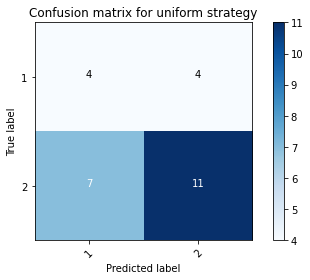

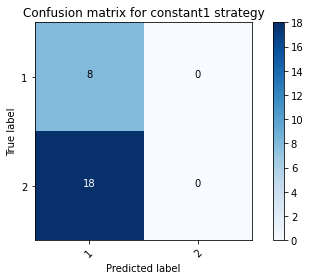

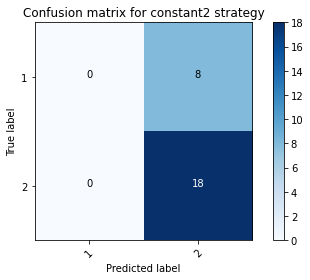

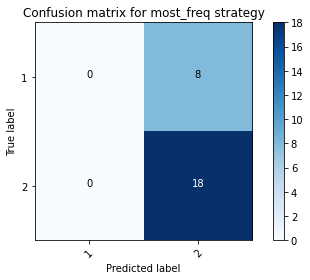

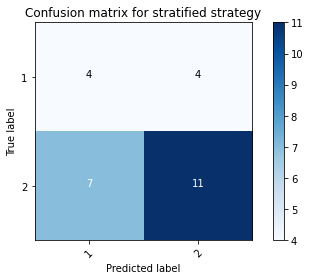

In [ ]:
from sklearn.metrics import confusion_matrix

#print the confusion matrix for each dummy classifier
for prediction in predictions:
  cm_prediction = confusion_matrix(y_test, predictions[prediction])  #create each confusion matrix
  plot_confusion_matrix(cm_prediction, np.unique(y_train), title = 'Confusion matrix for ' + prediction + ' strategy')

In [ ]:
#print f1 scores for the dummy classifiers
for items in f1_micro:
  print('f1 micro of', items, 'strategy is: ', f1_micro[items])
  print('f1 macro of', items, 'strategy is: ', f1_macro[items], '\n')

f1 micro of uniform strategy is:  0.5769230769230769
f1 macro of uniform strategy is:  0.543859649122807 

f1 micro of constant1 strategy is:  0.3076923076923077
f1 macro of constant1 strategy is:  0.23529411764705882 

f1 micro of constant2 strategy is:  0.6923076923076923
f1 macro of constant2 strategy is:  0.40909090909090906 

f1 micro of most_freq strategy is:  0.6923076923076923
f1 macro of most_freq strategy is:  0.40909090909090906 

f1 micro of stratified strategy is:  0.5769230769230769
f1 macro of stratified strategy is:  0.543859649122807 



#### Bar plot for the f1 scores

In [ ]:
def f1_micro_macro_bar_plot(f1_micros, f1_macros, labels):

  x = np.arange(len(f1_micros))
  width = 0.3
  
  if len(f1_micros) == 1: #if we give only one sample draw a smaller plot
    fig, ax = plt.subplots(figsize = (6,6))
    rects1 = ax.bar(x - width/2, f1_micros, width, label='f1_micros')
    rects2 = ax.bar(x + width/2, f1_macros, width, label='f1_macros')
  elif len(f1_micros) <= 7:
    fig, ax = plt.subplots(figsize = (12,8))
    rects1 = ax.bar(x - width/2, f1_micros.values(), width, label='f1_micros')
    rects2 = ax.bar(x + width/2, f1_macros.values(), width, label='f1_macros')
  else:  #if we give more than 7 samples draw a larger plot
    fig, ax = plt.subplots(figsize = (20,10))
    rects1 = ax.bar(x - width/2, f1_micros.values(), width, label='f1_micros')
    rects2 = ax.bar(x + width/2, f1_macros.values(), width, label='f1_macros')

  
  
  ax.set_ylabel('f1 scores')
  ax.set_title('Performance Comparison on F1-Score')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()

  fig.tight_layout()
  plt.show()

In [ ]:
def scores_bar_plot(scores, labels):   #used in the summarization at the end of the small and big dataset
  x = np.arange(len(scores))
  if len(scores) <= 7:
    fig, ax = plt.subplots(figsize = (12,6))
  else:
    fig, ax = plt.subplots(figsize = (20,10))
  width = 0.3
  rects1 = ax.bar(x , scores.values(), width)

  i = 1.0
  j = 0.01
# Annotating the bar plot with the values 
  for key in scores:
    plt.annotate(np.round(scores[key],3), (-1.1 + i, scores[key] + j), color = 'red', fontsize = 12 )
    i += 1
  ax.set_ylabel('accuracy score')
  ax.set_title('Performance Comparison')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  #x.legend()


  fig.tight_layout()
  plt.show()

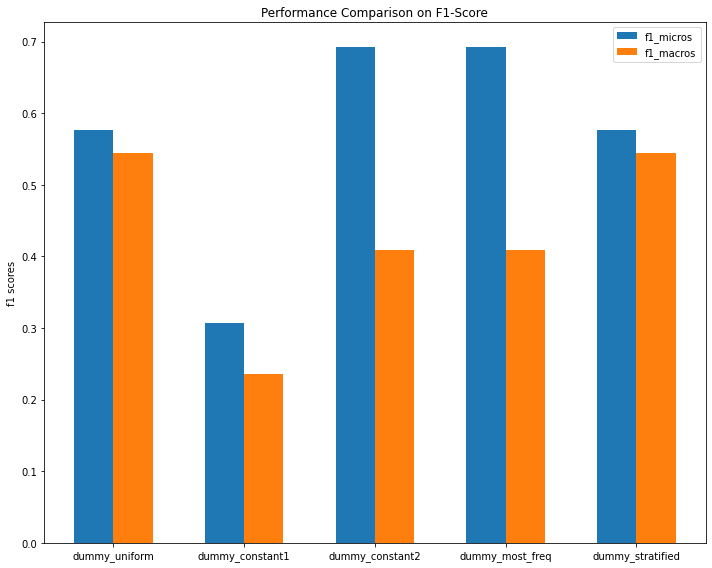

In [ ]:
f1_micro_macro_bar_plot(f1_micro, f1_macro, clfs)

#### Classification report + Analyzing the results

In [ ]:
from sklearn.metrics import classification_report

#print the classification report for each dummy classifier
for prediction in predictions:
  print('Classification report of dummy classifier with ', prediction, 'strategy is:\n')
  print(classification_report(y_test, predictions[prediction]))

Classification report of dummy classifier with  uniform strategy is:

              precision    recall  f1-score   support

           1       0.36      0.50      0.42         8
           2       0.73      0.61      0.67        18

    accuracy                           0.58        26
   macro avg       0.55      0.56      0.54        26
weighted avg       0.62      0.58      0.59        26

Classification report of dummy classifier with  constant1 strategy is:

              precision    recall  f1-score   support

           1       0.31      1.00      0.47         8
           2       0.00      0.00      0.00        18

    accuracy                           0.31        26
   macro avg       0.15      0.50      0.24        26
weighted avg       0.09      0.31      0.14        26

Classification report of dummy classifier with  constant2 strategy is:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.69

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Οι ταξινομητές τύπου dummy δεν έχουν κάποια χρήση και χρησιμοποιήθηκαν μόνο για σύγκριση. Η περαιτέρω ανάλυση των αποτελεσμάτων που έδωσαν είναι άνουσια καθώς αυτού του είδους οι classifier ανεξαρτήτου στρατηγικής δεν μαθαίνουν. Αξίζει να σημειωθεί ότι ο πιο "έξυπνος" ανάμεσα στους dummy είναι ο stratified ο οποίος μελετά την κατανομή των ετικετών στο training set και μετά προβλέπει με βάσει το ποσοστό που πήρε για το κάθε label.

### Gaussian Naive Bayes

Ο naive bayes classifier ονομάζεται αφελής γιατί υποθέτει ότι όλα τα δεδομένα είναι iid (independent and identically distributed). Επομένως έχοντας σαν δεδομένο ένα δείγμα x(με features $[x_1, ... , x_d])$ ο naive bayes προβλέπει την κλάση ως εξής:

<br>$$\hat{ω} =
\underset{i\in\{1,\dots,C\}}{\operatorname{argmax}}P(ω_i \mid x_1, \dots, x_d)$$

Χρησιμοποιώντας τον κανόνα του Bayes και τον κανόνα της συνολικής πιθανότητας προκύπτει:

<br>$$ \hat{ω} = \underset{i\in\{1,\dots,C\}}{\operatorname{argmax}} P(ω_i)*\prod_{j=1}^{d} P(x_j \mid ω_i)$$

Θεωρώντας λοιπόν ότι κάθε feature ακολουθεί γκαουσιανή κατανομή ως εξής:

<br>$$ x_j \sim \mathcal{N}(\mu_{ω_i},\,\sigma_{ω_{i,j}}^{2})\,$$

Παίρνουμε την τελική μορφή για το $\hat{ω}$ :
<br>$$ \hat{ω} = \underset{i\in\{1,\dots,C\}}{\operatorname{argmax}}P(ω_i)*\prod_{j=1}^{d} \frac{1}{\sqrt{2\pi\sigma^2_{ω_{i,j}}}} * \exp\left(-\frac{(x_j - \mu_{ω_{i,j}})^2}{2\sigma^2_{ω_{i,j}}}\right)$$

Η βιβλιοθήκη sklearn δεν χρησιμοποιεί αυτή τη μορφή για να κάνει προβλέψεις επείδη οι πολλοί πολλαπλασιασμοί είναι αρκετά ακριβοί. Αντ' αυτού παίρνοντας τον λογάριθμο καταλήγουμε στην τελική σχέση:

<br>$$ \hat{ω} = \underset{i\in\{1,\dots,C\}}{\operatorname{argmax}}ln(P(ω_i))*\sum_{j=1}^{d} -\frac{(x_j - \mu_{ω_{i,j}})^2}{2\sigma^2_{ω_{i,j}}} - \frac{1}{2}ln(2π\sigma^2_{ω_{i,j}})$$

#### Classification + Confusion Matrix + Metrics

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions['naive_bayes'] = gnb.predict(X_test)
scores['naive_bayes'] = gnb.score(X_test, y_test)
print('The predicted array GaussianNB gave is: ', predictions['naive_bayes'], '\n')
print('The accuracy score GaussianNB gave is: ', scores['naive_bayes'])

The predicted array GaussianNB gave is:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1] 

The accuracy score GaussianNB gave is:  0.34615384615384615


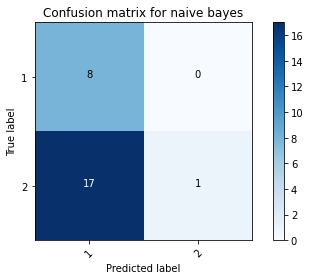

In [ ]:
cm_naive_bayes = confusion_matrix(y_test, predictions['naive_bayes'])
plot_confusion_matrix(cm_naive_bayes, np.unique(y_train), title = 'Confusion matrix for naive bayes')

In [ ]:
clfs.append('Naive_Bayes')
f1_micro['naive_bayes'] = f1_score(y_test, predictions['naive_bayes'], average = 'micro')
f1_macro['naive_bayes'] = f1_score(y_test, predictions['naive_bayes'], average = 'macro')
print('Naive_Bayes classifier gave f1 micro score of: ', f1_micro['naive_bayes'], '\n')
print('Naive_Bayes classifier gave f1 macro score of: ', f1_macro['naive_bayes'])

Naive_Bayes classifier gave f1 micro score of:  0.34615384615384615 

Naive_Bayes classifier gave f1 macro score of:  0.29505582137161085


#### Bar plot for f1 scores

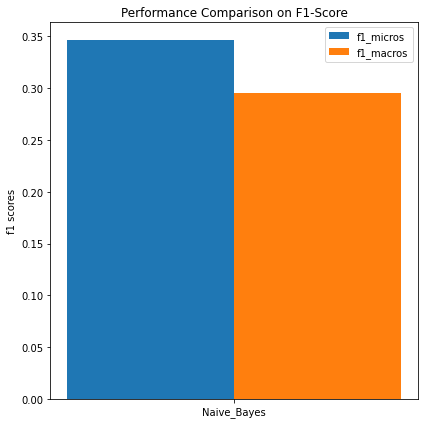

In [ ]:
f1_micro_macro_bar_plot([f1_micro['naive_bayes']], [f1_macro['naive_bayes']], [clfs[5]])

#### Classification report + Analyzing the results

In [ ]:
print('Classification report of naive bayes classifier is:\n')
print(classification_report(y_test, predictions['naive_bayes']))

Classification report of naive bayes classifier is:

              precision    recall  f1-score   support

           1       0.32      1.00      0.48         8
           2       1.00      0.06      0.11        18

    accuracy                           0.35        26
   macro avg       0.66      0.53      0.30        26
weighted avg       0.79      0.35      0.22        26



Παρατηρούμε ότι ο gaussian naive bayes δίνει πολύ χειρότερα αποτελέσματα σε σχέση με τους dummy classifiers που ελέγξαμε παραπάνω. Όπως φαίνεται ο συγκεκριμένος classifier έχει δυσκολία να προβλέψει ότι κάποιο δείγμα ανήκει στην κλάση 2. Γενικότερα ο naive bayes επειδή υποθέτει ανεξαρτησία των δεδομένων (πράγμα το οποίο στην πραγματικότητα τις περισσότερες φορές δεν υφίσταται) μπορεί να οδηγήσει σε πολύ απογοητευτικά αποτελέσματα. Συνήθως ο naive bayes χρείαζεται έναν ικανοποιητικό αριθμό απο δείγματα για να βγάλει καλύτερα αποτελέσματα. 

Παρακάτω θα δούμε ότι η μορφή που έχουν τα δεδομένα επηρεάζει σημαντίκα την απόδοση του classifier καθώς η προεπεξεργασία αυτών αυξάνει δραματικά την απόδοση του ταξινομητή. Τέλος αν και ο συγκεκριμένος ταξινομητής υποθέτει ανεξαρτία δεδομένων βρίσκει πολλές φορές χρήση στην πράξη καθώς οι μηχανικοί των χρησιμοποιούν σε συνδιασμούς ταξινομητών όπως είναι πχ. ένα Voting Classifier.

### kNN

O kNN(k-Nearest Neighbors) είναι ένας ταξινομητής ο οποίος βασίζεται στην  απόσταση για να ταξινομήσει τα δεδομένα. Μπορεί να χρησιμοποιηθεί και για binary classification αλλά και για multiclass classification. Λειτουργεί ως εξής:

Έχοντας δεδομένα απο τις κλάσεις εισάγουμε ένα καινούργιο δείγμα. Υπολογίζουμε την απόσταση του απο τα υπόλοιπα δείγματα και βρίσκουμε τους k κοντινότερους γείτονες του. Εντάσσουμε το δείγμα στην κλάση στην οποία ανήκουν οι περισσότετοι γείτονες που βρήκαμε. Έστω, λοιπόν, ότι έχουμε ένα καινούργιο δείγμα $(x,y)$ και $(x_i , y_i)$ όλα τα υπόλοιπα samples. Τότε υπολογίζουμε την απόσταση του $(x,y)$ απο όλα τα $(x_i, y_i)$ ως εξής:

<br>$$ distance_i = \sqrt{(x_i-x)^2 + (y_i - y)^2}$$

Εκτός απο την ευκλείδια απόσταση ο kNN χρησιμοποίει και άλλους τύπους αποστάσεων όπως φαίνεται απο την sklearn. Οι αποστάσεις αυτές είναι:

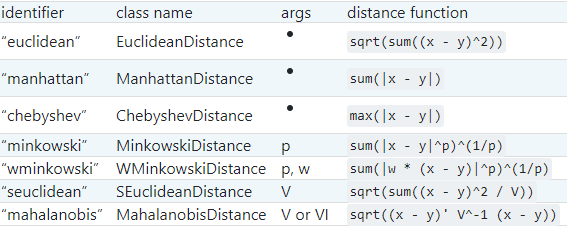

Όπως μπορούμε να παρατηρήσουμε όσο αυξάνονται τα features των δειγμάτων η πράξη για την εύρεση της απόστασης γίνεται πολύ ακριβή με αποτέλεσμα να υπάρχει αρκετή καθυστέρηση. Γι' αυτό χρήσιμη ίσως θα ήταν κάποια τεχνική για μείωση της διαστατικότητας όπως το PCA.

Για να λειτουργήσει αποτελεσματικότερα ο kNN πρέπει ο αριθμός των γειτόνων να είναι πάντα περιττός αριθμός, ώστε να αποφεύγονται κατα 100% οι ισοπαλίες όσον αφορά το binary classification και κατά το μέγιστο δυνατό οι ισοπαλίες σε multiclass classification.

#### Classification + Confusion Matrix + Metrics

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions['knn'] = knn.predict(X_test)
scores['knn'] = knn.score(X_test,y_test)
print('The predicted array Knn gave is: ', predictions['knn'], '\n')
print('The accuracy score Knn gave is: ', scores['knn'])

The predicted array Knn gave is:  [1 2 2 2 2 1 1 2 1 2 2 1 1 2 2 1 1 2 2 2 1 2 1 1 2 1] 

The accuracy score Knn gave is:  0.6923076923076923


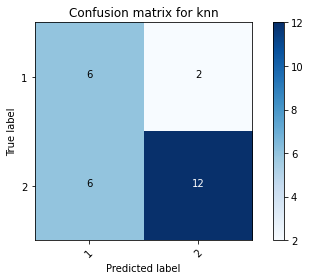

In [ ]:
cm_knn = confusion_matrix(y_test, predictions['knn'])
plot_confusion_matrix(cm_knn, np.unique(y_train), title = 'Confusion matrix for knn')

In [ ]:
clfs.append('Knn')
f1_micro['kNN'] = f1_score(y_test, predictions['knn'], average = 'micro')
f1_macro['kNN'] = f1_score(y_test, predictions['knn'], average = 'macro')
print('Knn classifier gave f1 micro score of: ', f1_micro['kNN'], '\n')
print('Knn classifier gave f1 macro score of: ', f1_macro['kNN'])

Knn classifier gave f1 micro score of:  0.6923076923076923 

Knn classifier gave f1 macro score of:  0.675


#### Bar plot for f1 scores

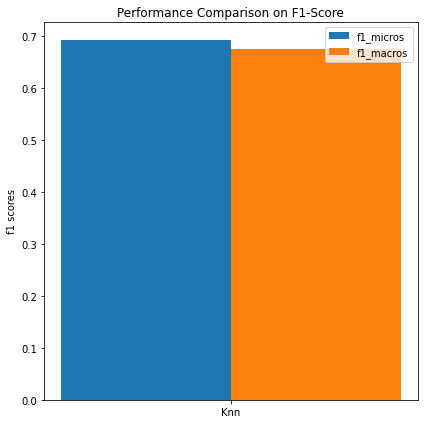

In [ ]:
f1_micro_macro_bar_plot([f1_micro['kNN']], [f1_macro['kNN']], [clfs[6]])

#### Classification report + Analyzing the results

In [ ]:
print('Classification report of knn classifier is:\n')
print(classification_report(y_test, predictions['knn']))

Classification report of knn classifier is:

              precision    recall  f1-score   support

           1       0.50      0.75      0.60         8
           2       0.86      0.67      0.75        18

    accuracy                           0.69        26
   macro avg       0.68      0.71      0.68        26
weighted avg       0.75      0.69      0.70        26



Γενικά παρατηρούμε ότι ακόμα και με τις default παραμέτρους και χωρίς προεπεξεργασία των δεδομένων ο kNN δίνει αρκετά υψηλό accuracy. Αυτό μπορεί να οφείλεται στο γεγονός ότι τα features των 2 κλάσεων απέχουν αρκέτα μεταξύ τους με αποτέλεσμα όταν ένα καινούργιο δείγμα έρχεται για να ταξινομηθεί ανάλογα σε ποια κατηγορία ανήκει υπάρχει μεγάλη πιθανότητα οι περισσότεροι γείτονες του να ανήκουν στην ίδια κλάση με αυτόν. 

Αξιοσημείωτο είναι το γεγονός ότι το recall που δίνει ο kNN είναι μικρότερο απο το precision. Γενικότερα μεταξύ precision και recall υπάρχει tradeoff. Ανάλογα την φύση του dataset αντιμετωπίζουμε τα αποτελέσματα που παίρνουμε με διαφορετικό τρόπο. Στην ενότητα του summarization θα αναλύσουμε την παραπάνω σκέψη διεξοδικά.

### Summarization

>Το dataset το οποίο καλούμαστε να μελετήσουμε αφορά ασθενείς οι οποίοι δέχονται μία θεραπεία αποκαταστάσης φωνής με σκοπό να μπορούν να μιλήσουν με αποδεκτά "phonations". Είναι σημαντικό να καταλάβουμε ότι επείδη μιλάμε για ένα ιατρικό θέμα έχει σημασία τα λάθη που κάνει ο ταξινομητής να μην δίνουν ψεύτικες ελπίδες στον ασθενή. Συγκεκριμένα οι ταξινομητές μας δεν πρέπει να προβλέπουν ότι ένας ασθενής μπορεί να μιλήσει σωστά όταν στην πραγματικότητα αυτό δεν ισχύει. Με άλλα λόγια είναι προτιμότερο στην περίπτωση που κάνουμε λάθος, αυτό να δείχνει ότι ο ασθενής δεν έχει βελτιωθεί παρά να δείχνουμε ότι ύπαρχει βελτίωση η οποία στην πραγματικότητα δίνει ψεύτικες ελπίδες. Το γεγονός αυτό φαίνεται απο τις τιμές των $precision, recall$. Είναι:
$$$$
<br>$$ precision =\frac{True Positive}{True Positive + False Positive}$$
$$$$
<br>$$ recall =\frac{True Positive}{True Positive + False Negative}$$
$$$$
Βάσει των όσων υπόθηκαν παραπάνω ο ταξινομητής μας πρέπει να διατήρει υψηλό $recall$ καθώς το precision έρχεται σε δεύτερη μοίρα.

>Από τους ταξινομητές που ελέγθηκαν μέχρι τώρα το υψηλότερο accuracy το δίνουν οι:  $$$$
 $$kNN,\ dummy\ με\ most\_frequent\ strategy\ και\ dummy\ με\ constant = 2$$
 $$$$
Όσον αφορά τους dummy το αποτέλεσμα που έδωσαν ήταν καθαρά τυχαίο καθώς εξαρτάται μόνο απο το πως χωρίστηκε το train και το test set. Επομένως αν είχαμε να διαλέξουμε έναν ταξινομήτη απο το κομμάτι της baseline classification αυτός θα ήταν ο kNN.

>Όσον αφορά τις μετρικές των $micro\ και\ macro\ average$ ισχύει το παρακάτω:
  $$$$ Η macro average μετρική θα υπολογίσει τη μέτρηση ανεξάρτητα για κάθε κλάση και στη συνέχεια θα λάβει τον μέσο όρο (εξ ου και θα αντιμετωπίζει εξίσου όλες τις κλάσεις), ενώ η micro average μετρική θα συγκεντρώσει τις συνεισφορές όλων των κλάσεων για να υπολογίσει τη μέση μέτρηση. Επομένως σε unbalanced dataset η μετρική micro είναι καλύτερη καθώς με τo macro average η πληροφορία της κλάσης με τα λιγότερα στοιχεία πιθανόν να χανόταν.

Παρακάτω φαίνονται τα συνολικά διαγράμματα για το $accuracy$ του κάθε ταξινομητή και για τα $f_1\ micro\ και\ f_1\ macro$

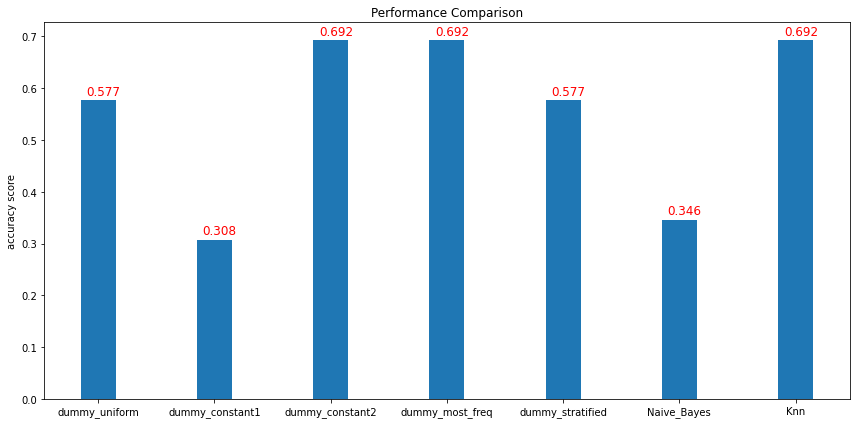

In [ ]:
scores_bar_plot(scores, clfs)

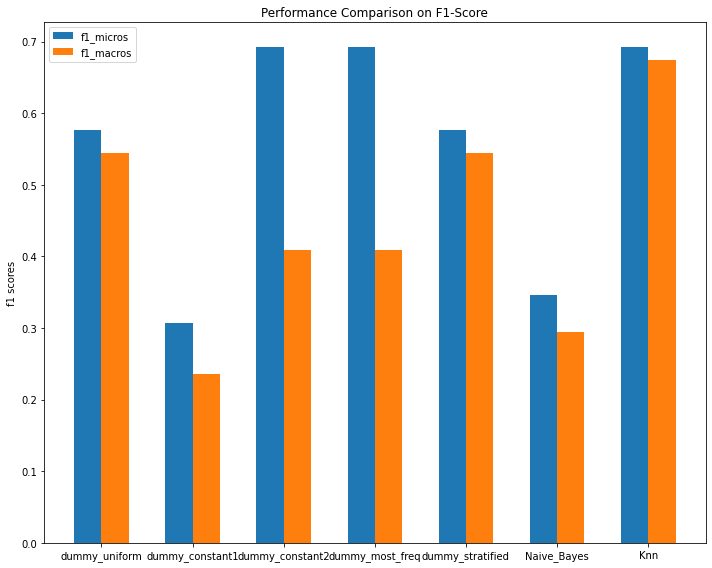

In [ ]:
f1_micro_macro_bar_plot(f1_micro, f1_macro, clfs)

## Optimization of the Classifiers




### Data preprocessing

Σε αυτό το σημείο θα προσπαθήσουμε να βελτιστοποιήσουμε τους classifiers που χρησιμοποιήθηκαν παραπάνω με τις εξής τεχνικές:

* Dimensionality reduction:
  * Feauture Selection (Variance Threshhold)
  * Feauture Extraction (PCA - Pricipal Component Analysis)
* Normalization (Standard Scaler, Mix-Max Scaler)
* Balancing (Oversampling / Undersampling)

#### Feauture Selection - Variance Threshold

Με την τεχνική του Variance Threshold θα αφαιρέσουμε τα δείγματα τα οποία έχουν μηδέν variance ή κοντά στο μηδέν καθώς τα δείγματα αυτά δεν βοηθούν στην βελτίωση της διαχωριστικής ικανότητας του classifier που χρησιμοποιούμε. Επομένως ξεκινάμε βρίσκοντας το μεγαλύτερο variance των δεδομένων μας και βάσει αυτού φτιάχνουμε μία λίστα με πιθανά thresholds τα οποία πιστεύουμε ότι θα μπορούσαν να δώσουν μεγαλύτερο accuracy απο αυτό που παίρνουμε ήδη. Η τεχνική αυτή πραγματοποιείται τόσο στο training set όσο και στο test set. Για το test set θεωρούμε ότι δεν μπορούμε να έχουμε πληροφορία και επομένως θα χρησιμοποιήσουμε το threshold που βρέθηκε απο το training set.

Προς το παρόν απλά θα αρχικοποιήσουμε τον selector μας και δεν θα επιδιώξουμε να κάνουμε κάποια παραπάνω κίνηση καθώς η τεχνική αυτή εξαρτάται απο την μέθοδο που θα επιλέξουμε για το normalization. 


In [ ]:
from sklearn.feature_selection import VarianceThreshold

#### Feature Extraction - PCA

Εκτός απο το feature selection μία ακόμα τεχνική για την μείωση της διαστατικότητας είναι το feauture extraction. Η βασικότερη τεχνική feature extraction είναι η ανάλυση σε κύριες συνιστώσες (principal components analysis - PCA) όπου αναλύουμε τα δεδομένα σε κύριες συνιστώσες και δουλέυουμε με τελείως νέες, γραμμικά ασυσχέτιστες μεταβλητές μικρότερης διαστατικότητας. Η τεχνική αυτή μπορεί να φανεί πολύ χρήσιμη ιδιαίτερα σε ταξινομητές όπως ο knn ο οποίος υπολογίζει αποστάσεις, καθώς με αυτό τον τρόπο η υπολογιστική πολυπλοκότητα γίνεται αρκετά μικρότερη.

Σε αυτό το σημείο πάλι απλά θα φτιάξουμε ένα instance του object PCA και μετέπειτα θα πειραματιστούμε με τις διάφορες τιμές της υπερπαραμέτρου k. Όπως είναι λογικό μία αρκετά μικρή τιμή για το k ίσως να μας κάνει να χάσουμε σημαντική πληροφορία για τα δεδομένα μας και γι' αυτό το λόγο παρακάτω θα δοκιμάσουμε αρκετές τιμές ώστε να βρουμέ την καλύτερη αναλογία

In [ ]:
from sklearn.decomposition import PCA

#### Normalization / Standardization

Το normalization είναι επίσης πολυ σημαντική τεχνική προεπεξεργασίας δεδομένων ειδικότερα όταν ασχολούμαστε με classifiers όπως ο knn οι οποιοί χρησιμοποιούν την ευκλείδεια  απόσταση. Για παράδειγμα αν κάποιες τιμές των features είναι αρκετά μικρές, ενώ άλλες ειναι μεγαλύτερες υπάρχει περίπτωση οι μεγαλύτερες τιμές να "θάψουν" την πληροφορία των μικρότερων.

Οι 2 τεχνικές που χρησιμοποιούνται πιο συχνά είναι:

  * Standard scaling:
>   $$Z = \frac {X - μ} {σ} $$
    Πρακτικά με αυτή την τεχνική κάθε χαρακτηριστικό έχει μέση τιμή 0 και διασπορά 1. Η χρήση του z-score για normalization είναι πιο ανθεκτίκη απο αυτή του min-max σε τιμές outliers δηλαδή σποραδικές τιμές που είναι πολύ μακριά απο τη μέση τιμή και τις υπόλοιπες τιμές του χαρακτηριστικού.

  * Min-Max scaling:
>    $$X' = \frac {X - X_{min}} {X_{max} - X_{min}}$$
    Mε την τεχνική αυτή όλες οι τιμές που παίρνουμε θα είναι στο διάστημα [0,1]. Η κλιμάκωση σε [0,1] είναι λιγότερο εύαισθητη σε πολύ μικρές αποκλίσεις μεταξύ των χαρακτηριστικών. Επίσης η εφαρμογή της διατηρεί τα μηδενικά πράγμα το οποίο μπορεί να είναι καθοριστικό για την ταχύτητα του classifier.

Το normalization γίνεται τόσο στο training set όσο και στο test set. Ανάλογα την τεχνική που θα επιλέξουμε καθώς και την τιμή που θα διαλέξουμε για variance threshold διακρίνονται οι περιπτώσεις:

  * threshold > 0 και min-max scaling:
    
    Σε αυτή τη περίπτωση πρέπει πρώτα να υλοποιήσουμε το scaling και έπειτα να κάνουμε feauture selection.

  * threshold > 0 and standard scaling:

    Σε αυτή τη περίπτωση εφαρμόζουμε πρώτα το variance threshold και έπειτα κάνουμε scaling.

Γενικότερα γνωρίζουμε ότι σε έναν μεγάλο αριθμό περιπτώσεων ο min_max scaler χρησιμοποιείται σε ταξινομητές οι οποίοι δεν υποθέτουν κάποια κατανομή για τα δεδομένα τους, ενώ το standardization χρησιμοποιείται περισσότερο σε ταξινομητές οι οποίοι ακολουθούν κάποια κατανομή πχ.Gaussian distribution. Γνωρίζοντας αυτό για τον kNN θα εφαρμόσουμε min_max scaling, ενώ για τον naive bayes θα εφαρμόσουμε standard scaling.

Παρακάτω θα ελέγξουμε τα accuracy που παίρνουμε πάνω στο training set χρησιμοποιώντας cross validation για κάθε μία απο τις 2 τεχνικές, ώστε να έχουμε μία ιδέα για το ποια τακτίκη οδηγεί σε καλύτερα αποτελέσματα.



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 


def normalize_and_analyze(X_train, y_train):  #in this function we apply min max and standard scaler to both gnb and knn 
                                              #then we apply cross validation in the training set in order to see which 
  min_max = MinMaxScaler().fit(X_train)       #technique performs better for each classifier
  standard = StandardScaler().fit(X_train)

  knn_test = KNeighborsClassifier()
  knn_test1 = KNeighborsClassifier()
  gnb_test = GaussianNB()
  gnb_test1 = GaussianNB()

  min_max_train = min_max.transform(X_train)
  standard_train = standard.transform(X_train)
  
  scores_kNN_min_max = cross_val_score(knn_test,min_max_train, y_train, cv=10)  #10 fold cross validation for the scaled training set
  print(scores_kNN_min_max)
  print('The mean cross validation score for kNN with normalization is : ',scores_kNN_min_max.mean())
  scores_kNN_standard = cross_val_score(knn_test1, standard_train, y_train, cv = 10)
  print(scores_kNN_standard)
  print('The mean cross validation score for kNN with standardization is : ',scores_kNN_standard.mean(), '\n')

  scores_gnb_min_max = cross_val_score(gnb_test,min_max_train, y_train, cv=10)
  print(scores_gnb_min_max)
  print('The mean cross validation score for gnb with normalization is : ',scores_gnb_min_max.mean())
  scores_gnb_standard = cross_val_score(gnb_test1, standard_train, y_train, cv = 10)
  print(scores_gnb_standard)
  print('The mean cross validation score for gnb with standardization is : ',scores_gnb_standard.mean())


In [ ]:
normalize_and_analyze(X_train, y_train)

[1.  0.8 0.9 0.7 0.7 0.7 0.8 0.9 0.8 0.8]
The mean cross validation score for kNN with normalization is :  0.8099999999999999
[0.9 0.9 0.9 0.6 0.7 0.6 0.7 0.9 0.6 0.9]
The mean cross validation score for kNN with standardization is :  0.7699999999999999 

[0.5 0.6 0.4 0.5 0.7 0.6 0.3 0.5 0.9 0.8]
The mean cross validation score for gnb with normalization is :  0.58
[0.5 0.6 0.4 0.5 0.7 0.6 0.3 0.5 0.9 0.8]
The mean cross validation score for gnb with standardization is :  0.58


#### Balancing

Η τεχνική του balancing χρησιμοποιείται όταν το dataset μας είναι unbalanced, δηλαδή κάποιο label εμφανίζεται 1.5 φορές παραπάνω απο κάποιο άλλο. Όπως δείξαμε στα αρχικά βήματα το dataset που καλούμαστε να μελετήσουμε είναι unbalanced και επομένως πρέπει να χρησιμοποιήσουμε είτε undersampling είτε oversampling. Επείδη το dataset μας είναι αρκετά μικρό η τεχνική του undersampling δεν μπορεί να εφαρμοστεί καθώς θα έχει ως αποτέλεσμα να πετάξουμε ένα μεγάλο ποσοστό του συνόλου των δειγμάτων. Αντίθετα η τεχνική του oversampling, κατά την οποία επιλέγουμε τυχαία δείγματα από τις κατηγορίες με τα λιγότερα παραδείγματα και τα επαλαμβάνουμε, θα κάνει την διαδικασία του training αποτελεσματικότερη και κατά συνέπεια περιμένουμε να δούμε αύξηση του accuracy. 



In [ ]:
from imblearn.over_sampling import RandomOverSampler

def balancing(X_train, y_train):   #function to check if the dataset will be balanced after the ros application

  ros = RandomOverSampler(random_state=0)
  X_train_resampled, y_train_resampled = ros.fit_sample(X_train,y_train)

  return X_train_resampled, y_train_resampled

In [ ]:
#verification
X_train_resampled, y_train_resampled = balancing(X_train, y_train)
print(X_train_resampled.shape, y_train_resampled.shape)
test_set = np.c_[(y_train_resampled, X_train_resampled)]
print(test_set.shape,'\n')
balance(pd.DataFrame(data = test_set), big = False)

(132, 310) (132,)
(132, 311) 

Label 1.0 appears 66 times in the dataset => 50.0% 

Label 2.0 appears 66 times in the dataset => 50.0% 

The dataset is balanced


### Hyperparameter tuning

Ο τρόπος που θα εργαστούμε φαίνεται στην παρακάτω φωτογραφία:
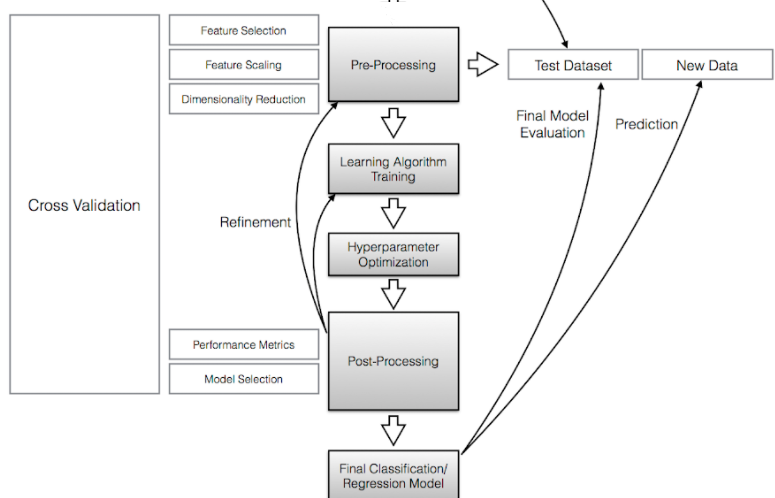



Πιο συγκεκριμένα:
* Ορίζουμε κάθε φορά ένα pipe στο οποίο βάζουμε με την σειρά τα βήματα που θεωρούμε ότι θα βελτιώσουν την απόδοση του classifier. Τα βήματα αυτά θα περιέχουν τις τεχνικές προεξεργασίας των δεδομένων που αναφέραμε παραπάνω καθώς και τον τελικό ταξινομητή.
* Ορίζουμε την διαδικασία του GridSearchCV στην οποία δίνουμε σαν όρισμα το pipe που κατασκευάσαμε παραπάνω και ένα dictionary το οποίο περιέχει κάθε φορά πιθανές τιμές είτε για την διαδικασία του preprocessing είτε για τις υπερπαραμέτρους των ταξινομητών. Το grid search για κάθε δυνατό συνδιασμό των παραμέτρων αυτών πραγματοποιεί k-folds crossvalidation υπολογίζοντας το μέσο score(το οποίο καθορίζεται απο την παράμετρο scoring) στο test και γυρνώντας μας το καλύτερο score που βρήκε και τις παραμέτρους που έβγαλαν το συγκεκριμένο score.
* Για τον κάθε ταξινομητή θα βρούμε τις παραμέτρους που μεγιστοποιούν το $f_1\ micro\ και\ το\ f_1\ macro$ 
* Θα ακολουθήσουμε την διαδικασία του progressive grid search κατά την οποία τα αρχεία διαστήματα για τις παραμέτρους προς βελτιστοποίση θα είναι αρκετά μεγάλα και βλέποντας την κατεύθυνση που μας δίνουν κάθε φορά οι βέλτιστες παράμετροι τα διαστήματα μας θα δίνονται πιο πυκνά.

### Dummy Classifiers

Όσον αφορά τους dummy classifiers η προσπάθεια βελτιστοποίησης της απόδοσης τους δεν έχει νόημα γιατι πρακτικά δεν μαθαίνουν. Επομένως θα τους κρατήσουμε απο τα προηγούμενα ερωτήματα μόνο ως μέρος σύγκρισης και όχι ως αντικείμενο περαιτέρω μελέτης.



### Gaussian Naive Bayes

Για τον συγκεκριμένο ταξινομητή δεν έχουμε κάποια υπερπαράμετρο του ίδιου προς βελτιστοποίηση επομένως θα πειραματιστούμε μόνο με τις διάφορες τιμές και συνδιασμούς που μπορούν να πάρουν οι τεχνικές προεξεργασίας των δεδομένων.

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import time

fitting_time = {}   #time to fit the grid search

selector = VarianceThreshold()    #define all techniques to be used below
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
ros = RandomOverSampler()
pca = PCA()
clf = GaussianNB()

#### Optimization for f1_micro

In [ ]:
threshold = list(np.arange(0,0.004,0.0001))
n_components = list(np.arange(50,74,2))

pipe = Pipeline(steps=[('selector', selector),('scaler', standard_scaler),  ('sampler', ros), ('pca', pca), ('gnb', clf)]) #all the step in the pipeline
micro_estimator = GridSearchCV(pipe, dict(selector__threshold=threshold, pca__n_components = n_components), cv=10, scoring='f1_micro', n_jobs=-1, return_train_score = True)
start_time = time.time()
micro_estimator.fit(X_train, y_train)  #fit the estimator 
print(micro_estimator.best_score_)     #print the best score found
fitting_time['micro_optimized_gnb'] = time.time() - start_time
print('Fitting and predicting time : ',fitting_time['micro_optimized_gnb'])
print('The best parameters found for min_max scaling gnb for f1_micro are : ', micro_estimator.best_params_) #print the parameters with the best score
print(micro_estimator.best_estimator_)

0.7700000000000001
Fitting and predicting time :  45.51143407821655
The best parameters found for min_max scaling gnb for f1_micro are :  {'pca__n_components': 52, 'selector__threshold': 0.003}
Pipeline(steps=[('selector', VarianceThreshold(threshold=0.003)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=52)), ('gnb', GaussianNB())])


In [ ]:
predictions['micro_optimized_gnb'] = micro_estimator.predict(X_test)  #save the predictions
scores['micro_optimized_gnb'] = accuracy_score(y_test, predictions['micro_optimized_gnb'])  #save the score
f1_micro['micro_optimized_gnb'] = f1_score(y_test, predictions['micro_optimized_gnb'], average='micro')
f1_macro['micro_optimized_gnb'] = f1_score(y_test, predictions['micro_optimized_gnb'], average='macro')
print(f1_micro['micro_optimized_gnb'], f1_macro['micro_optimized_gnb'])  #print f1 micro and macro found
print('Accuracy score found is : ', accuracy_score(y_test, predictions['micro_optimized_gnb']))  #print the score found for the test set

0.8461538461538461 0.8045112781954887
Accuracy score found is :  0.8461538461538461


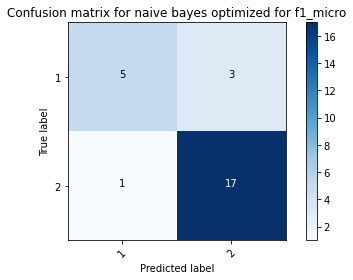

In [ ]:
cm_naive_bayes_opt_micro = confusion_matrix(y_test, predictions['micro_optimized_gnb']) #create and plot the confusion matrix
plot_confusion_matrix(cm_naive_bayes_opt_micro, np.unique(y_train), title = 'Confusion matrix for naive bayes optimized for f1_micro')

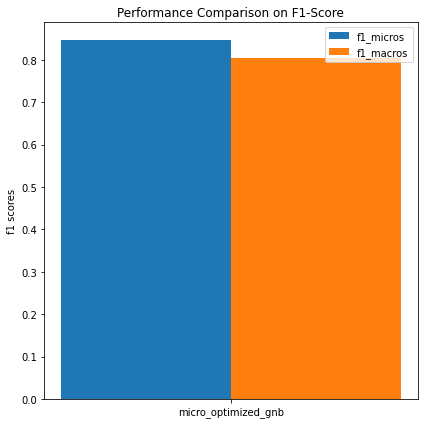

In [ ]:
clfs.append('micro_optimized_gnb')
f1_micro_macro_bar_plot([f1_micro['micro_optimized_gnb']], [f1_macro['micro_optimized_gnb']], [clfs[7]]) #create the bar plot for f1 micro and macro

In [ ]:
print('Classification report of gnb optimized for f1_micro is:\n')
print(classification_report(y_test, predictions['micro_optimized_gnb'])) #print the classification report for the classifier

Classification report of gnb optimized for f1_micro is:

              precision    recall  f1-score   support

           1       0.83      0.62      0.71         8
           2       0.85      0.94      0.89        18

    accuracy                           0.85        26
   macro avg       0.84      0.78      0.80        26
weighted avg       0.84      0.85      0.84        26



#### Optimization for f1_macro

In [ ]:
#same procedure as above
threshold = list(np.arange(0.016,0.03,0.00005))
n_components = list(np.arange(31,40,1))

pipe = Pipeline(steps=[('selector', selector), ('scaler', standard_scaler),  ('sampler', ros), ('pca', pca), ('gnb', clf)])
macro_estimator = GridSearchCV(pipe, dict(selector__threshold=threshold, pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1, return_train_score = True)
start_time = time.time()
macro_estimator.fit(X_train, y_train)
print(macro_estimator.best_score_)
fitting_time['macro_optimized_gnb'] = time.time() - start_time
print('Fitting and predicting time : ',fitting_time['macro_optimized_gnb'])
print('The best parameters found for min_max scaling gnb for f1_macro are : ', macro_estimator.best_params_)
print(macro_estimator.best_estimator_)

0.7846336996336997
Fitting and predicting time :  236.93194365501404
The best parameters found for min_max scaling gnb for f1_macro are :  {'pca__n_components': 37, 'selector__threshold': 0.028350000000000354}
Pipeline(steps=[('selector', VarianceThreshold(threshold=0.028350000000000354)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=37)), ('gnb', GaussianNB())])


In [ ]:
predictions['macro_optimized_gnb'] = macro_estimator.predict(X_test)
scores['macro_optimized_gnb'] = accuracy_score(y_test, predictions['macro_optimized_gnb'])
f1_micro['macro_optimized_gnb'] = f1_score(y_test, predictions['macro_optimized_gnb'], average='micro')
f1_macro['macro_optimized_gnb'] = f1_score(y_test, predictions['macro_optimized_gnb'], average='macro')
print(f1_micro['macro_optimized_gnb'], f1_macro['macro_optimized_gnb'])
print('Accuracy score found is : ', accuracy_score(y_test, predictions['macro_optimized_gnb']))

0.6923076923076923 0.6601307189542484
Accuracy score found is :  0.6923076923076923


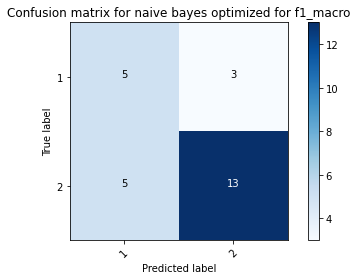

In [ ]:
cm_naive_bayes_opt_macro = confusion_matrix(y_test, predictions['macro_optimized_gnb'])
plot_confusion_matrix(cm_naive_bayes_opt_macro, np.unique(y_train), title = 'Confusion matrix for naive bayes optimized for f1_macro')

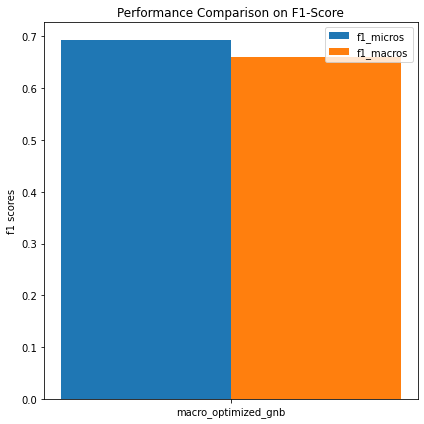

In [ ]:
clfs.append('macro_optimized_gnb')
f1_micro_macro_bar_plot([f1_micro['macro_optimized_gnb']], [f1_macro['macro_optimized_gnb']], [clfs[8]])

In [ ]:
print('Classification report of gnb optimized for f1_macro is:\n')
print(classification_report(y_test, predictions['macro_optimized_gnb']))

Classification report of gnb optimized for f1_macro is:

              precision    recall  f1-score   support

           1       0.50      0.62      0.56         8
           2       0.81      0.72      0.76        18

    accuracy                           0.69        26
   macro avg       0.66      0.67      0.66        26
weighted avg       0.72      0.69      0.70        26



#### History table for gnb tuning + Result analysis

$$$$
Για τον gaussian naive bayes αποφασίσαμε να χρησιμοποιήσουμε τον Standard Scaler καθώς στις περισσότερες περιπτώσεις ο συγκεκριμένος scaler δίνει καλύτερα αποτελέσματα απο τον min max για classifiers οι οποίοι ακολουθούν κάποια κατανομή. Επίσης επειδή δεν είμαστε σίγουροι για το πως θα δράσει το PCA στο συγκεκριμένο dataset θα φτίαξουμε 2 πινακάκια όπου στο ένα θα βάλουμε μόνο τον scaler και στο άλλο θα συνδιάσουμε τον scaler με την τεχνική του PCA. Επίσης θα χρησιμοποιήσουμε variance threshold και random oversampler. Το κάθε πινακάκι θα δείχνει κάθε φορά τις παραμέτρους που δίνουμε στο grid search καθώς και το score που αυτό μας γυρίζει για τις καλύτερες εξ' αυτών των παραμέτρων. Παρακάτω φαίνονται οι πίνακες για τα 2 pipes που κατασκευάσαμε για την μετρική:
$$$$
 $$f_1\ micro$$

$$Disclaimer :$$ H μορφή των δεδομένων που εισάγονται στο pipe θα παρασουσιαστούν ως μία λίστα όπου θα ισχύει:
$$[start, stop, step] : με\ το\ stop\ να\ μην\ περιέχεται\ στις\ τιμές\ που\ θα\ ψάξουμε$$
$$$$

> $$ Pipe1 (micro) : variance\ threshold -> standard\ scaler ->random\ oversampler -> pca -> GaussianNB $$
>$$$$
>
>$Steps$ | $threshold$ | $pca$ | $fitting\ time$ | $score$ | $best\ parameters$
>--- | --- | --- | --- | --- | --- |
> $$1$$ | [0, 0.1, 0.01] | [10, 80, 10] | 6.377 | $$0.75$$ | $$\{40, 0.02\}$$
>$$2$$ | [0, 0.05, 0.005] | [20, 60, 5] | 7.066 | $$0.76$$ | $$\{55, 0\}$$
>$$3$$ | [0, 0.05, 0.005] | [40, 75, 5] | 6.192 | $$0.76$$ | $$\{60, 0.02\}$$
>$$4$$ | [0, 0.05, 0.0005] | [50, 74, 2] | 11.441 | $$0.765$$ | $$\{52, 0.0025\}$$
>$$5$$ | [0, 0.004, 0.0001] | [50, 74, 2] | 44.511 | $$0.77$$ | $$\{52, 0.003\}$$

Παρατηρούμε ότι δεν μπορούμε να αυξήσουμε άλλο την απόδοση του classifier και επομένως σταματάμε στο βήμα 5 το οποίος μας γυρίζει:
$$$$
$$ pca\ components = 52\ και\ variance\ threshold = 0.003\ δίνοντας\ score\ στο\ train :$$$$ score = 0.77$$


> $$ Pipe2 (micro) : variance\ threshold -> standard\ scaler ->random\ oversampler ->  GaussianNB $$
>$$$$
>
>$Steps$ | $threshold$ |  $fitting\ time$ | $score$ | $best\ parameters$
>--- | --- | --- | --- |  --- |
> $$1$$ | [0, 0.1, 0.01] |  0.625 | $$0.55$$ | $$\{0\}$$
>$$2$$ | [0, 0.01, 0.001] |  0.6575 | $$0.56$$ | $$\{0.002\}$$
>$$3$$ | [0, 0.004, 0.0001] |  2.413 | $$0.56$$ | $$\{60, 0.0022\}$$

Απ' ότι φαίνεται δεν μπορούμε να βελτίωσουμε περισσότερο τον ταξινομητή χρησιμοποιώντας μόνο το variance threshold και επομένως θα κρατήσουμε το:

$$Pipe1$$

Eκτελώντας την predict μέθοδο στο test set πλέον παίρνουμε ότι η απόδοση μας στο test set για micro optimization του GaussianNB είναι:

$$score = 0.8462$$

Παρατηρούμε ότι πήραμε αρκετά μεγαλύτερο score απο αυτό που βρήκαμε στο training set. Αυτό συμβαίνει διότι το dataset μας είναι πολύ μικρό με αποτέλεσμα το test set να περιεχεί λίγα δείγματα προς εξέταση και κατά συνέπεια ο παράγοντας τύχη να παίζει αρκετά σημαντικό ρόλο. Είναι αρκετά πιθανό πως αν προσπαθούσαμε να ξανα τρέξουμε τα ίδια cells θα παίρναμε διαφορετικά αποτελέσματα. Επίσης ο χωρισμός σε train και test παίζει σημαντίκο ρόλο όταν το dataset μας είναι τόσο μικρό με την έννοια ότι μπορεί να παίρναμε τελείως διαφορετικά αποτελέσμα αν κόβομαι απο την αρχή αλλίως το dataset.

Έχοντας τα αποτελέσμα για την παραμετρικοποιήση για βελτιστοποίηση του $f_1\ micro$ θα χρησιμοποιήσουμε το $Pipe1$ για να βρούμε τις καλύτερες παραμέτρους για την μεγιστοποίση του $f_1\ macro:$


> $$ Pipe1 (macro) : variance\ threshold -> standard\ scaler ->random\ oversampler -> pca -> GaussianNB $$
>$$$$
>
>$Steps$ | $threshold$ | $pca$ | $fitting\ time$ | $score$ | $best\ parameters$
>--- | --- | --- | --- | --- | --- |
> $$1$$ | [0, 0.1, 0.01] | [10, 80, 10] | 7.575 | $$0.71$$ | $$\{40, 0.03\}$$
>$$2$$ | [0, 0.06, 0.001] | [25, 65, 5] | 41.263 | $$0.716$$ | $$\{35, 0.06\}$$
>$$3$$ | [0.03, 0.09, 0.0005] | [24, 44, 2] | 100.07 | $$0.732$$ | $$\{34, 0.03\}$$
>$$4$$ | [0.01, 0.05, 0.0005] | [24, 44, 2] | 67.292 | $$0.73$$ | $$\{32, 0.018\}$$
>$$5$$ | [0.016, 0.03, 0.00005] | [30, 40, 1] | 236.93 | $$0.784$$ | $$\{37, 0.02835\}$$

Παρατηρούμε ότι δεν μπορούμε να αυξήσουμε άλλο την απόδοση του classifier και επομένως σταματάμε στο βήμα 5 το οποίος μας γυρίζει:
$$$$
$$ pca\ components = 37\ και\ variance\ threshold = 0.02835\ δίνοντας\ score\ στο\ train :$$$$ score = 0.784$$

Eκτελώντας την predict μέθοδο στο test set πλέον παίρνουμε ότι η απόδοση μας στο test set για micro optimization του GaussianNB είναι:

$$score = 0.6923$$

Παρατηρούμε ότι παρ' όλο που βρήκαμε υψηλότερο score απο την προηγούμενη περίπτωση, η απόδοση μας στο test set έπεσε αρκετά. Όπως αναφέραμε και παραπάνω τέτοια θέματα είναι αρκετά συχνά όταν δουλεύουμε με αρκετά μικρό αριθμό δεδομένων. Επίσης από το παραπάνω φαίνεται ότι χτίζοντας ένα καλό μοντέλο για το training set αυτό δεν θα μας δώσει απαραίτητα στο καλύτερο μοντέλο για το test set. Γι' αυτό σκοπός των μηχανικών είναι η δημιουργία robust μοντέλων, ώστε να αποφεύγονται τέτοιες συμπεριφορές.

### Knn

Για τον Knn εκτός απο τις παραμέτρους που αφορούν την προεπεξεργασία των δεδομένων θα πρέπει να κάνουμε tuning και για την υπερπαράμετρο k του ταξινομητή.

#### Optimization for f1_micro

In [ ]:
#we keep the structure of our code the same in order to be easier to understand
#the only things that may change are the parameters range, the structure of the pipe, and the key of the dictionaries
threshold = list(np.arange(0,0.05,0.005))
n_components = list(np.arange(10,35,5))
n_neighbors = list(np.arange(1,13,2))

kNN = KNeighborsClassifier()

kNN_pipe = Pipeline(steps=[('scaler', min_max_scaler), ('selector', selector), ('sampler', ros), ('pca', pca), ('knn', kNN)])
kNN_micro_estimator = GridSearchCV(kNN_pipe, dict(selector__threshold=threshold, pca__n_components=n_components,knn__n_neighbors=n_neighbors), cv=10, scoring='f1_micro', n_jobs=-1)
start_time = time.time()
kNN_micro_estimator.fit(X_train, y_train)
print(kNN_micro_estimator.best_score_)
fitting_time['micro_optimized_kNN'] = time.time() - start_time
print('Fitting and predicting time : ',fitting_time['micro_optimized_kNN'])
print('The best parameters found for min_max scaling kNN for f1_micro are : ', kNN_micro_estimator.best_params_)
print(kNN_micro_estimator.best_estimator_)

0.8500000000000002
Fitting and predicting time :  23.642279863357544
The best parameters found for min_max scaling kNN for f1_micro are :  {'knn__n_neighbors': 1, 'pca__n_components': 20, 'selector__threshold': 0.0}
Pipeline(steps=[('scaler', MinMaxScaler()), ('selector', VarianceThreshold()),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=20)),
                ('knn', KNeighborsClassifier(n_neighbors=1))])


In [ ]:
predictions['micro_optimized_kNN'] = kNN_micro_estimator.predict(X_test)
scores['micro_optimized_kNN'] = accuracy_score(y_test, predictions['micro_optimized_kNN'])
f1_micro['micro_optimized_kNN'] = f1_score(y_test, predictions['micro_optimized_kNN'], average='micro')
f1_macro['micro_optimized_kNN'] = f1_score(y_test, predictions['micro_optimized_kNN'], average='macro')
print(f1_micro['micro_optimized_kNN'], f1_macro['micro_optimized_kNN'])
print('Accuracy score found is : ', accuracy_score(y_test, predictions['micro_optimized_kNN']))

0.9230769230769231 0.9097222222222222
Accuracy score found is :  0.9230769230769231


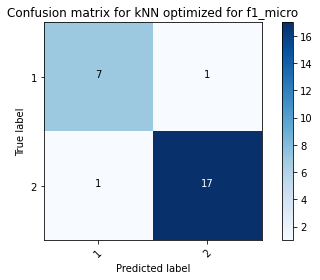

In [ ]:
cm_kNN_opt_micro = confusion_matrix(y_test, predictions['micro_optimized_kNN'])
plot_confusion_matrix(cm_kNN_opt_micro, np.unique(y_train), title = 'Confusion matrix for kNN optimized for f1_micro')

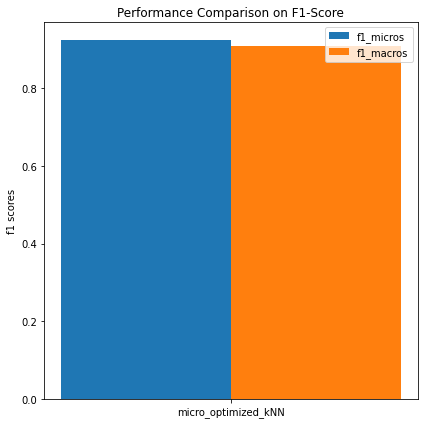

In [ ]:
clfs.append('micro_optimized_kNN')
f1_micro_macro_bar_plot([f1_micro['micro_optimized_kNN']], [f1_macro['micro_optimized_kNN']], [clfs[9]])

In [ ]:
print('Classification report of kNN optimized for f1_micro is:\n')
print(classification_report(y_test, predictions['micro_optimized_kNN']))

Classification report of kNN optimized for f1_micro is:

              precision    recall  f1-score   support

           1       0.88      0.88      0.88         8
           2       0.94      0.94      0.94        18

    accuracy                           0.92        26
   macro avg       0.91      0.91      0.91        26
weighted avg       0.92      0.92      0.92        26



#### Optimization for f1_macro

In [ ]:
threshold = list(np.arange(0.005,0.01,0.0001))
n_components = list(np.arange(4,18,2))
n_neighbors = list(np.arange(1,11,2))

kNN = KNeighborsClassifier()

kNN_pipe = Pipeline(steps=[('scaler', min_max_scaler), ('selector', selector), ('sampler', ros), ('pca', pca), ('knn', kNN)])
kNN_macro_estimator = GridSearchCV(kNN_pipe, dict(selector__threshold=threshold, pca__n_components=n_components,knn__n_neighbors=n_neighbors), cv=10, scoring='f1_macro', n_jobs=-1)
start_time = time.time()
kNN_macro_estimator.fit(X_train, y_train)
print(kNN_macro_estimator.best_score_)
fitting_time['macro_optimized_kNN'] = time.time() - start_time
print('Fitting and predicting time : ',fitting_time['macro_optimized_kNN'])
print('The best parameters found for min_max scaling kNN for f1_macro are : ', kNN_macro_estimator.best_params_)
print(kNN_macro_estimator.best_estimator_)

0.8495919358419359
Fitting and predicting time :  171.7970154285431
The best parameters found for min_max scaling kNN for f1_macro are :  {'knn__n_neighbors': 5, 'pca__n_components': 12, 'selector__threshold': 0.007900000000000008}
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('selector', VarianceThreshold(threshold=0.007900000000000008)),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=12)),
                ('knn', KNeighborsClassifier())])


In [ ]:
predictions['macro_optimized_kNN'] = kNN_macro_estimator.predict(X_test)
scores['macro_optimized_kNN'] = accuracy_score(y_test, predictions['macro_optimized_kNN'])
f1_micro['macro_optimized_kNN'] = f1_score(y_test, predictions['macro_optimized_kNN'], average='micro')
f1_macro['macro_optimized_kNN'] = f1_score(y_test, predictions['macro_optimized_kNN'], average='macro')
print(f1_micro['macro_optimized_kNN'], f1_macro['macro_optimized_kNN'])
print('Accuracy score found is : ', accuracy_score(y_test, predictions['macro_optimized_kNN']))

0.8461538461538461 0.8045112781954887
Accuracy score found is :  0.8461538461538461


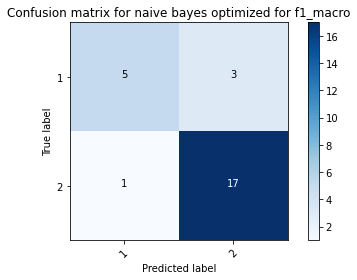

In [ ]:
cm_naive_bayes_opt_macro = confusion_matrix(y_test, predictions['macro_optimized_kNN'])
plot_confusion_matrix(cm_naive_bayes_opt_macro, np.unique(y_train), title = 'Confusion matrix for naive bayes optimized for f1_macro')

['dummy_uniform', 'dummy_constant1', 'dummy_constant2', 'dummy_most_freq', 'dummy_stratified', 'Naive_Bayes', 'Knn', 'micro_optimized_gnb', 'macro_optimized_gnb', 'micro_optimized_kNN', 'macro_optimized_kNN']


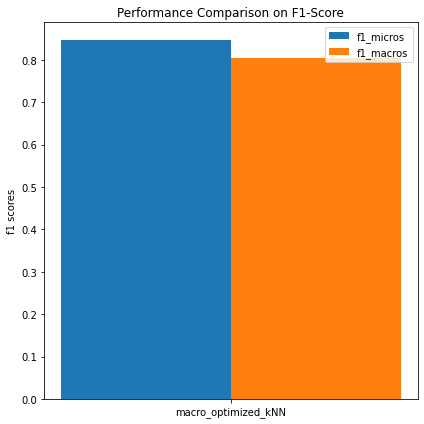

In [ ]:
clfs.append('macro_optimized_kNN')
print(clfs)
f1_micro_macro_bar_plot([f1_micro['macro_optimized_kNN']], [f1_macro['macro_optimized_kNN']], [clfs[10]])

In [ ]:
print('Classification report of kNN optimized for f1_macro is:\n')
print(classification_report(y_test, predictions['macro_optimized_kNN']))

Classification report of kNN optimized for f1_macro is:

              precision    recall  f1-score   support

           1       0.83      0.62      0.71         8
           2       0.85      0.94      0.89        18

    accuracy                           0.85        26
   macro avg       0.84      0.78      0.80        26
weighted avg       0.84      0.85      0.84        26



#### History table for kNN tuning + Result analysis


$$$$
Για τον kNN αποφασίσαμε να χρησιμοποιήσουμε τον mix max scaler καθώς ο συγκεκριμένος classifier δεν ακολουθεί κάποια κατανομή και γενικότερα ευνοείται απο την ύπαρξη τιμών σ'ένα μικρό διάστημα. Επίσης κρίνοντας απο την προηγούμενη περίπτωση και απο το γεγονός ότι η μείωση της διαστατικότητας μπορεί να βοηθήσει αρκέτα τον kNN θα χρησιμοποιήσουμε και PCA. Επίσης θα χρησιμοποιήσουμε variance threshold και random oversampler. H μορφή που θα έχουν τα πινακάκια θα είναι όμοια με την προηγούμενη με την μόνη διαφορά ότι θα έχουμε μία παραπάνω στήλη για την υπερπαράμετρο k του kNN. Παρακάτω φαίνονται o πίνακας για το  pipe που κατασκευάσαμε για την μετρική:
$$$$
 $$f_1\ micro$$

$$Disclaimer :$$ H μορφή των δεδομένων που εισάγονται στο pipe θα παρασουσιαστούν ως μία λίστα όπου θα ισχύει:
$$[start, stop, step] : με\ το\ stop\ να\ μην\ περιέχεται\ στις\ τιμές\ που\ θα\ ψάξουμε$$
$$$$

> $$ Pipe1 (micro) :  mix\ max\ scaler ->variance\ threshold ->random\ oversampler -> pca -> kNN $$
>$$$$
>
>$Steps$ | $threshold$ | $pca$ |$ n\ neighbors$| $fitting\ time$ | $score$ | $best\ parameters$
>--- | --- | --- | --- | --- | --- |--- |
> $$1$$ | [0, 0.1, 0.01] | [10, 80, 10] | [1,25,4] | 26.289 | $$0.84$$ | $$\{0, 20, 1\}$$
>$$2$$ | [0, 0.1, 0.01] | [10, 40, 5] | [1,25,4] | 21.672 | $$0.84$$ | $$\{0.01, 15, 5\}$$
>$$3$$ | [0, 0.05, 0.005] | [10, 35, 5] | [1,17,4] | 15.511 | $$0.85$$ | $$\{0.02,15,1\}$$
>$$4$$ | [0, 0.05, 0.0005] | [10, 35, 5] |[1,13,2] | 23.642 | $$0.85$$ | $$\{0,20,1\}$$


Παρατηρούμε ότι δεν μπορούμε να αυξήσουμε άλλο την απόδοση του classifier και επομένως σταματάμε στο βήμα 4 το οποίος μας γυρίζει:
$$$$
$$ pca\ components = 20\ ,  variance\ threshold = 0\ και\ neighbors = 1\ δίνοντας\ score\ στο\ train :$$$$
$$$$score = 0.85$$

Eκτελώντας την predict μέθοδο στο test set πλέον παίρνουμε ότι η απόδοση μας στο test set για micro optimization του kNN είναι:

$$score = 0.923$$

Παρατηρούμε ότι πήραμε αρκετά μεγαλύτερο score απο αυτό που βρήκαμε στο training set. Αυτό μπορεί να οφείλεται σε έναν από τους λόγους που αναφέραμε στον naive bayes. Στον kNN υπάρχει ένας ακόμα λόγος ο οποίος μπορεί να εξηγεί αυτή τη συμπεριφορά και αυτός είναι η παράμετρος $n\_neighbors$. Γενικά ο kNN classifier έχει high variance και low bias. Αυτό αλλάζει καθώς αυξάνουμε την τιμή των γειτόνων με αποτέλεσμα να αυξάνουμε σταδιακά το bias και να ρίχνουμε το variance. Η παρακάτω εικόνα δείχνει την επίδραση του bias και του variance:

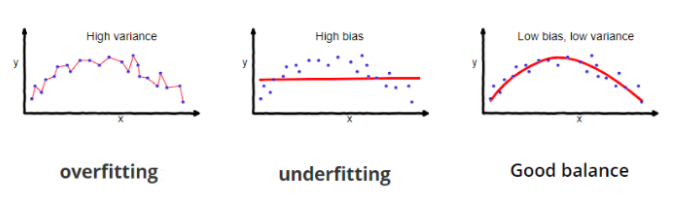

Παίρνοντας λοιπόν απο το grid search $neighbors = 1$ περιμέναμε ένα αρκετά υψηλό score στο training set και ένα ίσως χαμηλότερο score στο test set λόγω του overfitting. Αντ' αυτού στο test set παίρνουμε ακόμα μεγαλύτερο score πράγμα το οποίο σημαίνει ότι τα δείγματα του test set έμοιαζαν αρκετά με αυτά του train. Γενικά το αποτέλεσμα αυτό μπορεί να φαίνεται αρχικά πολύ καλό, αλλά δυστυχώς δεν είναι robust με αποτέλεσμα αν δώσουμε ένα καινούργιο set στον ταξινομητή μας να είναι πολύ πιθανό (αν όχι σίγουρο) η απόδοση του να μειωθεί αρκετά.

Έχοντας τα αποτελέσμα για την παραμετρικοποιήση και βελτιστοποίηση του $f_1\ micro$ θα χρησιμοποιήσουμε το $Pipe1$ για να βρούμε τις καλύτερες παραμέτρους για την μεγιστοποίση του $f_1\ macro:$


> $$ Pipe1 (macro) :  mix\ max\ scaler ->variance\ threshold ->random\ oversampler -> pca -> kNN $$
>$$$$
>
>$Steps$ | $threshold$ | $pca$ |$ n\ neighbors$| $fitting\ time$ | $score$ | $best\ parameters$
>--- | --- | --- | --- | --- | --- |--- |
> $$1$$ | [0, 0.1, 0.01] | [10, 80, 10] | [1,25,4] | 27.008 | $$0.829$$ | $$\{0.01, 10, 9\}$$
>$$2$$ | [0, 0.1, 0.01] | [5, 40, 5] | [1,25,4] | 25.027 | $$0.8$$ | $$\{0.02, 20, 5\}$$
>$$3$$ | [0, 0.05, 0.005] | [5, 40, 5] | [1,19,2] | 49.9 | $$0.83$$ | $$\{0.03,10,9\}$$
>$$4$$ | [0, 0.05, 0.001] | [4, 20, 2] |[1,15,2] | 213.87 | $$0.829$$ | $$\{0.005,16,5\}$$
>$$5$$ | [0, 0.05, 0.0005] | [4, 20, 2] |[1,15,2] | 109.39 | $$0.842$$ | $$\{0.008,10,5\}$$
>$$6$$ | [0.005, 0.01, 0.0001] | [4, 18, 2] |[1,11,2] | 171.79 | $$0.849$$ | $$\{0.0079,12,5\}$$



Παρατηρούμε ότι δεν μπορούμε να αυξήσουμε άλλο την απόδοση του classifier και επομένως σταματάμε στο βήμα 6 το οποίος μας γυρίζει:
$$$$
$$ pca\ components = 12\ ,  variance\ threshold = 0.0079\ και\ neighbors = 5\ δίνοντας\ score\ στο\ train :$$$$
$$$$score = 0.849$$

Eκτελώντας την predict μέθοδο στο test set πλέον παίρνουμε ότι η απόδοση μας στο test set για macro optimization του kNN είναι:

$$score = 0.8461$$

Παρατηρούμε ότι παρ' όλο που βρήκαμε σχεδόν ίδιο score με την προηγούμενη περίπτωση, η απόδοση μας στο test set έπεσε αρκετά. Εκτός απο την διαφοροποίηση της μετρικής η οποία οδήγησε σε διαφορετικές παραμέτρους το μοντέλο που φτίαξαμε για την μεγιστοποίηση του $f_1\ macro$ είναι περισσότερο robust σε σχέση με το μοντέλο που προέκυψε παραπάνω. 

## Summarization

Έχοντας αναλύσει τους ταξινομητές που προέκυψαν στα προηγούμενα ερωτήματα τέλος για να έχουμε μία καλύτερη εικόνα θα φτιάξουμε έναν πίνακα με τα συνολικά δεδομένα. Ο πίνακας φαίνεται παρακάτω:

| Classifiers | Baseline accuracy | Optimized accuracy(f1 micro)| Optimized accuracy(f1 macro)| Baseline f1 micro score | Optimized f1 micro score | Baseline f1 macro score | Optimized f1 macro score |
|----------------------------------------|-------------------|------|--------------------|-------------------------|--------------------------|-------------------------|--------------------------|
| Uniform dummy classifier| 0.5769 | -  | - |0.5769 | -| 0.5438| - |
| Constant 1 dummy classifier | 0.3076 | - |- | 0.307 | - | 0.2352|  -|
| Constant 2 dummy classifier| 0.6923 | - | - |0.6923 | - | 0.409|  - |
| Most frequent dummy classifier| 0.6923  | - | - |0.6923  |- | 0.409|- |
| Stratified dummy classifier | 0.5769 | - |- |0.5769 | -|  0.5438 |-  |
| Gnb | 0.3461 | 0.8461 | 0.6923 |0.3461 | 0.8461| 0.295 | 0.6601  |
| kNN | 0.6923 |  0.923 | 0.8461 |0.6923|  0.923 |  0.675|  0.8045  |

Όσον αφορά την βελτιστοποίση του accuracy score ο gnb παρουσιάζει την μεγαλύτερη ποσοστικά βελτίωση ειδικά για f1 micro, ενώ ο kNN παρουσιάζει σταθερά καλύτερη συνολική απόδοση. 

$Disclaimer$ : Για τους χρόνους του fit και predict δεν θα τους δείξουμε σε αυτόν τον πίνακα καθώς στο history table του κάθε classifier φαίνονται οι χρόνοι για κάθε grid search που έγινε. Δώσαμε βάσει στον χρόνο για το fit καθώς το predict απο την στιγμή που είχαμε κάνει fit έπαιρνε αμελητέο χρόνο.

Παρακάτω επίσης θα δείξουμε τις γραφικές για τα $scores$ όλων των classifiers, καθώς και τα $f_1\ micro$ και $f_1\ macro$ συνολικά.

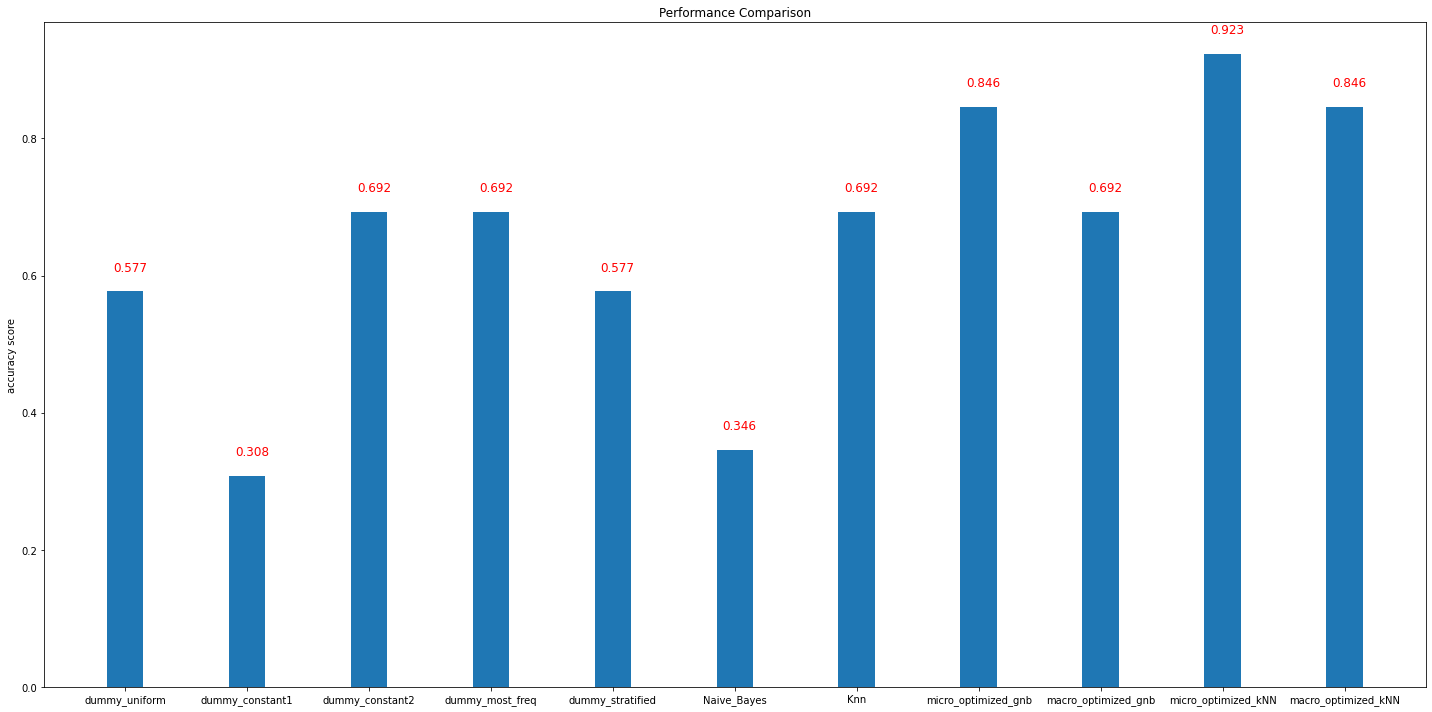

In [ ]:
scores_bar_plot(scores, clfs)

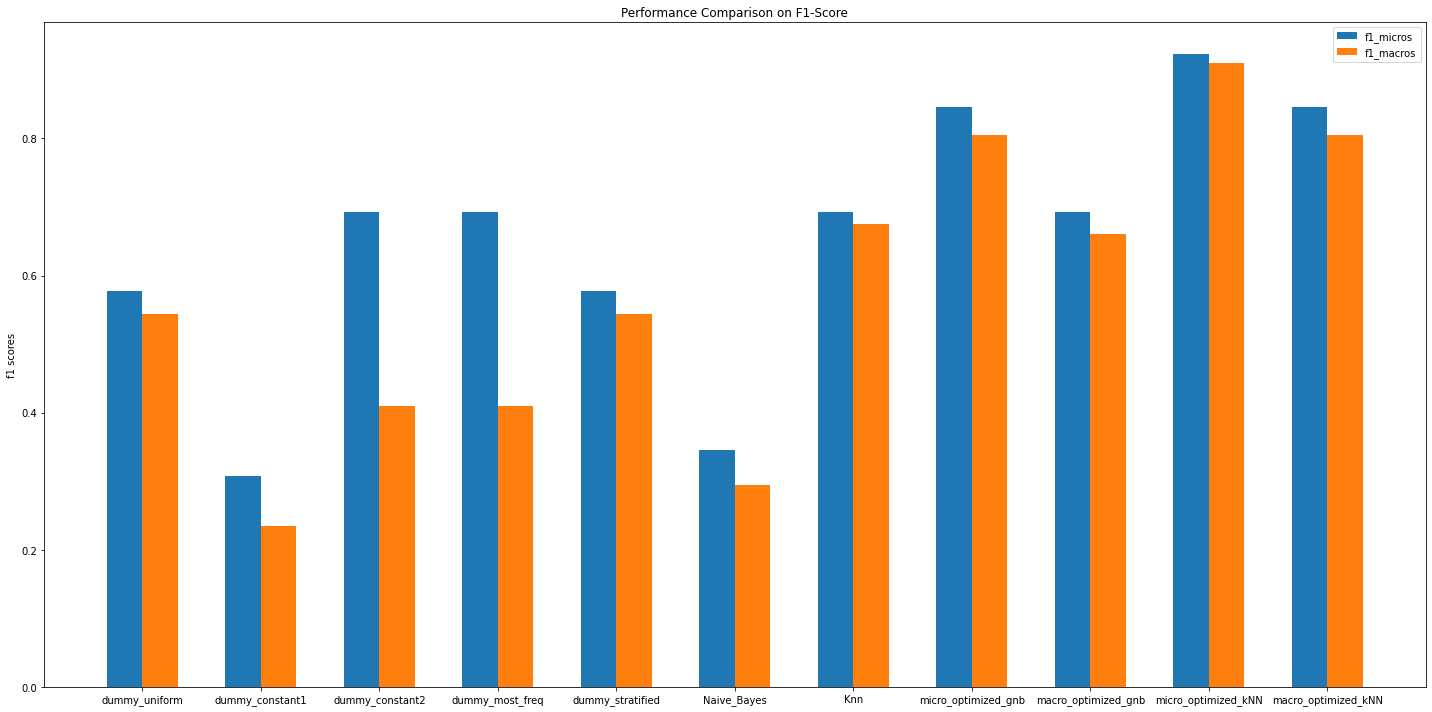

In [ ]:
f1_micro_macro_bar_plot(f1_micro, f1_macro, clfs)

# BIG DATASET

## Basic information about the dataset

### Dataset Description

Σε αυτό το μέρος της εργασίας θα αναλύσουμε το [Isolet Dataset](https://archive.ics.uci.edu/ml/datasets/isolet) το οποίο βρίσκεται στο UCI machine learning repository. Για την δημιουργία του συγκεκριμένου dataset 150 άνθρωποι είπαν όλα τα γράμματα της άλφαβητου απο 2 φορές. Έπειτα η πληροφορία χωρίστηκε σε 5 group όπου αντιστοιχεί κάθε ένα απο τα isolet1,2,3,4,5. Για κάθε ένα σήμα του ήχου κάθε γράμματος υπάρχουν 617 features που το χαρακτηρίζουν. Τα features αυτά περιλαμβάνουν spectral coefficients, contour features, sonorant features, pre-sonorant features και post-sonorant features. Το πρόβλημα ταξινόμησης λοιπόν είναι αν μπορούμε έχοντας όλα αυτά τα χαρακτηριστικά για τα δείγματα να εντοπίσουμε σε ποιο γράμμα της αλφαβήτου αντιστοιχεί το συγκεκριμένο δείγμα. 


### Importing the dataset
 

In [ ]:
uploaded_files = files.upload()

Saving isolet1+2+3+4+5.csv to isolet1+2+3+4+5.csv


### Type and number of samples / feautures

Όλα τα features είναι floats και είναι ήδη scaled σε κλίμακα [-1, 1]

In [ ]:
dataset = pd.read_csv('isolet1+2+3+4+5.csv',header=None)
print('The dataset has a shape of:', dataset.shape,'\n')  #whole dataset shape

no_samples, no_features = dataset.shape     # we substract 1 from no_features because the last column includes the labels
no_features -= 1
dataset.info()     #we take the general information about the dataset 
print('')
print('The dataset contains a total of : {} samples and {} features'.format(no_samples, no_features),'\n')
print('Also all the features are float64')    #summary gives float64(618) but the last columns is reffered to the labels so we dont take that into consideration

The dataset has a shape of: (7797, 618) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Columns: 618 entries, 0 to 617
dtypes: float64(618)
memory usage: 36.8 MB

The dataset contains a total of : 7797 samples and 617 features 

Also all the features are float64


### Headings and indexing
 
Παρατηρούμε πως στο Dataset μας δεν υπάρχει κάποια επικεφαλίδα/αρίθμηση ούτε για τα rows ούτε για τα columns.

In [ ]:
print(dataset) 

         0       1       2       3    ...     614     615     616   617
0    -0.4394 -0.0930  0.1718  0.4620  ...  0.6410  0.5898 -0.4872   1.0
1    -0.4348 -0.1198  0.2474  0.4036  ...  0.4318  0.4546 -0.0910   1.0
2    -0.2330  0.2124  0.5014  0.5222  ...  0.2540  0.1588 -0.4762   2.0
3    -0.3808 -0.0096  0.2602  0.2554  ... -0.0072  0.0936 -0.1510   2.0
4    -0.3412  0.0946  0.6082  0.6216  ...  0.3124  0.2188 -0.2500   3.0
...      ...     ...     ...     ...  ...     ...     ...     ...   ...
7792 -0.6842 -0.3280 -0.1984  0.2956  ...  0.3928  0.4286  0.2858  24.0
7793 -0.5912 -0.2420  0.8174  1.0000  ... -0.2308 -0.4230 -0.7116  25.0
7794 -0.6696 -0.3730  0.1584  0.8910  ...  0.0728  0.0728 -0.5818  25.0
7795 -0.5764 -0.1764  0.5106  0.3742  ...  0.3044 -0.0434 -0.5000  26.0
7796 -0.6624 -0.3334  0.3666  0.4292  ... -0.0894 -0.1708 -0.3170  26.0

[7797 rows x 618 columns]


### Labels

Οι ετικέτες των κλάσεων βρίσκονται στην τελευταία κολόνα και παρουσιάζονται αριθμημένες παρακάτω:

In [ ]:
labels = dataset.iloc[:,-1]
labels

0        1.0
1        1.0
2        2.0
3        2.0
4        3.0
        ... 
7792    24.0
7793    25.0
7794    25.0
7795    26.0
7796    26.0
Name: 617, Length: 7797, dtype: float64

### Text file

Το isolet.info file μας έδινε βασικές πληροφορίες για το dataset και επομένως δεν κάναμε κάποια αλλαγή σε αυτό.

### Missing values



In [ ]:
find_missing_values(dataset) #function created in the small dataset 

There arent any missing values in the dataset


### Check if the dataset is balanced or not

In [ ]:
balance(dataset, big = True)#function created in the small dataset 

Label [1.0] appears 300 times in the dataset => 3.8476337052712584% 

Label [2.0] appears 300 times in the dataset => 3.8476337052712584% 

Label [3.0] appears 300 times in the dataset => 3.8476337052712584% 

Label [4.0] appears 300 times in the dataset => 3.8476337052712584% 

Label [5.0] appears 300 times in the dataset => 3.8476337052712584% 

Label [6.0] appears 298 times in the dataset => 3.8219828139027827% 

Label [7.0] appears 300 times in the dataset => 3.8476337052712584% 

Label [8.0] appears 300 times in the dataset => 3.8476337052712584% 

Label [9.0] appears 300 times in the dataset => 3.8476337052712584% 

Label [10.0] appears 300 times in the dataset => 3.8476337052712584% 

Label [11.0] appears 300 times in the dataset => 3.8476337052712584% 

Label [12.0] appears 300 times in the dataset => 3.8476337052712584% 

Label [13.0] appears 299 times in the dataset => 3.8348082595870205% 

Label [14.0] appears 300 times in the dataset => 3.8476337052712584% 

Label [15.0] ap

### Train/Test split

In [ ]:
df1 = dataset.iloc[:,:-1].values
df2 = labels.values
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size = 0.3)  

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)   #verification
print(y_train,'\n', type(y_train))

(5457, 617) (2340, 617) (5457,) (2340,)
[ 5.  1.  4. ... 22.  1.  1.] 
 <class 'numpy.ndarray'>


In [ ]:
classes, numbers = np.unique(y_train, return_counts=True)   #we print in order to see how many samples of each class are in the training set
for name, number in zip(classes, numbers):
  print(name, number)

1.0 217
2.0 196
3.0 219
4.0 195
5.0 213
6.0 210
7.0 203
8.0 212
9.0 208
10.0 226
11.0 218
12.0 221
13.0 208
14.0 216
15.0 220
16.0 201
17.0 214
18.0 220
19.0 200
20.0 200
21.0 214
22.0 211
23.0 191
24.0 207
25.0 207
26.0 210


## Baseline Classification

Σε αυτό το μέρος του project θα κάνουμε αξιολόγηση της επίδοσης των classifiers χωρίς να πειράξουμε τις υπερπαραμέτους που έχουν. Οι classifiers αυτοί είναι οι εξής:

- Dummy
- Gaussian Naive Bayes
- Knn
- MLP
- SVM

### Dummy Classifiers

Χρησιμοποιώντας το DummyClassifier module απο την sklearn θα αξιολογήσουμε την επίδοση διαφορετικών στρατηγικών για τους dummy classifier. Συγκεκριμένα οι στρατηγικές είναι:

- Uniform
- Constant (1...26)
  - Για τον constant όπως και στο μικρό dataset δείχνουμε μόνο το accuracy για constant = 1 και constant = 2
- Most frequent
- Stratified

#### Classification + Confusion Matrix + Metrics

In [ ]:
predictions, scores, f1_micro, f1_macro, clfs = DummyClassification(X_train, X_test, y_train, y_test)

#print the score that each dummy classifier gave
print('The accuracy score that each dummy classifier gave is listed below:\n')
for mode in scores:
  print('Dummy classifier with', mode, 'strategy gave an accuracy score of:', scores[mode]*100, '%\n') 

The accuracy score that each dummy classifier gave is listed below:

Dummy classifier with uniform strategy gave an accuracy score of: 4.914529914529915 %

Dummy classifier with constant1 strategy gave an accuracy score of: 3.547008547008547 %

Dummy classifier with constant2 strategy gave an accuracy score of: 4.444444444444445 %

Dummy classifier with most_freq strategy gave an accuracy score of: 3.1623931623931623 %

Dummy classifier with stratified strategy gave an accuracy score of: 3.632478632478633 %



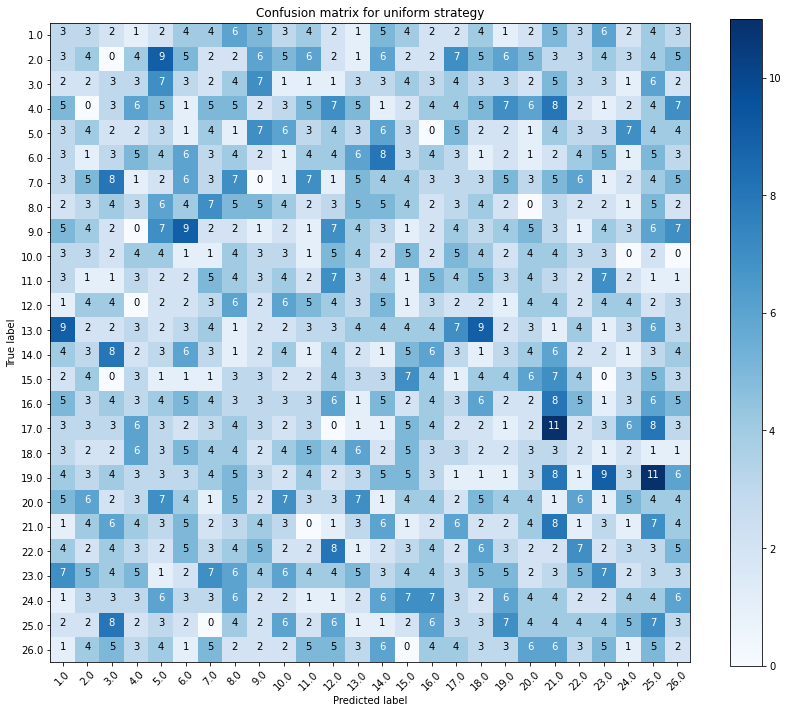

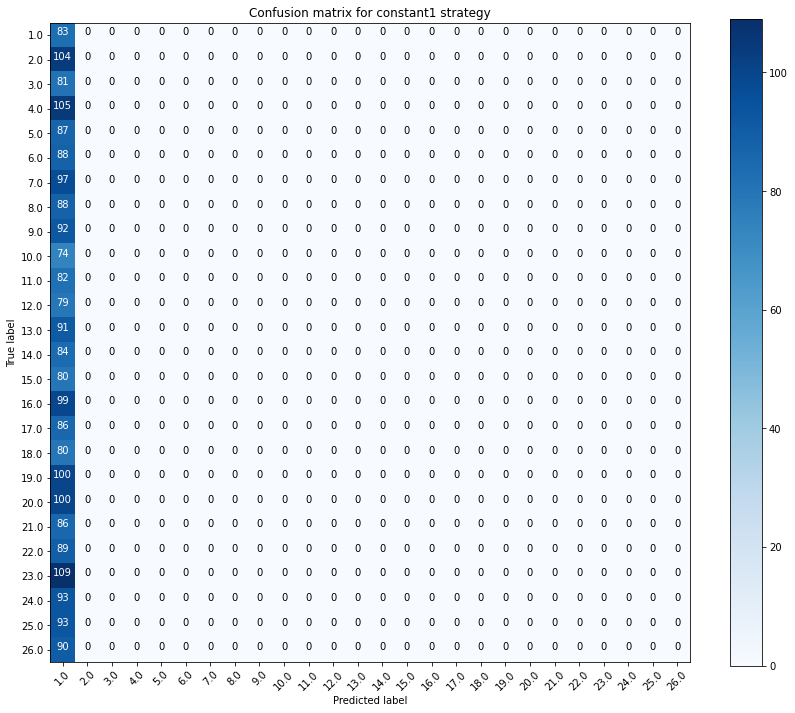

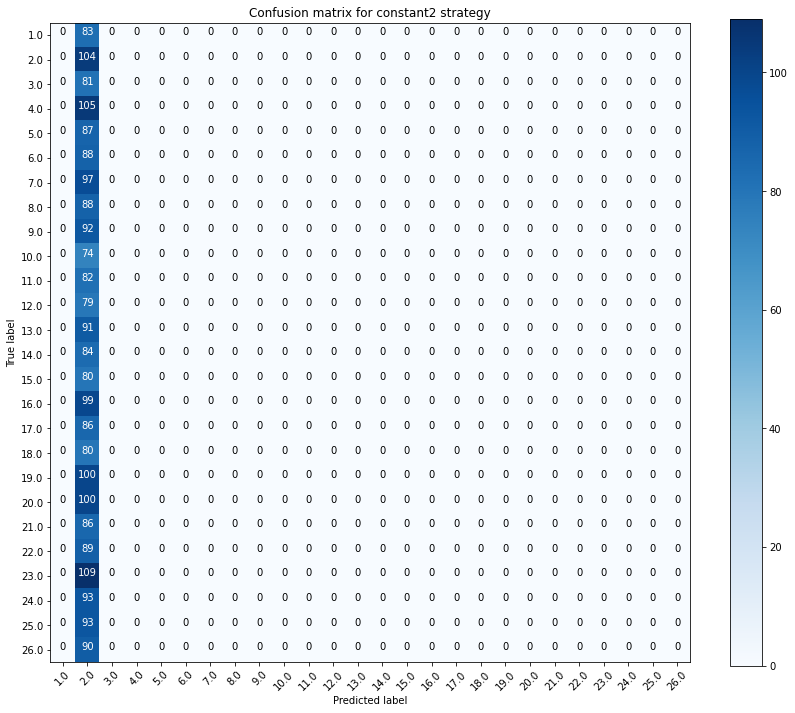

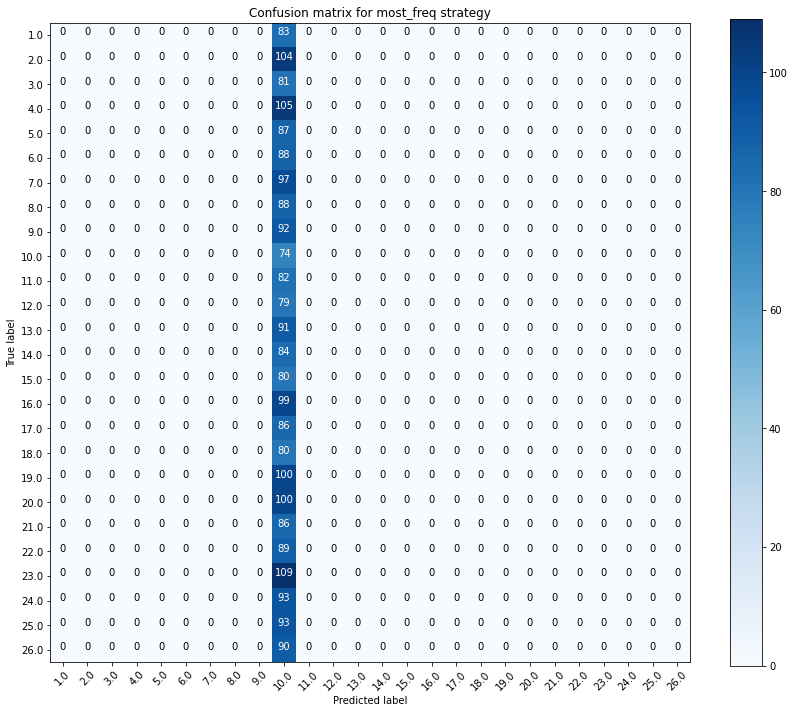

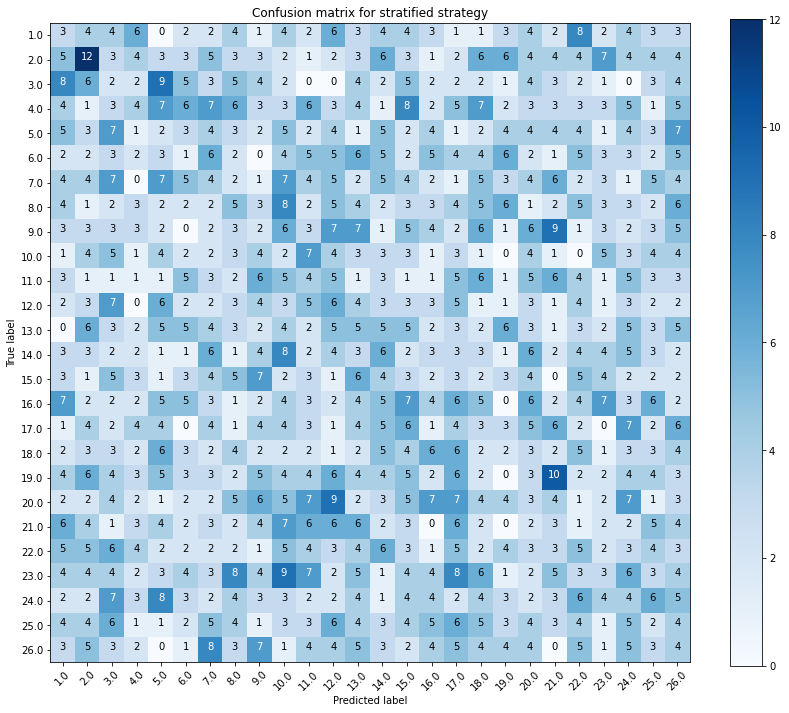

In [ ]:
#print the confusion matrix for each dummy classifier
for prediction in predictions:
  cm_prediction = confusion_matrix(y_test, predictions[prediction])
  plot_confusion_matrix(cm_prediction, np.unique(y_train), title = 'Confusion matrix for ' + prediction + ' strategy', size = 'big')

In [ ]:
#print f1 scores for the dummy classifiers
for items in f1_micro:
  print('f1 micro of', items, 'strategy is: ', f1_micro[items])
  print('f1 macro of', items, 'strategy is: ', f1_macro[items], '\n')

f1 micro of uniform strategy is:  0.04401709401709402
f1 macro of uniform strategy is:  0.043582856269465974 

f1 micro of constant1 strategy is:  0.03547008547008547
f1 macro of constant1 strategy is:  0.002635004285850344 

f1 micro of constant2 strategy is:  0.044444444444444446
f1 macro of constant2 strategy is:  0.003273322422258592 

f1 micro of most_freq strategy is:  0.03162393162393162
f1 macro of most_freq strategy is:  0.002358039640558282 

f1 micro of stratified strategy is:  0.0405982905982906
f1 macro of stratified strategy is:  0.04002764639299305 



#### Bar plot for f1 scores

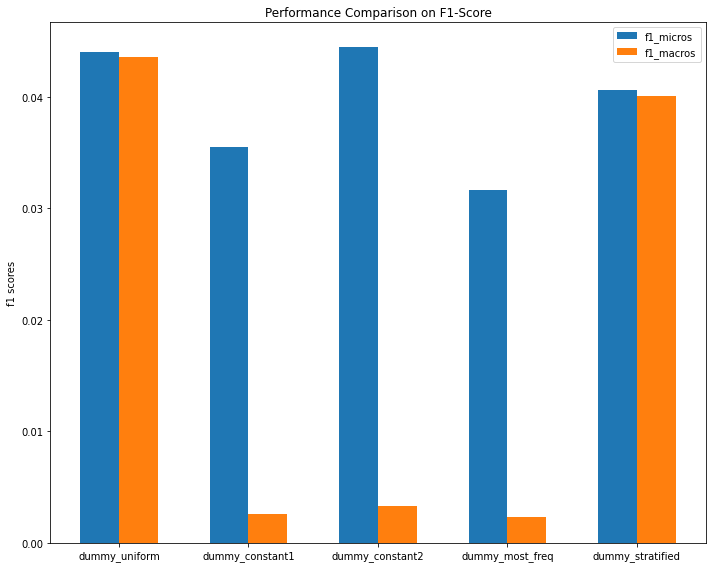

In [ ]:
f1_micro_macro_bar_plot(f1_micro, f1_macro, clfs)

#### Classification report + Analyzing the results

In [ ]:
for prediction in predictions:
  print('Classification report of dummy classifier with ', prediction, 'strategy is:\n')
  print(classification_report(y_test, predictions[prediction]))

Classification report of dummy classifier with  uniform strategy is:

              precision    recall  f1-score   support

         1.0       0.03      0.04      0.04        83
         2.0       0.05      0.04      0.04       104
         3.0       0.03      0.04      0.04        81
         4.0       0.07      0.06      0.06       105
         5.0       0.03      0.03      0.03        87
         6.0       0.07      0.07      0.07        88
         7.0       0.04      0.03      0.03        97
         8.0       0.05      0.06      0.05        88
         9.0       0.01      0.01      0.01        92
        10.0       0.03      0.04      0.04        74
        11.0       0.03      0.02      0.02        82
        12.0       0.04      0.05      0.05        79
        13.0       0.05      0.04      0.05        91
        14.0       0.01      0.01      0.01        84
        15.0       0.08      0.09      0.08        80
        16.0       0.04      0.04      0.04        99
        17.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Στην περίπτωση του μεγάλου dataset όπου πλέον έχουμε multiclass classification τα αποτελέσματα που δίνουν οι dummy δεν μας δίνουν κάποια ουσιαστική πληροφορία και επομένως δεν θα χρησιμοποιηθούν ή αναλυθουν περαιτέρω.

### Gaussian Naive Bayes



#### Classification + Confusion Matrix + Metrics

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions['naive_bayes'] = gnb.predict(X_test)
scores['naive_bayes'] = gnb.score(X_test, y_test)
print('The predicted array GaussianNB gave is: ', predictions['naive_bayes'], '\n')
print('The accuracy score GaussianNB gave is: ', scores['naive_bayes'])

The predicted array GaussianNB gave is:  [25. 11.  4. ...  1. 18.  2.] 

The accuracy score GaussianNB gave is:  0.8512820512820513


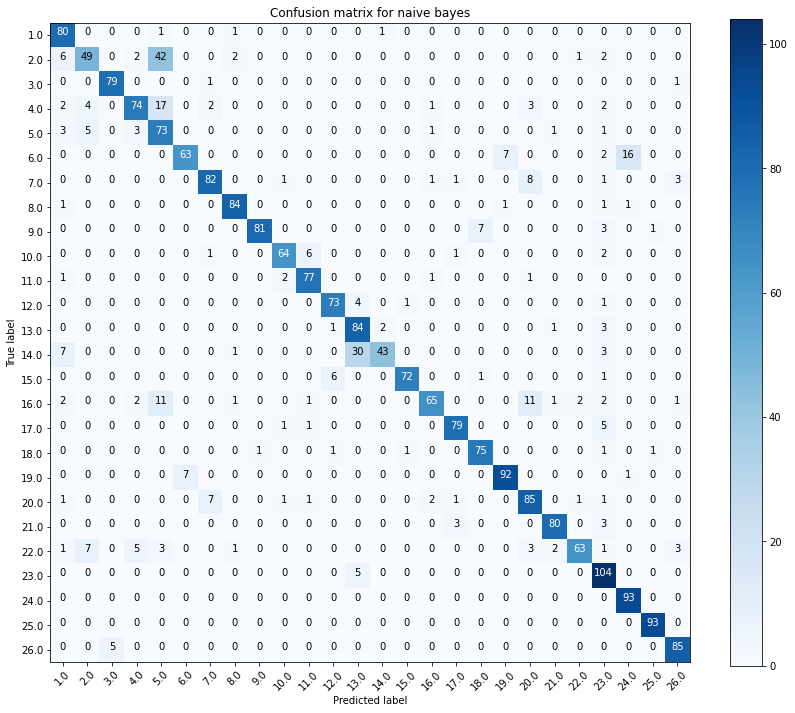

In [ ]:
cm_naive_bayes = confusion_matrix(y_test, predictions['naive_bayes'])
plot_confusion_matrix(cm_naive_bayes, np.unique(y_train), title = 'Confusion matrix for naive bayes',size = 'big')

In [ ]:
clfs.append('Naive_Bayes')
f1_micro['naive_bayes'] = f1_score(y_test, predictions['naive_bayes'], average = 'micro')
f1_macro['naive_bayes'] = f1_score(y_test, predictions['naive_bayes'], average = 'macro')
print('Naive_Bayes classifier gave f1 micro score of: ', f1_micro['naive_bayes'], '\n')
print('Naive_Bayes classifier gave f1 macro score of: ', f1_macro['naive_bayes'])

Naive_Bayes classifier gave f1 micro score of:  0.8512820512820513 

Naive_Bayes classifier gave f1 macro score of:  0.8530789813459094


#### Bar plot for f1 scores

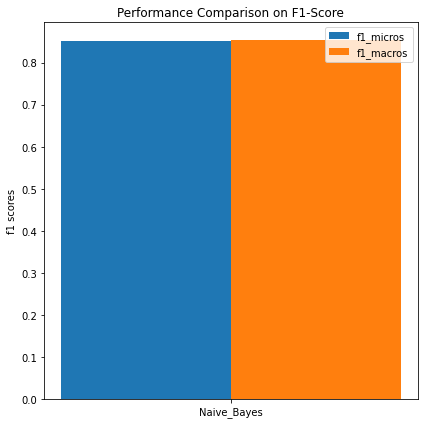

In [ ]:
f1_micro_macro_bar_plot([f1_micro['naive_bayes']], [f1_macro['naive_bayes']], [clfs[5]])

#### Classification report + Analyzing the results

In [ ]:
print('Classification report of naive bayes classifier is:\n')
print(classification_report(y_test, predictions['naive_bayes']))

Classification report of naive bayes classifier is:

              precision    recall  f1-score   support

         1.0       0.77      0.96      0.86        83
         2.0       0.75      0.47      0.58       104
         3.0       0.94      0.98      0.96        81
         4.0       0.86      0.70      0.77       105
         5.0       0.50      0.84      0.62        87
         6.0       0.90      0.72      0.80        88
         7.0       0.88      0.85      0.86        97
         8.0       0.93      0.95      0.94        88
         9.0       0.99      0.88      0.93        92
        10.0       0.93      0.86      0.90        74
        11.0       0.90      0.94      0.92        82
        12.0       0.90      0.92      0.91        79
        13.0       0.68      0.92      0.79        91
        14.0       0.93      0.51      0.66        84
        15.0       0.97      0.90      0.94        80
        16.0       0.92      0.66      0.76        99
        17.0       0.93     

Ο gaussian naive bayes δίνει ένα καλό accuracy της τάξης του 85.12% και διατηρεί ελάχιστα καλύτερο precision απ' ότι recall. Αξιοσημείωτο είναι το γεγονός ότι ο gnb όπως φαίνεται από τον confusion matrix τείνει να κάνει πολλά λάθη όταν το πραγματικό δείγμα είναι το γράμμα Β και το γράμμα Ν. Συγκεκριμένα σε ποσοστό περίπου 43% όταν το γράμμα είναι B ο ταξινομητής επιλέγει Ε. Αντίστοιχα σε ποσοστό περίπου 35% όταν το γράμμα είναι M ο gnb επιλέγει το Ν. Αυτό μπορεί να οφείλεται στο ότι αυτοί οι συνδιασμοί γραμμάτων μπορεί να έχουν παρόμοια χαρακτηριστικά. Σε επόμενη ενότητα θα δούμε πως μπορούμε να βελτίωσουμε την επίδοση του ταξινομητή, ώστε να του ανεβάσουμε την επίδοση όσο το δυνατόν περισσότερο.

### Knn

#### Classification + Confusion Matrix + Metrics

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions['knn'] = knn.predict(X_test)
scores['knn'] = knn.score(X_test, y_test)
print('The predicted array Knn gave is: ', predictions['knn'], '\n')
print('The accuracy score Knn gave is: ', scores['knn'])

The predicted array Knn gave is:  [25. 11. 22. ...  1. 18.  2.] 

The accuracy score Knn gave is:  0.8914529914529915


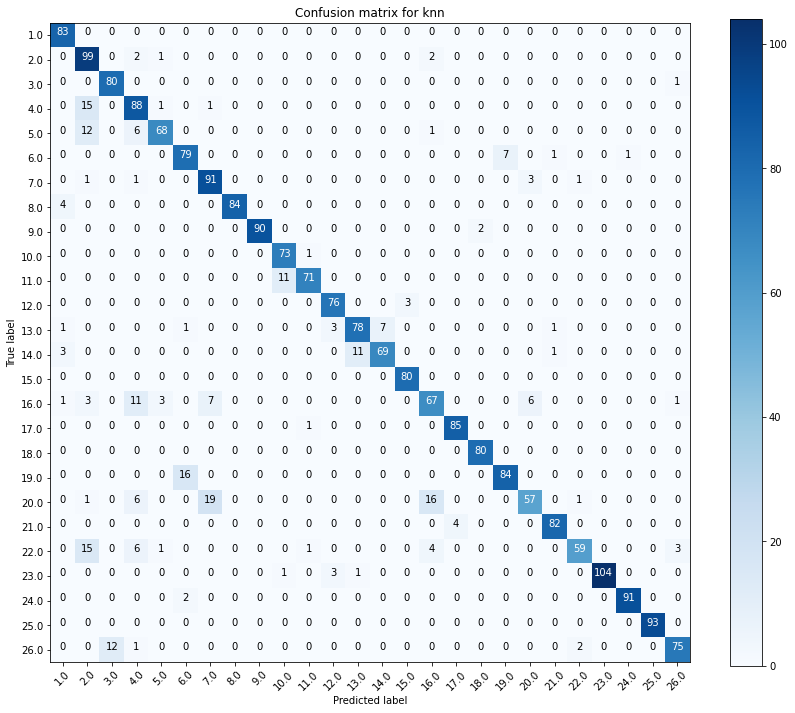

In [ ]:
cm_knn = confusion_matrix(y_test, predictions['knn'])
plot_confusion_matrix(cm_knn, np.unique(y_train), title = 'Confusion matrix for knn',size = 'big')

In [ ]:
clfs.append('Knn')
f1_micro['kNN'] = f1_score(y_test, predictions['knn'], average = 'micro')
f1_macro['kNN'] = f1_score(y_test, predictions['knn'], average = 'macro')
print('Knn classifier gave f1 micro score of: ', f1_micro['kNN'], '\n')
print('Knn classifier gave f1 macro score of: ', f1_macro['kNN'])

Knn classifier gave f1 micro score of:  0.8914529914529915 

Knn classifier gave f1 macro score of:  0.8939097838431217


#### Bar plot for f1 scores

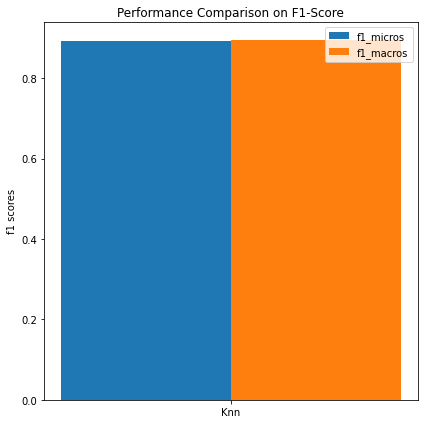

In [ ]:
f1_micro_macro_bar_plot([f1_micro['kNN']], [f1_macro['kNN']], [clfs[6]])

#### Classification report + Analyzing the results

In [ ]:
print('Classification report of knn classifier is:\n')
print(classification_report(y_test, predictions['knn']))

Classification report of knn classifier is:

              precision    recall  f1-score   support

         1.0       0.90      1.00      0.95        83
         2.0       0.68      0.95      0.79       104
         3.0       0.87      0.99      0.92        81
         4.0       0.73      0.84      0.78       105
         5.0       0.92      0.78      0.84        87
         6.0       0.81      0.90      0.85        88
         7.0       0.77      0.94      0.85        97
         8.0       1.00      0.95      0.98        88
         9.0       1.00      0.98      0.99        92
        10.0       0.86      0.99      0.92        74
        11.0       0.96      0.87      0.91        82
        12.0       0.93      0.96      0.94        79
        13.0       0.87      0.86      0.86        91
        14.0       0.91      0.82      0.86        84
        15.0       0.96      1.00      0.98        80
        16.0       0.74      0.68      0.71        99
        17.0       0.96      0.99   

Όπως φαίνεται παραπάνω ο baseline kNN δίνει καλύτερο accuracy από τον gnb. Επίσης στην περίπτωση του kNN τα λάθη που γίνονται είναι αρκετά πιο διασκορποσμένα και δεν εστιάζονται σε ένα ζεύγος γραμμάτων.

### MLP Classifier


Το multi-layer perceptron αποτελεί έναν supervised learning algorithm το οποίο μαθαίνει και προσαρμόζει μία συνάρτηση $f:\ R^m -> R^0$ ανάλογα τα δεδομένα που του δίνουμε για εκπαίδευση. Δίνοντας έναν αριθμό απο feautures $X = x_1,\ x_2,\ ..., x_m$ και έναν στόχο y κατασκευάζει έναν νευρωνικό δίκτυο σαν και αυτό που φαίνεται παρακάτω (με ένα ή παραπάνω hidden layer):

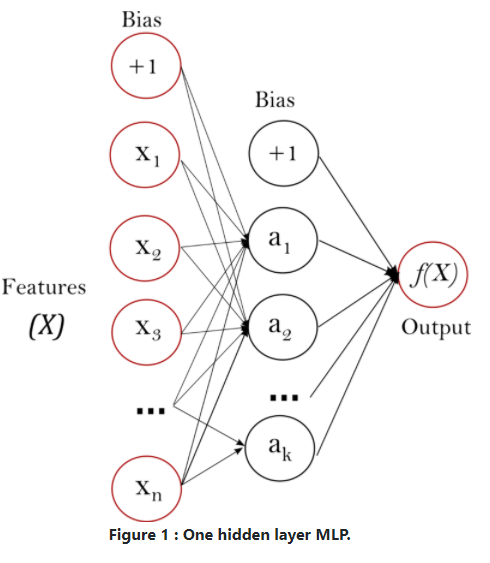

H λειτουργία του παραπάνω σχήματος έχει ως εξής:
$$$$
Το πρώτο σετ νευρώνων αποτελεί τις εισόδους του νευρωνικού δικτύου και συγκεκριμένα κάθε νευρώνας αφορά ένα feature. Κάθε νευρώνας στο hidden layer μετατρέπει τις τιμές που πήρε απο το στάδιο εισόδου και προσθέτει βάρος σε κάθε μία απο αυτές ως εξής:
$$w_1x_1 + w_2x_2 + ... + w_mx_m$$
Έπειτα πριν τα δεδομένα φτάσουν στο τελικό στάδιο χρησιμοποιείται μία activation function $g : R -> R$. Τέλος το τελικό στάδιο παίρνει τα αποτελέσματα του hidden layer και τα μετατρέπει στην μορφή του output value.

Tα MLP γενικά έχουν ένα μεγάλο αριθμό υπερπαραμέτρων τις οποίες θα δούμε αναλυτικότερα στο optimization. Επίσης για να μπορέσει να δώσει αποτελέσματα το MLP πρέπει τα δεδομένα μας να είναι scaled. Τέλος το MLP είναι κατάλληλο τόσο για binary όσο και για multiclass classification.


#### Classification + Confusion Matrix + Metrics

In [ ]:
from sklearn.neural_network import MLPClassifier

Mlp = MLPClassifier()
Mlp.fit(X_train, y_train)
predictions['Mlp'] = Mlp.predict(X_test)
scores['Mlp'] = Mlp.score(X_test, y_test)
print('The predicted array Mlp gave is: ', predictions['Mlp'], '\n')
print('The accuracy score Mlp gave is: ', scores['Mlp'])



The predicted array Mlp gave is:  [25. 11. 22. ...  1. 18.  2.] 

The accuracy score Mlp gave is:  0.9572649572649573


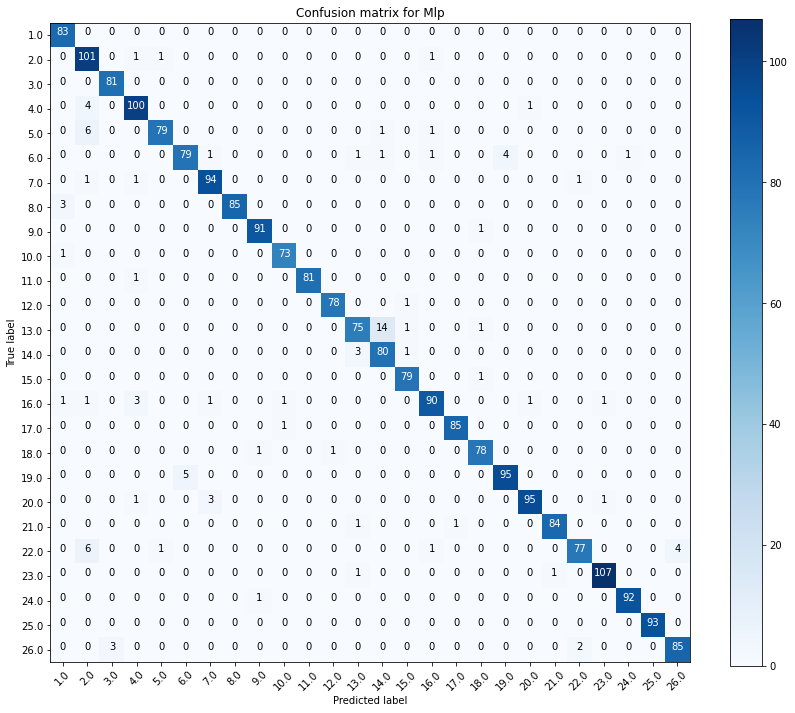

In [ ]:
cm_Mlp = confusion_matrix(y_test, predictions['Mlp'])
plot_confusion_matrix(cm_Mlp, np.unique(y_train), title = 'Confusion matrix for Mlp',size = 'big')

In [ ]:
clfs.append('Mlp')
f1_micro['Mlp'] = f1_score(y_test, predictions['Mlp'], average = 'micro')
f1_macro['Mlp'] = f1_score(y_test, predictions['Mlp'], average = 'macro')
print('Mlp classifier gave f1 micro score of: ', f1_micro['Mlp'], '\n')
print('Mlp classifier gave f1 macro score of: ', f1_macro['Mlp'])

Mlp classifier gave f1 micro score of:  0.9572649572649573 

Mlp classifier gave f1 macro score of:  0.9579766262265828


#### Bar plot for f1 scores

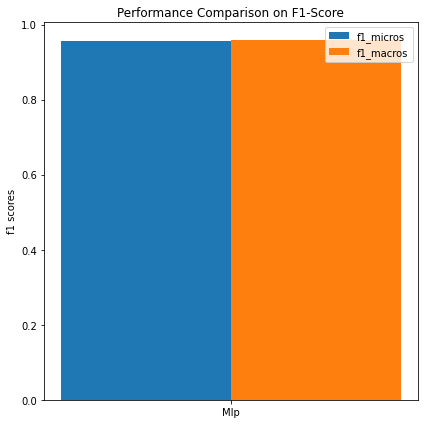

In [ ]:
f1_micro_macro_bar_plot([f1_micro['Mlp']], [f1_macro['Mlp']], [clfs[7]])

#### Classification report + Analyzing the results

In [ ]:
print('Classification report of Mlp classifier is:\n')
print(classification_report(y_test, predictions['Mlp']))

Classification report of Mlp classifier is:

              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97        83
         2.0       0.85      0.97      0.91       104
         3.0       0.96      1.00      0.98        81
         4.0       0.93      0.95      0.94       105
         5.0       0.98      0.91      0.94        87
         6.0       0.94      0.90      0.92        88
         7.0       0.95      0.97      0.96        97
         8.0       1.00      0.97      0.98        88
         9.0       0.98      0.99      0.98        92
        10.0       0.97      0.99      0.98        74
        11.0       1.00      0.99      0.99        82
        12.0       0.99      0.99      0.99        79
        13.0       0.93      0.82      0.87        91
        14.0       0.83      0.95      0.89        84
        15.0       0.96      0.99      0.98        80
        16.0       0.96      0.91      0.93        99
        17.0       0.99      0.99   

Όπως είναι φανερό το MLP ακόμα και με τις default παραμέτρους έδωσε πολύ υψηλό accuracy. Οι τιμές των precision και recall είναι και εδώ παρόμοιες. Επιπρόσθετα παρατηρούμε ότι και αυτός ο ταξινομητής κάνει τα περισσότερα λάθη στο ζεύγος N,M.

### SVM

Ο σκοπός του SVM classifier είναι να βρει ένα hyperplane το οποίο να χωρίζει κατάλληλα τα data points. O svm είναι εν γένει binary classifier αλλά με την χρήση τεχνικών όπως είναι το one vs one και το one vs rest ο SVM μπορεί να γίνει και multiclass classifier. 

Για να γίνει περισσότερο κατανοητή η λειτουργία του SVM παραθέτουμε την παρακάτω φωτογραφία:

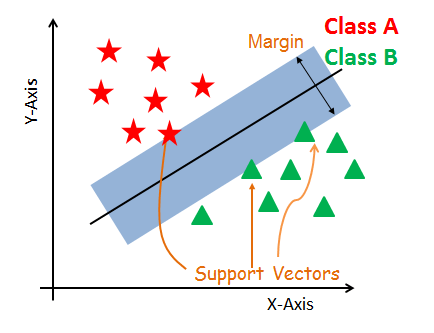

Η βασική ιδέα λοιπόν είναι η εύρεση μίας maximum marginal hyperplane η οποία χωρίζει καλύτερα τις κλάσεις που έχουμε. Support vectors είναι τα σημεία τα οποία είναι κοντινότερα σε αυτήν. Επομένως ο SVM προσπαθεί κάθε φορά να βρει τα καλύτερα support vectors τα οποία "απέχουν" απο την κλάση στην οποία ανήκουν και τα οποία θα δώσουν την καλύτερη διαχωριστική ικανότητα μεταξύ των κλάσεων.

Υπάρχουν περιπτώσεις στις οποίες τα δεδομένα δεν είναι γραμμικά διαχωρίσιμα. Για τις περιπτώσεις αυτές ορίζουμε την παράμετρο kernel με διαφορετικές τιμές για να δούμε ποιο είδος hyperplane θα είναι το καλύτερο ανάλογα την περίπτωση που εξετάζουμε. Ο SVM έχει και αρκετές άλλες σημαντικές παραμέτρους με τις οποίες θα ασχοληθούμε στην ενότητα της βελτιστοποίησης. Η παράμετρος του kernel και ο τρόπος διαχωρισμού κάθε φορά φαίνονται στην παρακάτω εικόνα:

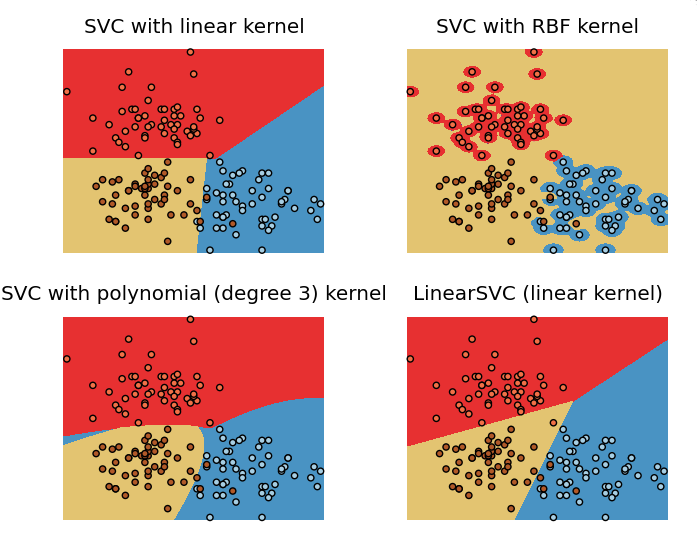


#### Classification + Confusion Matrix + Metrics

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"

SVM = SVC()
SVM.fit(X_train, y_train)  #when baseline kernel = 'rbf'
predictions['SVM'] = SVM.predict(X_test)
scores['SVM'] = SVM.score(X_test, y_test)
print('The predicted array SVM gave is: ', predictions['SVM'], '\n')
print('The accuracy score SVM gave is: ', scores['SVM'])



The predicted array SVM gave is:  [25. 11. 22. ...  1. 18.  2.] 

The accuracy score SVM gave is:  0.961965811965812


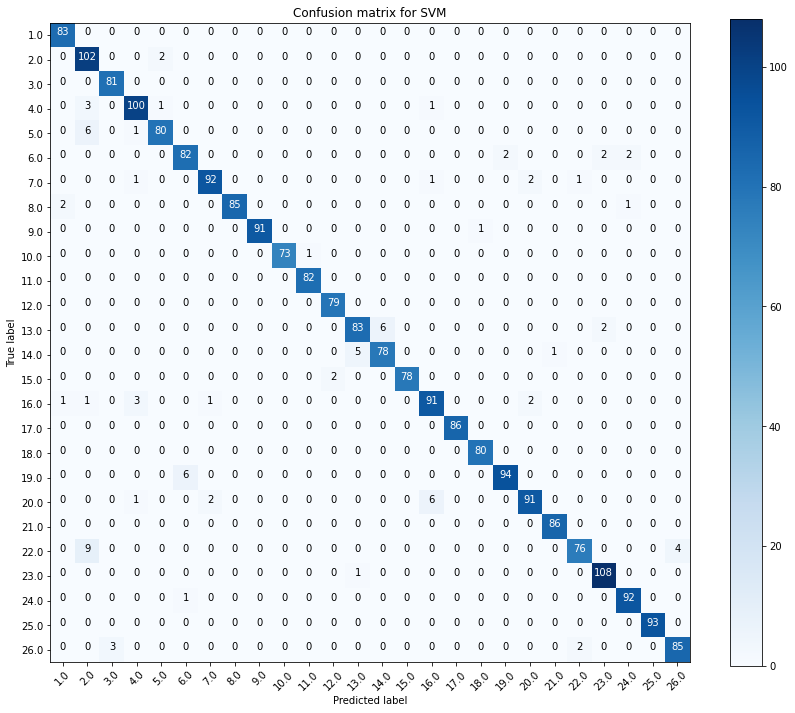

In [ ]:
cm_SVM = confusion_matrix(y_test, predictions['SVM'])
plot_confusion_matrix(cm_SVM, np.unique(y_train), title = 'Confusion matrix for SVM',size = 'big')

In [ ]:
clfs.append('SVM')
f1_micro['SVM'] = f1_score(y_test, predictions['SVM'], average = 'micro')
f1_macro['SVM'] = f1_score(y_test, predictions['SVM'], average = 'macro')
print('SV classifier gave f1 micro score of: ', f1_micro['SVM'], '\n')
print('SV classifier gave f1 macro score of: ', f1_macro['SVM'])

SV classifier gave f1 micro score of:  0.961965811965812 

SV classifier gave f1 macro score of:  0.9632665254822914


#### Bar plot for f1 scores

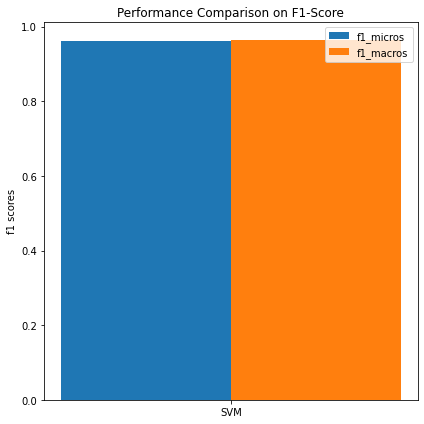

In [ ]:
f1_micro_macro_bar_plot([f1_micro['SVM']], [f1_macro['SVM']], [clfs[8]])

#### Classification report + Analyzing the results

In [ ]:
print('Classification report of SV classifier is:\n')
print(classification_report(y_test, predictions['SVM']))

Classification report of SV classifier is:

              precision    recall  f1-score   support

         1.0       0.97      1.00      0.98        83
         2.0       0.84      0.98      0.91       104
         3.0       0.96      1.00      0.98        81
         4.0       0.94      0.95      0.95       105
         5.0       0.96      0.92      0.94        87
         6.0       0.92      0.93      0.93        88
         7.0       0.97      0.95      0.96        97
         8.0       1.00      0.97      0.98        88
         9.0       1.00      0.99      0.99        92
        10.0       1.00      0.99      0.99        74
        11.0       0.99      1.00      0.99        82
        12.0       0.98      1.00      0.99        79
        13.0       0.93      0.91      0.92        91
        14.0       0.93      0.93      0.93        84
        15.0       1.00      0.97      0.99        80
        16.0       0.92      0.92      0.92        99
        17.0       1.00      1.00    

### Summarization

Ο SVM που ελέγξαμε και παραπάνω δίνει το μεγαλύτερο accuracy από όλους τους classifiers που ελέγθηκαν στο baseline classification. 

Γενικά αυτό που παρατηρούμε σε σχέση με το μικρό dataset είναι ότι όσον αφορά το $f_1\ micro, f_1\ macro$ το $f_1\ macro$ είναι κατά λίγο μεγαλύτερο για όλους τους ταξινομητές. Όπως έχουμε αναλύσει το f1 macro κοιτάει ξεχωριστά κάθε κλάση και βγάζει τον μέσο όρο για την κάθε μια και ύστερα βρίσκει τον μέσο όρο αυτών. Αντίθετα το f1 micro υπολογίζει τον γενικό μέσο όρο. Επομένως αφού οι ταξινομητές μας τα πάνε πολύ καλά σχεδόν για όλες τις κλάσεις είναι λογικό το $f_1\ macro$ να είναι κατά λίγο μεγαλύτερο.

Παρακάτω φαίνονται τα bar plots για το $score$ και για τα $f_1\ micro, f_1\ macro$ των baseline classifier:

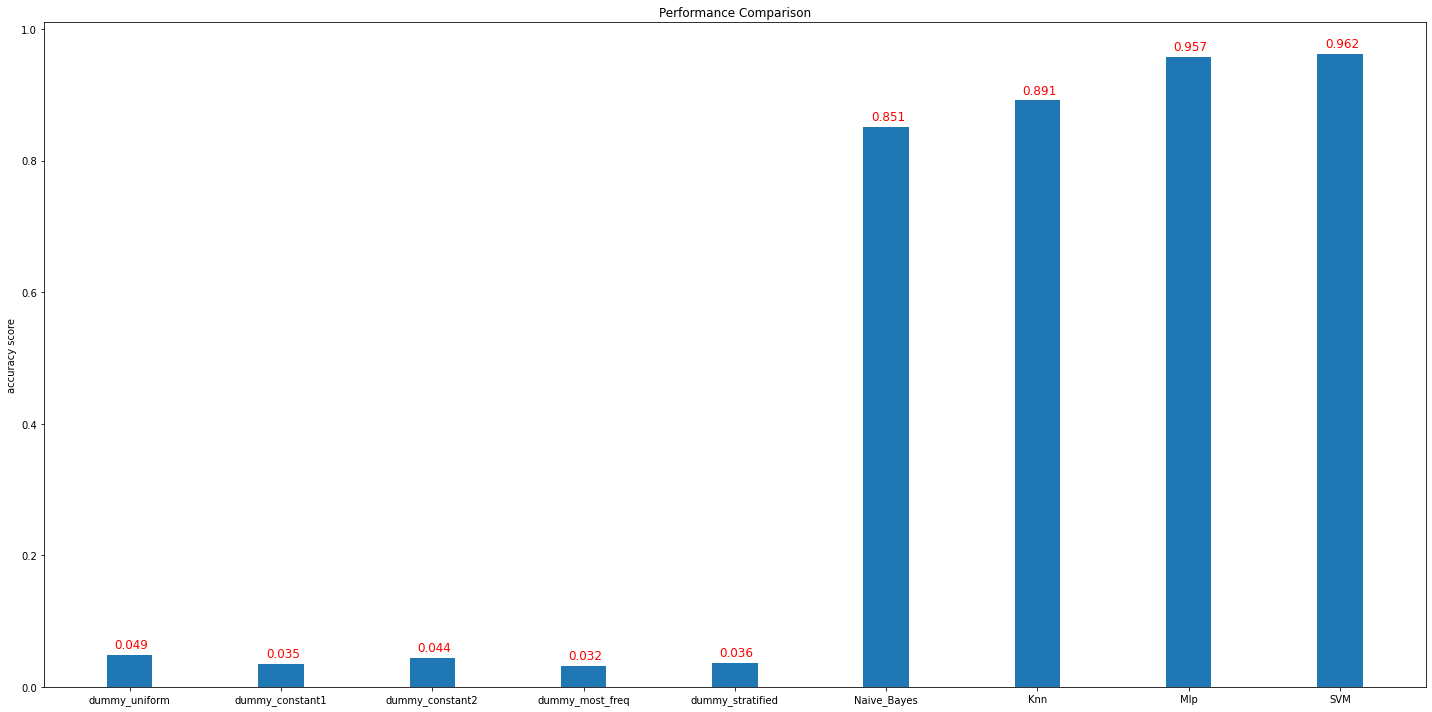

In [ ]:
scores_bar_plot(scores, clfs)

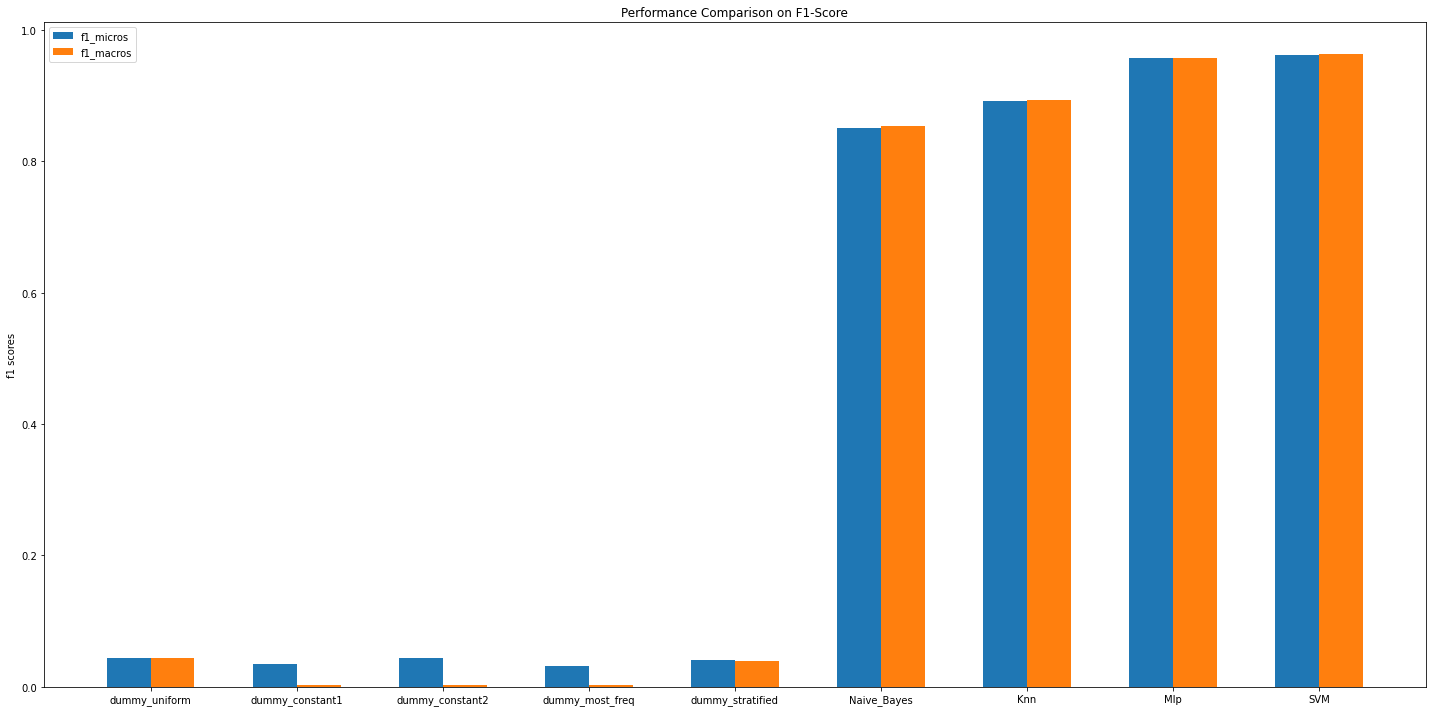

In [ ]:
f1_micro_macro_bar_plot(f1_micro, f1_macro, clfs)

## Optimization of the Classifiers

Για όλους τους classifiers επειδή τα grid search έπαιρναν πολύ χρόνο και το google colab έκανε αρκετές φορές reset κρατήσαμε το αρχικό κόψιμο των train και test set και το αποθηκεύσαμε χρησιμοποιώντας το pickle, ώστε να μπορούμε να κάνουμε δίκαιη αξιολόγηση των ταξινομητών.

Γενικά η διαδικασία για όλους τους classifier στην δομή της είναι ίδια. Πιο συγκεκριμένα:

- Ορίζουμε μία λίστα ή ενα dictionary με τις πιθανές τιμές για όλες τις υπερπαραμέτρους
- Φτίαχνουμε ένα pipeline στο οποίο βάζουμε με την σειρά όλα τα βήματα που πρέπει να εκτελεστούν πχ. variance threshold, pca, classifier
- Ορίζουμε ένα grid search πάνω σε αυτό το pipe για κάθε μετρική που μας ενδιαφέρει 
- Βρίσκουμε και αποθηκεύουμε τον χρόνο για το fit 
- Δείχνουμε τις βέλτιστες τιμές που βρίσκουμε απο το grid search
- Αποθηκεύουμε τα predictions, το score, το f1 micro, το f1 macro και τον χρόνο που χρειάστηκε για να γίνει το prediction.
- Δείχνουμε το score στο test set και τα f1 micro, f1 macro
- Φτιάχνουμε confusion matrix, bar plot για τα f1 
- Δείχνουμε το classification report
- Tέλος για κάθε classifier κατασκευάζουμε τους πίνακες με τα διαδοχικά grid search που κάναμε στους οποίους περιέχονται όλες οι πληροφορίες τόσο για τις παραμέτρους που βάλαμε σε κάθε βήμα όσο και για τα αποτελέσματα που πήραμε

$Disclaimer$ : Σε κάθε κελί που κάνουμε grid search φαίνεται μόνο η τελαυταία φορά που το τρέξαμε. Επομένως για να παρακολουθήσετε όλη την διαδικασία και το πως οδηγηθήκαμε στις συγκεκριμένες τιμές για τις παραμέτρους πρέπει να δείτε τα $history\ tables$.



### Gaussian Naive Bayes


#### Optimization for f1_micro

In [ ]:
threshold = list(np.arange(0.006,0.008,0.0001))
n_components = list(np.arange(132,136,1))
clf = GaussianNB()
pipe = Pipeline(steps=[('selector', selector), ('pca', pca), ('gnb', clf)])
micro_estimator = GridSearchCV(pipe, dict(selector__threshold=threshold, pca__n_components=n_components), cv=5, scoring='f1_micro', n_jobs=-1)
start_time = time.time()
micro_estimator.fit(X_train, y_train)
print(micro_estimator.best_score_)
fitting_time['micro_optimized_gnb'] = time.time() - start_time
print('Fitting and predicting time : ',fitting_time['micro_optimized_gnb'])


0.9276158915938935
Fitting and predicting time :  198.29860186576843


In [ ]:
print(micro_estimator.best_estimator_)
print(micro_estimator.best_params_)

Pipeline(steps=[('selector', VarianceThreshold(threshold=0.006300000000000001)),
                ('pca', PCA(n_components=134)), ('gnb', GaussianNB())])
{'pca__n_components': 134, 'selector__threshold': 0.006300000000000001}


In [ ]:
predictions['micro_optimized_gnb'] = micro_estimator.predict(X_test)
scores['micro_optimized_gnb'] = accuracy_score(y_test, predictions['micro_optimized_gnb'])
f1_micro['micro_optimized_gnb'] = f1_score(y_test, predictions['micro_optimized_gnb'], average='micro')
f1_macro['micro_optimized_gnb'] = f1_score(y_test, predictions['micro_optimized_gnb'], average='macro')
print(f1_micro['micro_optimized_gnb'], f1_macro['micro_optimized_gnb'])
print('Accuracy score found is : ', accuracy_score(y_test, predictions['micro_optimized_gnb']))


0.9235042735042736 0.9255120115471214
Accuracy score found is :  0.9235042735042736


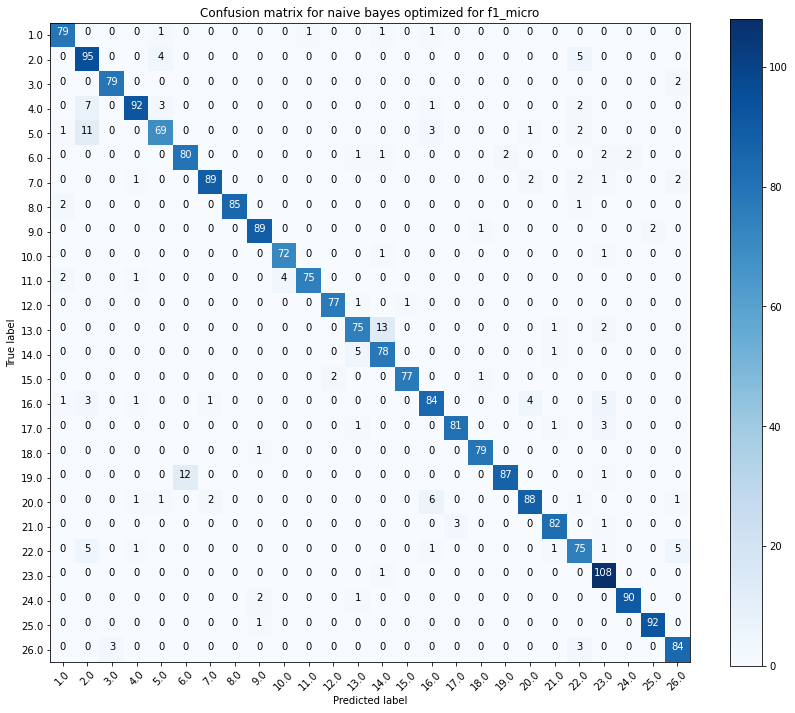

In [ ]:
cm_naive_bayes_opt_micro = confusion_matrix(y_test, predictions['micro_optimized_gnb'])
plot_confusion_matrix(cm_naive_bayes_opt_micro, np.unique(y_train), title = 'Confusion matrix for naive bayes optimized for f1_micro', size = 'big')

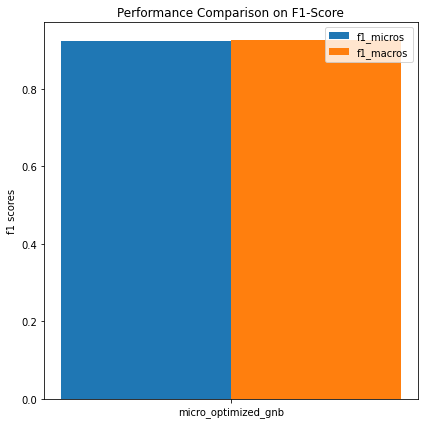

In [ ]:
clfs.append('micro_optimized_gnb')
f1_micro_macro_bar_plot([f1_micro['micro_optimized_gnb']], [f1_macro['micro_optimized_gnb']], [clfs[9]])

In [ ]:
print('Classification report of gnb optimized for f1_micro is:\n')
print(classification_report(y_test, predictions['micro_optimized_gnb']))

Classification report of gnb optimized for f1_micro is:

              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94        83
         2.0       0.79      0.91      0.84       104
         3.0       0.96      0.98      0.97        81
         4.0       0.95      0.88      0.91       105
         5.0       0.88      0.79      0.84        87
         6.0       0.87      0.91      0.89        88
         7.0       0.97      0.92      0.94        97
         8.0       1.00      0.97      0.98        88
         9.0       0.96      0.97      0.96        92
        10.0       0.95      0.97      0.96        74
        11.0       0.99      0.91      0.95        82
        12.0       0.97      0.97      0.97        79
        13.0       0.89      0.82      0.86        91
        14.0       0.82      0.93      0.87        84
        15.0       0.99      0.96      0.97        80
        16.0       0.88      0.85      0.86        99
        17.0       0.96 

#### Optimization for f1_macro

In [ ]:
threshold = list(np.arange(0.029,0.031,0.0001))
n_components = list(np.arange(155,162,1))

pipe = Pipeline(steps=[('selector', selector), ('pca', pca), ('gnb', clf)])
macro_estimator = GridSearchCV(pipe, dict(selector__threshold=threshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=-1)
start_time = time.time()
macro_estimator.fit(X_train, y_train)
print(macro_estimator.best_score_)
fitting_time['macro_optimized_gnb'] = time.time() - start_time
print('Fitting and predicting time : ',fitting_time['macro_optimized_gnb'])

0.9270243889438236
Fitting and predicting time :  372.51466488838196


In [ ]:
print(macro_estimator.best_estimator_)
print(macro_estimator.best_params_)

Pipeline(steps=[('selector', VarianceThreshold(threshold=0.030499999999999992)),
                ('pca', PCA(n_components=160)), ('gnb', GaussianNB())])
{'pca__n_components': 160, 'selector__threshold': 0.030499999999999992}


In [ ]:
predictions['macro_optimized_gnb'] = macro_estimator.predict(X_test)
scores['macro_optimized_gnb'] = accuracy_score(y_test, predictions['macro_optimized_gnb'])
f1_micro['macro_optimized_gnb'] = f1_score(y_test, predictions['macro_optimized_gnb'], average='micro')
f1_macro['macro_optimized_gnb'] = f1_score(y_test, predictions['macro_optimized_gnb'], average='macro')
print(f1_micro['macro_optimized_gnb'], f1_macro['macro_optimized_gnb'])
print('Accuracy score found is : ', accuracy_score(y_test, predictions['macro_optimized_gnb']))


0.9222222222222223 0.9242988534187552
Accuracy score found is :  0.9222222222222223


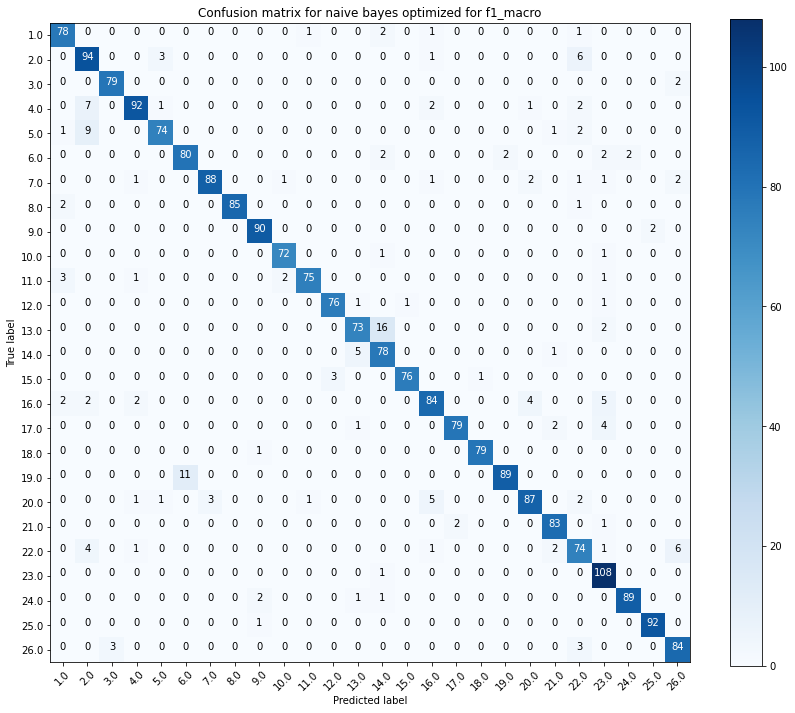

In [ ]:
cm_naive_bayes_opt_macro = confusion_matrix(y_test, predictions['macro_optimized_gnb'])
plot_confusion_matrix(cm_naive_bayes_opt_macro, np.unique(y_train), title = 'Confusion matrix for naive bayes optimized for f1_macro', size = 'big')

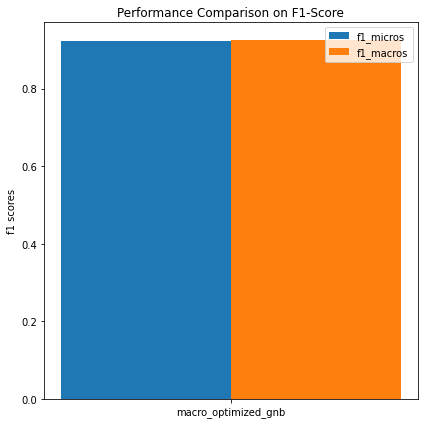

In [ ]:
clfs.append('macro_optimized_gnb')
f1_micro_macro_bar_plot([f1_micro['macro_optimized_gnb']], [f1_macro['macro_optimized_gnb']], [clfs[10]])

In [ ]:
print('Classification report of gnb optimized for f1_macro is:\n')
print(classification_report(y_test, predictions['macro_optimized_gnb']))

Classification report of gnb optimized for f1_macro is:

              precision    recall  f1-score   support

         1.0       0.91      0.94      0.92        83
         2.0       0.81      0.90      0.85       104
         3.0       0.96      0.98      0.97        81
         4.0       0.94      0.88      0.91       105
         5.0       0.94      0.85      0.89        87
         6.0       0.88      0.91      0.89        88
         7.0       0.97      0.91      0.94        97
         8.0       1.00      0.97      0.98        88
         9.0       0.96      0.98      0.97        92
        10.0       0.96      0.97      0.97        74
        11.0       0.97      0.91      0.94        82
        12.0       0.96      0.96      0.96        79
        13.0       0.90      0.80      0.85        91
        14.0       0.77      0.93      0.84        84
        15.0       0.99      0.95      0.97        80
        16.0       0.88      0.85      0.87        99
        17.0       0.98 

#### History table for gnb tuning + Result analysis

$$$$
Για τον gaussian naive bayes καθώς και για όλους τους classifiers δεν χρησιμοποιούμε scaler καθώς παρατηρούμε τόσο από το ίδιο το dataset αλλά και  όσο από το description του, πως είναι ήδη scaled.Για να εξετάσουμε πολλούς συνδυασμούς παραμέτρων, εξετάζουμε τις περιπτώσεις στις οποίες υπάρχει Variance Threshold και PCA ταυτόχρονα , αλλά και μόνο με PCA καταγράφοντας τις μετρήσεις μας σε πινακάκια. Το κάθε πινακάκι θα δείχνει κάθε φορά τις παραμέτρους που δίνουμε στο grid search καθώς και το score που αυτό μας γυρίζει για τις καλύτερες εξ' αυτών των παραμέτρων. Παρακάτω φαίνονται οι πίνακες για τα 2 pipes που κατασκευάσαμε για την μετρική:
$$$$
 $$f_1\ micro$$

$$Disclaimer :$$ H μορφή των δεδομένων που εισάγονται στο pipe θα παρασουσιαστούν ως μία λίστα όπου θα ισχύει:
$$[start, stop, step] : με\ το\ stop\ να\ μην\ περιέχεται\ στις\ τιμές\ που\ θα\ ψάξουμε$$
$$$$

> $$ Pipe1 (micro) : variance\ threshold -> pca -> GaussianNB $$
>$$$$
>
>$Steps$ | $threshold$ | $pca$ | $fitting\ time$ | $score$ | $best\ parameters$
>--- | --- | --- | --- | --- | --- |
> $$1$$ | [0, 1, 0.1] | [0, 350, 50] | 72.438 | $$0.9241$$ | $$\{0,150\}$$
>$$2$$ | [0, 0.1, 0.01] | [100, 200, 10] | 304.147 | $$0.9261$$ | $$\{0.01,140\}$$
>$$3$$ | [0, 0.02, 0.001] | [130, 150, 2] | 505.5585 | $$0.9283$$ | $$\{0.007,134\}$$
>$$4$$ | [0.006, 0.008, 0.0001] | [132, 136, 1] | 199.14 | $$0.9283$$ | $$\{0.007,135\}$$


Παρατηρούμε ότι δεν μπορούμε να αυξήσουμε άλλο την απόδοση του classifier και επομένως σταματάμε στο βήμα 4 το οποίος μας γυρίζει:
$$$$
$$ pca\ components = 135\ και\ variance\ threshold = 0.007\ δίνοντας\ score\ στο\ train :$$$$ score = 0.9283$$


> $$ Pipe2 (micro) : pca ->  GaussianNB $$
>$$$$
>
>$Steps$ | $pca$ |  $fitting\ time$ | $score$ | $best\ parameters$
>--- | --- | --- | --- |  --- |
> $$1$$ | [0, 350, 50] |  22.98 | $$0.9232$$ | $$\{100\}$$
>$$2$$ | [50, 150, 10] |  20.114 | $$0.9265$$ | $$\{140\}$$
>$$3$$ | [130, 150, 1] |  48.93 | $$0.9255$$ | $$\{149\}$$

Απ' ότι φαίνεται δεν μπορούμε να βελτίωσουμε περισσότερο τον ταξινομητή χρησιμοποιώντας μόνο την τεχνική του PCA και επομένως θα κρατήσουμε το:

$$Pipe1$$

Eκτελώντας την predict μέθοδο στο test set πλέον παίρνουμε ότι η απόδοση μας στο test set για micro optimization του GaussianNB είναι:

$$score = 0.9239$$

Παρατηρούμε αρκετά μεγάλη άνοδο στην μετρική $f1\_micro$, καθώς από 0,8512 ανέβηκε στην τιμη 0,9239.

Έχοντας τα αποτελέσμα για την παραμετρικοποιήση για βελτιστοποίηση του $f_1\ micro$ θα εργαστούμε αναλόγως για να βρούμε τις καλύτερες παραμέτρους για την μεγιστοποίση του $f_1\ macro:$


> $$ Pipe1 (macro) : variance\ threshold ->pca -> GaussianNB $$
>$$$$
>
>$Steps$ | $threshold$ | $pca$ | $fitting\ time$ | $score$ | $best\ parameters$
>--- | --- | --- | --- | --- | --- |
> $$1$$ | [0, 1, 0.1] | [0, 350, 50] | 60.085 | $$0.9236$$ | $$\{0, 150\}$$
>$$2$$ | [0, 0.1, 0.01] | [100, 200, 10] | 263.22 | $$0.9255$$ | $$\{0.04, 170\}$$
>$$3$$ | [0.03, 0.05, 0.001] | [160, 180, 2] | 689.59 | $$0.9270$$ | $$\{0.03,160\}$$
>$$4$$ | [0.029, 0.031, 0.0001] | [155, 162, 1] | 372.51 | $$0.9270$$ | $$\{0.0304, 160\}$$


Παρατηρούμε ότι δεν μπορούμε να αυξήσουμε άλλο την απόδοση του classifier και επομένως σταματάμε στο βήμα 4 το οποίος μας γυρίζει:
$$$$
$$ pca\ components = 160\ και\ variance\ threshold = 0.0304\ δίνοντας\ score\ στο\ train :$$$$ score = 0.9270$$


> $$ Pipe2 (macro) : pca ->  GaussianNB $$
>$$$$
>
>$Steps$ | $pca$ |  $fitting\ time$ | $score$ | $best\ parameters$
>--- | --- | --- | --- |  --- |
> $$1$$ | [0, 360, 20] |  57.12 | $$0.9226$$ | $$\{180\}$$
>$$2$$ | [160, 200, 10] |  13.093 | $$0.9237$$ | $$\{180\}$$
>$$3$$ | [170, 190, 1] |  59.75 | $$0.9240$$ | $$\{177\}$$


Απ' ότι φαίνεται δεν μπορούμε να βελτίωσουμε περισσότερο τον ταξινομητή χρησιμοποιώντας μόνο το variance threshold και επομένως θα κρατήσουμε το:

$$Pipe1$$


Eκτελώντας την predict μέθοδο στο test set πλέον παίρνουμε ότι η απόδοση μας στο test set για micro optimization του GaussianNB είναι:

$$score = 0.9242$$

Παρ' ότι αφελής ο συγκεκριμένος ταξινομητής με τις κατάλληλες τεχνικές προεπεξεργασίας αυξάνει όπως φαίνεται παραπάνω δραματικά την απόδοση του.


### KNN


#### Knn parameters

Θα ξεκινήσουμε την ανάλυση του kNN εξηγώντας συνοπτικά την λειτουργία των υπερπαραμέτρων πάνω στις οποίες θα κάνουμε tuning.

>- $n\_neighbors$ :
>
  >   Είναι ο αριθμός των γειτόνων βάσει των οποίων αποφασίζεται σε ποια κλάση θα κατηγοριοποιηθεί ένα δείγμα

>- $metric$:
>
  >   Αφορά τον τρόπο υπολογισμού των γειτόνων. Οι διαθέσιμες συναρτήσεις για τον υπολογισμό της απόστασης είναι οι εξής:  
  >    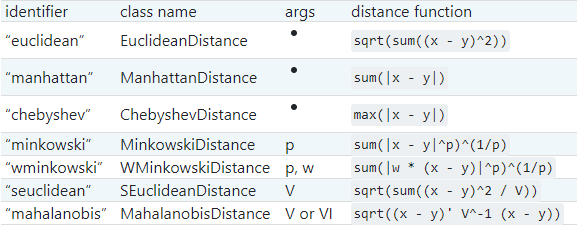

>- $weight$:
>
  >   Το βάρος μπορεί να είναι είτε uniform κατά το οποίο όλοι οι γείτονες επηρεάζουν το ίδιο άσχετα με το ποιοι είναι πιο κοντά στο δείγμα, είτε distance όπου οι γείτονες που είναι πιο κοντά στο δείγμα έχουν μεγαλύτερο βάρος όσον αφορά την κατηγοριοποίηση του δείγματος

#### Optimization for f1_micro


In [ ]:
threshold = [0.0247,0.0248,0.0249]   # we dont use np.arange here, instead we use a simple list because running time would be much more
n_components = [91,92,93]
n_neighbors = [15,17,19]
distance = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
weights = ['uniform', 'distance']
clf = KNeighborsClassifier()

pipe = Pipeline(steps=[('selector', selector), ('pca', pca), ('knn', clf)], memory='tmp')
micro_estimator = GridSearchCV(pipe, dict(selector__threshold=threshold, pca__n_components=n_components, knn__n_neighbors=n_neighbors, knn__metric=distance, knn__weights=weights), cv=5, scoring='f1_micro', n_jobs=-1)
start_time = time.time()
micro_estimator.fit(X_train, y_train)
print(micro_estimator.best_score_)
fitting_time['micro_optimized_kNN'] = time.time() - start_time
print('Fitting time : ',fitting_time['micro_optimized_kNN'])

0.9083738748266704
Fitting time :  711.803539276123


In [ ]:
print(micro_estimator.best_estimator_)
print(micro_estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.0247)),
                ('pca', PCA(n_components=92)),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_jobs=-1,
                                      n_neighbors=17, weights='distance'))])
{'knn__metric': 'manhattan', 'knn__n_neighbors': 17, 'knn__weights': 'distance', 'pca__n_components': 92, 'selector__threshold': 0.0247}


In [ ]:
predicting_time = {}
start_time = time.time()
predictions['micro_optimized_kNN'] = micro_estimator.predict(X_test)
predicting_time['kNN_micro_optimized'] = time.time() - start_time 
print('predicting time needed for kNN micro optimized is:',predicting_time['kNN_micro_optimized'] )

scores['micro_optimized_kNN'] = accuracy_score(y_test, predictions['micro_optimized_kNN'])
f1_micro['micro_optimized_kNN'] = f1_score(y_test, predictions['micro_optimized_kNN'], average='micro')
f1_macro['micro_optimized_kNN'] = f1_score(y_test, predictions['micro_optimized_kNN'], average='macro')
print(f1_micro['micro_optimized_kNN'], f1_macro['micro_optimized_kNN'])
print('Accuracy score found is : ', accuracy_score(y_test, predictions['micro_optimized_kNN']))


predicting time needed for kNN micro optimized is: 2.069650650024414
0.9179487179487179 0.9189887257649142
Accuracy score found is :  0.9179487179487179


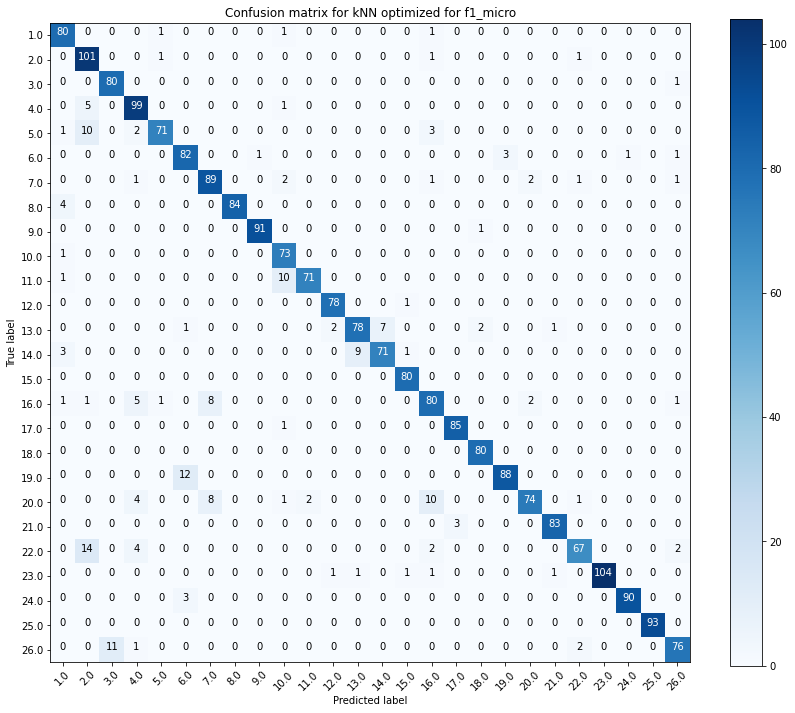

In [ ]:
cm_kNN_opt_micro = confusion_matrix(y_test, predictions['micro_optimized_kNN'])
plot_confusion_matrix(cm_kNN_opt_micro, np.unique(y_train), title = 'Confusion matrix for kNN optimized for f1_micro', size = 'big')

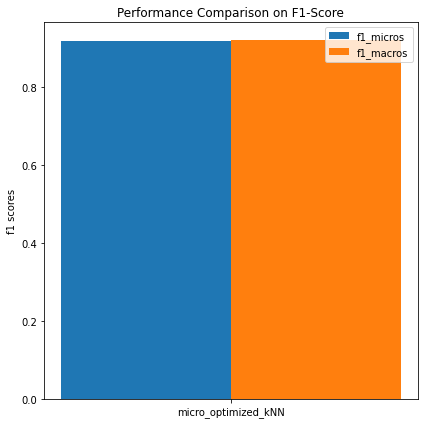

In [ ]:
clfs.append('micro_optimized_kNN')
f1_micro_macro_bar_plot([f1_micro['micro_optimized_kNN']], [f1_macro['micro_optimized_kNN']], ['micro_optimized_kNN'])

In [ ]:
print('Classification report of kNN optimized for f1_micro is:\n')
print(classification_report(y_test, predictions['micro_optimized_kNN']))

Classification report of kNN optimized for f1_micro is:

              precision    recall  f1-score   support

         1.0       0.88      0.96      0.92        83
         2.0       0.77      0.97      0.86       104
         3.0       0.88      0.99      0.93        81
         4.0       0.85      0.94      0.90       105
         5.0       0.96      0.82      0.88        87
         6.0       0.84      0.93      0.88        88
         7.0       0.85      0.92      0.88        97
         8.0       1.00      0.95      0.98        88
         9.0       0.99      0.99      0.99        92
        10.0       0.82      0.99      0.90        74
        11.0       0.97      0.87      0.92        82
        12.0       0.96      0.99      0.97        79
        13.0       0.89      0.86      0.87        91
        14.0       0.91      0.85      0.88        84
        15.0       0.96      1.00      0.98        80
        16.0       0.81      0.81      0.81        99
        17.0       0.97 

#### Optimization for f1_macro





In [ ]:
threshold = [0.04,0.05,0.06]
n_components = [88,90,92]
n_neighbors = [17,19,21]
distance = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
weights = ['uniform', 'distance']

pipe = Pipeline(steps=[('selector', selector), ('pca', pca), ('knn', clf)], memory='tmp')
macro_estimator =  GridSearchCV(pipe, dict(selector__threshold=threshold, pca__n_components=n_components, knn__n_neighbors=n_neighbors, knn__metric=distance, knn__weights=weights), cv=5, scoring='f1_macro', n_jobs=-1)
start_time = time.time()
macro_estimator.fit(X_train, y_train)
print(macro_estimator.best_score_)
fitting_time['macro_optimized_kNN'] = time.time() - start_time
print('Fitting time : ',fitting_time['macro_optimized_kNN'])

0.9079253026349455
Fitting time :  711.128484249115


In [ ]:
print(macro_estimator.best_estimator_)
print(macro_estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.05)),
                ('pca', PCA(n_components=90)),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_jobs=-1,
                                      n_neighbors=19, weights='distance'))])
{'knn__metric': 'manhattan', 'knn__n_neighbors': 19, 'knn__weights': 'distance', 'pca__n_components': 90, 'selector__threshold': 0.05}


In [ ]:
start_time = time.time()
predictions['macro_optimized_kNN'] = macro_estimator.predict(X_test)
predicting_time['kNN_macro_optimized'] = time.time() - start_time 
print('predicting time needed for kNN macro optimized is:',predicting_time['kNN_macro_optimized'] )
scores['macro_optimized_kNN'] = accuracy_score(y_test, predictions['macro_optimized_kNN'])
f1_micro['macro_optimized_kNN'] = f1_score(y_test, predictions['macro_optimized_kNN'], average='micro')
f1_macro['macro_optimized_kNN'] = f1_score(y_test, predictions['macro_optimized_kNN'], average='macro')
print(f1_micro['macro_optimized_kNN'], f1_macro['macro_optimized_kNN'])
print('Accuracy score found is : ', accuracy_score(y_test, predictions['macro_optimized_kNN']))


predicting time needed for kNN macro optimized is: 2.258981466293335
0.9192307692307692 0.9202543155273699
Accuracy score found is :  0.9192307692307692


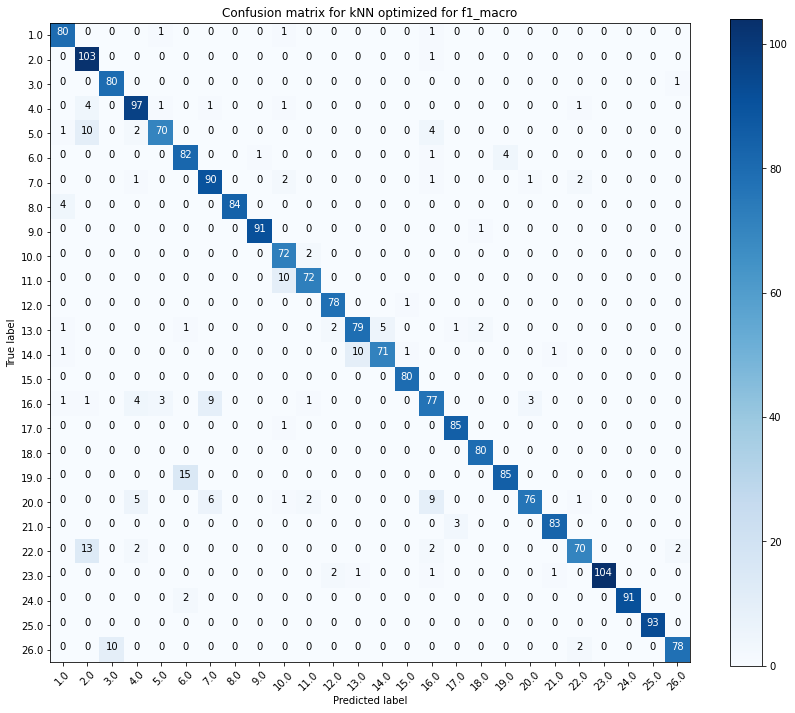

In [ ]:
cm_kNN_opt_macro = confusion_matrix(y_test, predictions['macro_optimized_kNN'])
plot_confusion_matrix(cm_kNN_opt_macro, np.unique(y_train), title = 'Confusion matrix for kNN optimized for f1_macro', size = 'big')

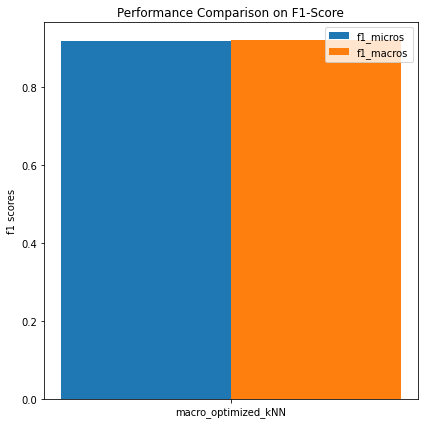

In [ ]:
clfs.append('macro_optimized_kNN')
f1_micro_macro_bar_plot([f1_micro['macro_optimized_kNN']], [f1_macro['macro_optimized_kNN']], ['macro_optimized_kNN'])

In [ ]:
print('Classification report of kNN optimized for f1_macro is:\n')
print(classification_report(y_test, predictions['macro_optimized_kNN']))

Classification report of kNN optimized for f1_macro is:

              precision    recall  f1-score   support

         1.0       0.91      0.96      0.94        83
         2.0       0.79      0.99      0.88       104
         3.0       0.89      0.99      0.94        81
         4.0       0.87      0.92      0.90       105
         5.0       0.93      0.80      0.86        87
         6.0       0.82      0.93      0.87        88
         7.0       0.85      0.93      0.89        97
         8.0       1.00      0.95      0.98        88
         9.0       0.99      0.99      0.99        92
        10.0       0.82      0.97      0.89        74
        11.0       0.94      0.88      0.91        82
        12.0       0.95      0.99      0.97        79
        13.0       0.88      0.87      0.87        91
        14.0       0.93      0.85      0.89        84
        15.0       0.98      1.00      0.99        80
        16.0       0.79      0.78      0.79        99
        17.0       0.96 

#### History table for knn tuning + Result analysis

$$$$
Για τον kNN κρίνοντας απο την προηγούμενη περίπτωση και απο το γεγονός ότι η μείωση της διαστατικότητας μπορεί να βοηθήσει αρκέτα τον kNN θα χρησιμοποιήσουμε και PCA. Επίσης θα χρησιμοποιήσουμε variance threshold. H μορφή που θα έχουν τα πινακάκια θα είναι όμοια με την προηγούμενη με την μόνη διαφορά ότι θα έχουμε μία παραπάνω στήλη για την υπερπαράμετρο k του kNN. Παρακάτω φαίνονται o πίνακας για το  pipe που κατασκευάσαμε για την μετρική:
$$$$
 $$f_1\ micro$$

$$Disclaimer :$$ H μορφή των δεδομένων που εισάγονται στο pipe θα παρασουσιαστούν ως μία λίστα 
$$$$

> $$ Pipe1 (micro) : variance\ threshold -> pca -> kNN $$
>$$$$
>
>$Steps$ | $threshold$ | $pca$ |$ n\ neighbors$| $metric$ | $weight$ | $fitting\ time$ | $score$ | $best\ parameters$
>--- | --- | --- | --- | --- | --- |--- | --- | --- |
> $$1$$ | [0,01, 0.02, 0.03] | [100, 200, 300, 400, 500] | [3,7,11,15,19] | 'euclidean', 'manhattan', 'chebyshev', 'minkowski' | 'uniform', 'distance' | 5482.473 | $$0.907$$ | $$\{0.03,100,19,manhattan,distance\}$$
> $$2$$ | [0,02 0.03, 0.04] | [90, 95, 100] | [15,17,19] | 'euclidean', 'manhattan', 'chebyshev', 'minkowski' | 'uniform', 'distance' | 761.074 | $$0.901$$ | $$\{0.03,90,15,manhattan,distance\}$$
>$$3$$ | [0.025, 0.028, 0.035] | [88, 90, 92] | [13,15,17] | 'euclidean', 'manhattan', 'chebyshev', 'minkowski' | 'uniform', 'distance' | 718.67 | $$0.9083$$ | $$\{0.025,92,17,manhattan,distance\}$$
>$$4$$ | [0.025, 0.026, 0.027] | [91, 92, 93] | [15,17,19] | 'euclidean', 'manhattan', 'chebyshev', 'minkowski' | 'uniform', 'distance' | 731.25 | $$0.9083$$ | $$\{0.025,92,17,manhattan,distance\}$$
>$$5$$ | [0,023, 0.024, 0.025] | [91, 92, 93] |[15,17,19] | 'euclidean', 'manhattan', 'chebyshev', 'minkowski' | 'uniform', 'distance' | 711.803 | $$0.9083$$ | $$\{0.0247,92,17,manhattan,distance\}$$


Παρατηρούμε ότι δεν μπορούμε να αυξήσουμε άλλο την απόδοση του classifier και επομένως σταματάμε στο βήμα 5 το οποίος μας γυρίζει:
$$$$
$$ pca\ components = 92\ ,  variance\ threshold = 0.0247\ , neighbors = 17\ , metric = manhattan\ , weight = distance \  δίνοντας\ score\ στο\ train :$$$$
$$$$score = 0.9083$$

> $$ Pipe2 (micro) : pca ->  kNN $$
>$$$$
>
>$Steps$ | $pca$ |$ n\ neighbors$| $metric$ | $weight$ |$fitting\ time$ | $score$ | $best\ parameters$
>--- | --- | --- | --- | --- |--- | --- | --- |
> $$1$$| [80, 100, 120] | [15,17,19] |  'euclidean', 'manhattan', 'chebyshev', 'minkowski' | 'uniform', 'distance' | 252.98 | $$0.9079$$ | $$\{100,15,manhattan,distance\}$$
>$$2$$ | [90, 100, 110] | [13,15,17,19] |  'euclidean', 'manhattan', 'chebyshev', 'minkowski' | 'uniform', 'distance' | 252.96 | $$0.9081$$ | $$\{90,19,manhattan,distance\}$$
>$$3$$ | [85, 88, 92, 95] | [15,17,19,21] |  'euclidean', 'manhattan', 'chebyshev', 'minkowski' | 'uniform', 'distance' | 309.79 | $$0.9082$$ | $$\{95,21,manhattan,distance\}$$
>$$4$$ | [94, 95, 96, 97] |[15,17,19,21,23] |  'euclidean', 'manhattan', 'chebyshev', 'minkowski' | 'uniform', 'distance' | 412.261 | $$0.9082$$ | $$\{95,21,manhattan,distance\}$$

Απ' ότι φαίνεται δεν μπορούμε να βελτίωσουμε περισσότερο τον ταξινομητή και επομένως θα κρατήσουμε το:

$$Pipe1$$

Eκτελώντας την predict μέθοδο στο test set πλέον παίρνουμε ότι η απόδοση μας στο test set για micro optimization του GaussianNB είναι:

$$score = 0.9179$$


Παρατηρούμε ότι πριν το optimization είχαμε score 0,8914 ενώ μετά το optimization εχουμε 0,9179.Όπως εξηγήσαμε και στο Small Dataset,ο kNN όπως είναι λογικό, επηρεάζεται αρκετά από την παράμετρο $n\_neighbors$ καθώς ο kNN classifier έχει high variance και low bias γεγονός το οποίο αλλάζει καθώς αυξάνουμε την τιμή των γειτόνων με αποτέλεσμα να αυξάνουμε σταδιακά το bias και να ρίχνουμε το variance.

Έχοντας τα αποτελέσμα για την παραμετρικοποιήση και βελτιστοποίηση του $f_1\ micro$, εργαζόμαστε παρομοίως για να βρούμε τις καλύτερες παραμέτρους για την μεγιστοποίση του $f_1\ macro:$


> $$ Pipe1 (macro) :variance\ threshold -> pca -> kNN $$
>$$$$
>
>$Steps$ | $threshold$ | $pca$ |$ n\ neighbors$| $metric$ | $weight$ | $fitting\ time$ | $score$ | $best\ parameters$
>--- | --- | --- | --- | --- | --- |--- | --- | --- |
> $$1$$ | [0,1, 0.2, 0.3] | [80, 100, 120] | [15,19,23] | 'euclidean', 'manhattan', 'chebyshev', 'minkowski' | 'uniform', 'distance' | 563.953 | $$0.8980$$ | $$\{0.1,100,19,manhattan,distance\}$$
>$$2$$ | [0.05, 0.08, 0.12] | [90, 95, 105, 110] | [17,19,21] | 'euclidean', 'manhattan', 'chebyshev', 'minkowski' | 'uniform', 'distance' | 1029.27 | $$0.9063$$ | $$\{0.05,90,19,manhattan,distance\}$$
>$$3$$ | [0.04, 0.05, 0.06] | [88, 90, 92] | [17,19,21] | 'euclidean', 'manhattan', 'chebyshev', 'minkowski' | 'uniform', 'distance' | 711.12 | $$0.9079$$ | $$\{0.05,90,19,manhattan,distance\}$$



Παρατηρούμε ότι δεν μπορούμε να αυξήσουμε άλλο την απόδοση του classifier και επομένως σταματάμε στο βήμα 6 το οποίος μας γυρίζει:
$$$$
$$ pca\ components = 90\ ,  variance\ threshold = 0.05\ και\ neighbors = 19\ , metric = manhattan\ , weight = distance \  δίνοντας\ score\ στο\ train :$$$$
$$$$score = 0.9083$$

> $$ Pipe2 (macro) : pca ->  kNN $$
>$$$$
>
>$Steps$ | $pca$ |$ n\ neighbors$| $metric$ | $weight$ |$fitting\ time$ | $score$ | $best\ parameters$
>--- | --- | --- | --- | --- |--- | --- | --- |
> $$1$$| [80, 100, 120] | [15,17,19] |  'euclidean', 'manhattan', 'chebyshev', 'minkowski' | 'uniform', 'distance' | 153.34 | $$0.9056$$ | $$\{120,19,manhattan,distance\}$$
>$$2$$ | [110, 120, 125, 130] | [17,19,21,23] |  'euclidean', 'manhattan', 'chebyshev', 'minkowski' | 'uniform', 'distance' | 326.614 | $$0.9064$$ | $$\{110,23,manhattan,distance\}$$
>$$3$$ | [90, 95, 105] | [19,21,23,25] |  'euclidean', 'manhattan', 'chebyshev', 'minkowski' | 'uniform', 'distance' | 206.048 | $$0.9051$$ | $$\{95,21,manhattan,distance\}$$
>$$4$$ | [94, 95, 98] |[19,21,23,25] |  'euclidean', 'manhattan', 'chebyshev', 'minkowski' | 'uniform', 'distance' | 204.346 | $$0.9078$$ | $$\{98,25,manhattan,distance\}$$





Eκτελώντας την predict μέθοδο στο test set πλέον παίρνουμε ότι η απόδοση μας στο test set για macro optimization του kNN είναι:

$$score = 0.9202$$



### MLP

#### MLP parameters

Ο MLP έχει 18 υπερπαραμέτρους από τις οποίες βελτιστοποιήσαμε τις προβλέψεις του μοντέλου μας ως προς τις εξής: 

>-    $hidden\_layer\_sizes$ : 
>
  >   Χρησιμοποιείται για να ορίσουμε τον αριθμό των νευρώνων κάθε κρυφού επιπέδου αλλά και τον αριθμό των επιπέδων. 

>-    $activation$ : 
>
  >   Oρίζει την συνάρτηση ενεργοποίσης του hidden layer. Οι συναρτήσεις που δίνονται απο την sklearn είναι οι εξής:
  >   - $identity$ : 
  >       
      >       $ f(x) = x $ 
  >   - $logistic$ : 
  >       
      >       $ f(x) = \frac{1}{1 + e^{-x}} : logistic\ sigmoid\ function $
  >   - $tanh$ : 
  >       
      >       $ f(x) = tanh(x) : hyperbolic\ tan\ function$
  >   - $relu$ : 
  >       
      >       $ f(x) = max(0,x) : rectified\ linear\ unit\ function $ 

>-    $solver$:
>
  >   Ο solver χρησιμοποιείται για την βελτιστοποίση των βαρών w των νευρώνων.
  >   Οι επιλογές που δίνονται απο την sklearn είναι:
  >   -   $lbfgs$: 
  >       
      >       Χρησιμοποιεί μεθόδους Quasi-Newton. Υπερισχύει συνήθως σε μικρά datasets         
  >   -   $sgd$:
  >       
      >       Stochastic gradient descent
  >   -   $adam$: 
  >       
      >       [Μέθοδος adam](https://arxiv.org/pdf/1412.6980.pdf). Υπερισχύει συνήθως σε μεγάλα dataset

>-    $alpha$:
>       
      >       Πρόκειται για τον όρο κανονικοποίησης. Όσο μεγαλώνει η τιμή του alpha τόσο πιο ελαστική γινεται η περιοχη και δηλαδή βοηθάει στην καταπολέμηση του high variance ενώ όσο πιο μικρό γίνεται η περιοχή στενεύει και έτσι καταπολέμείται  το high bias. Η παρακάτω φωτογραφία δείχνει την επίδραση του alpha ανάλογα με την τιμή που έχει:
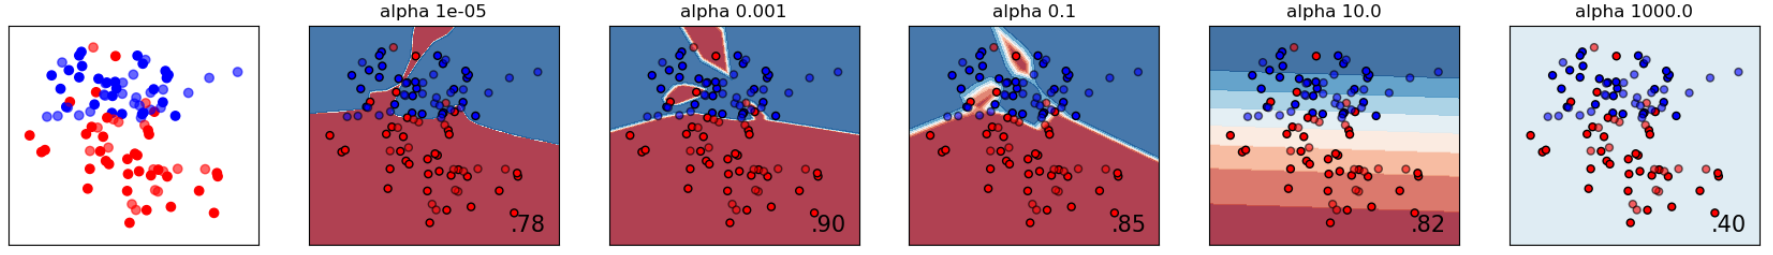

>-    $learning\_rate$:
>
  >   Kαθορίζει το κάθε πόσο θα γίνονται update τα weights. Οι συναρτήσεις που μπορούν να χρησιμοποιηθούν απο την sklearn είναι οι εξής:
  >   - $constant$:
  >       
      >       Ο ρυθμός εξαρτάται μόνο απο την παράμετρο learning\_rate\_init και είναι σταθερός
  >   - $invscaling$:
  >       
      >       O ρυθμός μειώνεται σταδιακά σε κάθε time step
  >   - $adaptive$:
  >       
      >       Κρατάει στον ρυθμό ίσο με τον αρχικό όσο το training loss συνεχίζει να μειώνεται. Αν μετά απο 2 συνεχόμενες εποχές δεν έχουμε μειώσει το training loss κατά tol τότε διαιρεί το αρχικό learing_rate κατά 5.      

>-   $ max\_iter$ : 
>
  >   Oρίζει τον μέγιστο αριθμό απο επαναλήψεις. Ο solver συνεχίζει μέχρι είτε μέχρι να επιτευχθεί το tol είτε ο αριθμός των επαναλήψεων που καθορίζεται απο αυτή τη παράμετρο

#### Optimization for f1_micro

In [ ]:
clf = MLPClassifier()
parameter_space = {      #from now on the parameter_space grows so we create the dictionary here and not in the grid search 
    'mlpc__hidden_layer_sizes': [(100,)],
    'mlpc__activation': ['tanh', 'relu', 'logistic'],
    'mlpc__solver': ['adam', 'sgd'],
    'mlpc__alpha': [0.0001, 0.001],
    'mlpc__learning_rate': ['invscaling'],
    'mlpc__max_iter':[500,600,700, 800]
}

pipe = Pipeline(steps=[('mlpc', clf)], memory = 'tmp')
MLPC_micro_estimator = GridSearchCV(pipe, parameter_space, scoring='f1_micro', cv=5, n_jobs=-1)
start_time = time.time()
MLPC_micro_estimator.fit(X_train, y_train)
print(MLPC_micro_estimator.best_score_)
fitting_time['MLPC_micro_optimized'] = time.time() - start_time
print('Fitting time : ',fitting_time['MLPC_micro_optimized'])
print('The best parameters found for MLPC for f1_micro are : ', MLPC_micro_estimator.best_params_)
print(MLPC_micro_estimator.best_estimator_)

0.963166836219082
Fitting time :  5859.4092972278595
The best parameters found for MLPC for f1_micro are :  {'mlpc__activation': 'logistic', 'mlpc__alpha': 0.001, 'mlpc__hidden_layer_sizes': (100,), 'mlpc__learning_rate': 'invscaling', 'mlpc__max_iter': 600, 'mlpc__solver': 'adam'}
Pipeline(memory='tmp',
         steps=[('mlpc',
                 MLPClassifier(activation='logistic', alpha=0.001,
                               learning_rate='invscaling', max_iter=600))])


In [ ]:
start_time = time.time()
predictions['MLPC_micro_optimized'] = MLPC_micro_estimator.predict(X_test)
predicting_time['MLPC_micro_optimized'] = time.time() - start_time
print('Predicting time needed for MLPC micro optimized is : ', predicting_time['MLPC_micro_optimized'])
scores['MLPC_micro_optimized'] = accuracy_score(y_test, predictions['MLPC_micro_optimized'])
f1_micro['MLPC_micro_optimized'] = f1_score(y_test, predictions['MLPC_micro_optimized'], average='micro')
f1_macro['MLPC_micro_optimized'] = f1_score(y_test, predictions['MLPC_micro_optimized'], average='macro')
print(f1_micro['MLPC_micro_optimized'], f1_macro['MLPC_micro_optimized'])
print('Accuracy score found is : ', accuracy_score(y_test, predictions['MLPC_micro_optimized']))

Predicting time needed for MLPC micro optimized is :  0.027477741241455078
0.9611111111111111 0.9618703097850676
Accuracy score found is :  0.9611111111111111


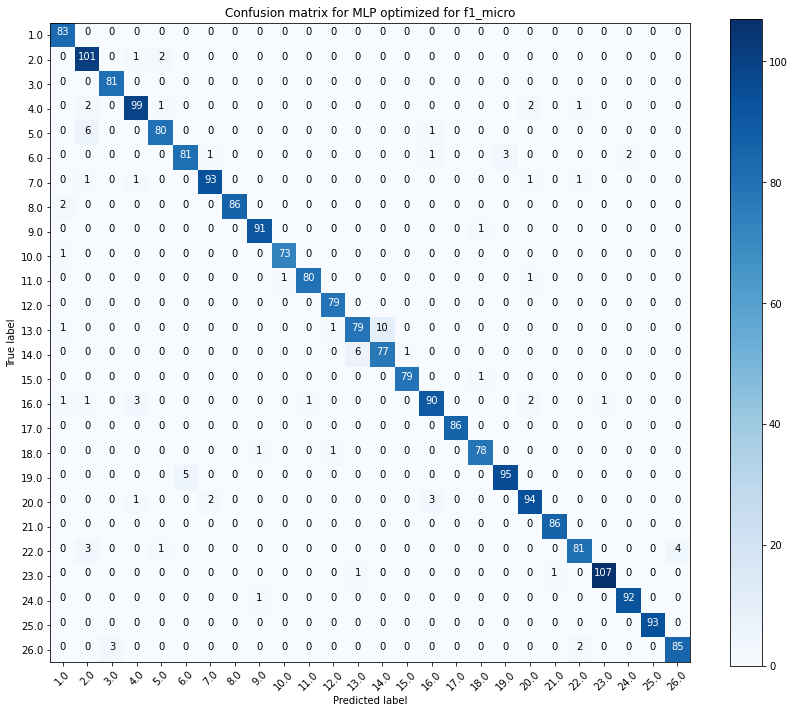

In [ ]:
cm_mlp_opt_micro = confusion_matrix(y_test, predictions['MLPC_micro_optimized'])
plot_confusion_matrix(cm_mlp_opt_micro, np.unique(y_train), title = 'Confusion matrix for MLP optimized for f1_micro',size = 'big')

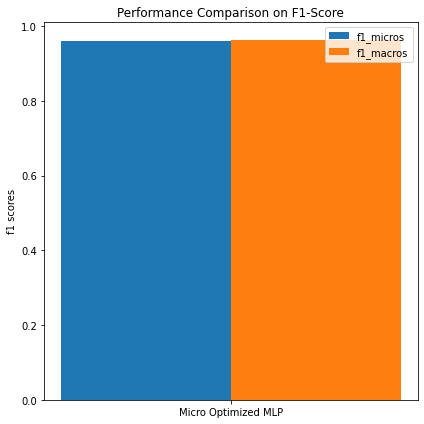

In [ ]:
f1_micro_macro_bar_plot([f1_micro['MLPC_micro_optimized']], [f1_macro['MLPC_micro_optimized']], ['Micro Optimized MLP'])

In [ ]:
print('Classification report of MLP optimized for f1_micro is:\n')
print(classification_report(y_test, predictions['MLPC_micro_optimized']))


Classification report of MLP optimized for f1_micro is:

              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97        83
         2.0       0.89      0.97      0.93       104
         3.0       0.96      1.00      0.98        81
         4.0       0.94      0.94      0.94       105
         5.0       0.95      0.92      0.94        87
         6.0       0.94      0.92      0.93        88
         7.0       0.97      0.96      0.96        97
         8.0       1.00      0.98      0.99        88
         9.0       0.98      0.99      0.98        92
        10.0       0.99      0.99      0.99        74
        11.0       0.99      0.98      0.98        82
        12.0       0.98      1.00      0.99        79
        13.0       0.92      0.87      0.89        91
        14.0       0.89      0.92      0.90        84
        15.0       0.99      0.99      0.99        80
        16.0       0.95      0.91      0.93        99
        17.0       1.00 

#### Optimization for f1_macro

In [ ]:
clf = MLPClassifier()
parameter_space = {
    'mlpc__hidden_layer_sizes': [(100,),(300,)],
    'mlpc__activation': ['tanh', 'relu', 'identity', 'logistic'],
    'mlpc__solver': ['sgd', 'adam','lbfgs'],
    'mlpc__alpha': [0.01],
    'mlpc__learning_rate': ['constant','adaptive','invscaling'],
    'mlpc__max_iter':[300,500,600,700]
}

pipe = Pipeline(steps=[('mlpc', clf)], memory = 'tmp')
MLPC_macro_estimator = GridSearchCV(pipe, parameter_space, scoring='f1_macro', cv=5, n_jobs=-1)
start_time = time.time()
MLPC_macro_estimator.fit(X_train, y_train)
print(MLPC_macro_estimator.best_score_)
fitting_time['MLPC_macro_optimized'] = time.time() - start_time
print('Fitting time : ',fitting_time['MLPC_macro_optimized'])
print('The best parameters found for MLPC for f1_macro are : ', MLPC_macro_estimator.best_params_)
print(MLPC_macro_estimator.best_estimator_)

0.962476220857938
Fitting time :  21944.89075732231
The best parameters found for MLPC for f1_macro are :  {'mlpc__activation': 'logistic', 'mlpc__alpha': 0.01, 'mlpc__hidden_layer_sizes': (100,), 'mlpc__learning_rate': 'adaptive', 'mlpc__max_iter': 600, 'mlpc__solver': 'adam'}
Pipeline(memory='tmp',
         steps=[('mlpc',
                 MLPClassifier(activation='logistic', alpha=0.01,
                               learning_rate='adaptive', max_iter=600))])


In [ ]:
start_time = time.time()
predictions['MLPC_macro_optimized'] = MLPC_macro_estimator.predict(X_test)
predicting_time['MLPC_macro_optimized'] = time.time() - start_time
print('Predicting time needed for MLPC macro optimized is : ', predicting_time['MLPC_macro_optimized'])
scores['MLPC_macro_optimized'] = accuracy_score(y_test, predictions['MLPC_macro_optimized'])
f1_micro['MLPC_macro_optimized'] = f1_score(y_test, predictions['MLPC_macro_optimized'], average='micro')
f1_macro['MLPC_macro_optimized'] = f1_score(y_test, predictions['MLPC_macro_optimized'], average='macro')
print(f1_micro['MLPC_macro_optimized'], f1_macro['MLPC_macro_optimized'])
print('Accuracy score found is : ', accuracy_score(y_test, predictions['MLPC_macro_optimized']))

Predicting time needed for MLPC macro optimized is :  0.04198956489562988
0.9594017094017094 0.9603429036046376
Accuracy score found is :  0.9594017094017094


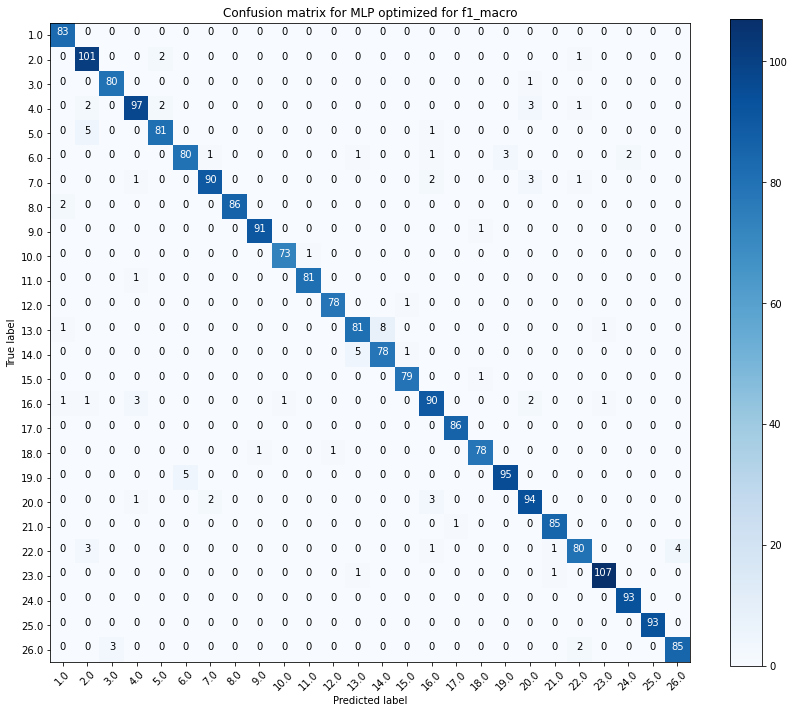

In [ ]:
cm_mlp_opt_macro = confusion_matrix(y_test, predictions['MLPC_macro_optimized'])
plot_confusion_matrix(cm_mlp_opt_macro, np.unique(y_train), title = 'Confusion matrix for MLP optimized for f1_macro',size = 'big')

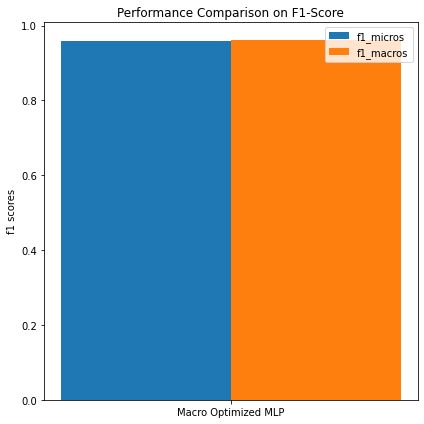

In [ ]:
clfs.append('mlp_macro')
f1_micro_macro_bar_plot([f1_micro['MLPC_macro_optimized']], [f1_macro['MLPC_macro_optimized']], ['Macro Optimized MLP'])

In [ ]:
print('Classification report of MLP optimized for f1_macro is:\n')
print(classification_report(y_test, predictions['MLPC_macro_optimized']))

Classification report of MLP optimized for f1_macro is:

              precision    recall  f1-score   support

         1.0       0.95      1.00      0.98        83
         2.0       0.90      0.97      0.94       104
         3.0       0.96      0.99      0.98        81
         4.0       0.94      0.92      0.93       105
         5.0       0.95      0.93      0.94        87
         6.0       0.94      0.91      0.92        88
         7.0       0.97      0.93      0.95        97
         8.0       1.00      0.98      0.99        88
         9.0       0.99      0.99      0.99        92
        10.0       0.99      0.99      0.99        74
        11.0       0.99      0.99      0.99        82
        12.0       0.99      0.99      0.99        79
        13.0       0.92      0.89      0.91        91
        14.0       0.91      0.93      0.92        84
        15.0       0.98      0.99      0.98        80
        16.0       0.92      0.91      0.91        99
        17.0       0.99 

#### History table for mlp tuning + Result analysis

Ο mlp έχει αρκετές υπερπαραμέτρους προς βελτιστοποίηση και γι' αυτό μας πήρε τον περισσότερο χρόνο σε σχέση με τους υπόλοιπους classifiers. Αποφασίσαμε να κάνουμε ένα μεγάλο grid search στην αρχή με σχεδόν όλες τις δυνατές τιμές για τις υπερπαραμέτρους του και έπειτα ένα δεύτερο πιο συνοπτικό για να δούμε αν μπορούμε να αυξήσουμε την απόδοση του. Επίσης δεν χρησιμοποιήσαμε κάποια μέθοδο προεπεξεργασίας των δεδομένων καθώς τα δεδομένα είναι ήδη scaled (πράγμα απαραίτητο για τον mlp) και η χρήση κάποιου PCA θα ανέβαζε σημαντικά τον χρόνο της εκτέλεσης και εκτός αυτού δεν πιστεύουμε ότι θα έιχε κάποιο θετικό αποτέλεσμα για τον ταξινομητή. Κατασκευάσαμε τους εξής πίνακες:

> $$ Pipe1 (micro) : MLP $$
>$$$$
>
>$Steps$ | $hidden_layers$ | $activation$ |$ solver $|$ alpha$ | $learning_rate$ |max_iter| $fitting\ time$ | $score$ 
>--- | --- | --- | --- | --- | --- |--- |--- | ---
> $$1$$ | [(50,), (100,), (150,), (200,)] | 'tanh','relu', 'identity','logistic' |'sgd', 'adam', 'lbfgs' |1e-4,1e-3,1e-2,1e-1|'constant', 'adaptive', 'invscaling' | |43220.66 | $$0.96293$$
>$$2$$ | [(100,)] | 'tanh','relu','logistic' | 'sgd', 'adam'| 1e-4, 1e-3| 'invscaling' | |5859.409 | $$0.9631$$ 

>
>$$ Results\ for\ pipe1:$$
>$$$$
>
>$Steps$ | $best\ parameters$
>--- | ---
>1 | $hidden\ layer\ size =(100,) ,\ activation = 'logistic',\ solver =\ 'adam',\ alpha = 1e-4,\ learning\ rate = 'invscaling',\ max\_iter = 300$
>2 | $hidden\ layer\ size =(100,) ,\ activation = 'logistic',\ solver =\ 'adam',\ alpha = 1e-3,\ learning\ rate = 'invscaling',\ max\_iter = 600$

$$$$
Καταφέραμε να ανεβάσουμε ακόμα λίγο την απόδοση με το δεύτερο grid search και σταματάμε εδώ. Τα αποτέλεσματα που πήραμε είναι τα εξής:
$$$$
$$ hidden\ layer\ size = (100,),\ activation =\ 'logistic',\ solver =\ 'adam',\ alpha= 1e-3,\ learning\ rate = 'invscaling',\ max\_iter = 300\ δίνοντας\ score\ στο\ train :$$$$ score = 0.9631$$
$$$$

Eκτελώντας την predict μέθοδο στο test set πλέον παίρνουμε ότι η απόδοση μας στο test set για micro optimization του mlp είναι:

$$score = 0.9611$$

Ακολουθούμε αντίστοιχη διαδικασία για την βελτιστοποίση του f1 micro. Κατασκευάστηκαν οι πίνακες:

> $$ Pipe2 (macro) : MLP $$
>$$$$
>
>$Steps$ | $hidden_layers$ | $activation$ |$ solver $|$ alpha$ | $learning_rate$ |max_iter| $fitting\ time$ | $score$ 
>--- | --- | --- | --- | --- | --- |--- |--- | ---
> $$1$$ | [(50,), (100,), (150,), (200,)] | 'tanh','relu', 'identity','logistic' |'sgd', 'adam', 'lbfgs' |1e-4,1e-3,1e-2,1e-1|'constant', 'adaptive', 'invscaling' | |43220.66 | $$0.9623$$
>$$2$$ | [(100,), (300,)] | 'tanh','relu','logistic','identity' | 'sgd', 'adam', 'lbfgs'| 1e-2| 'invscaling', 'constant', 'adaptive' | |21944.89 | $$0.9624$$

>
>$$ Results\ for\ pipe2:$$
>$$$$
>
>$Steps$ | $best\ parameters$
>--- | ---
>1 | $hidden\ layer\ size =(100,) ,\ activation = 'logistic',\ solver =\ 'adam',\ alpha = 1e-2,\ learning\ rate = 'invscaling',\ max\_iter = 300$
>2 | $hidden\ layer\ size =(100,) ,\ activation = 'logistic',\ solver =\ 'adam',\ alpha = 1e-2,\ learning\ rate = 'adaptive',\ max\_iter = 600$


$$$$
Καταφέραμε να ανεβάσουμε ακόμα λίγο την απόδοση με το δεύτερο grid search και σταματάμε εδώ. Τα αποτέλεσματα που πήραμε είναι τα εξής:
$$$$
$$ hidden\ layer\ size = (100,),\ activation =\ 'logistic',\ solver =\ 'adam',\ alpha= 1e-2,\ learning\ rate = 'adaptive'\, max\_iter = 600\ δίνοντας\ score\ στο\ train :$$$$ score = 0.9624$$
$$$$

Eκτελώντας την predict μέθοδο στο test set πλέον παίρνουμε ότι η απόδοση μας στο test set για micro optimization του rbf SVM είναι:

$$score = 0.9594$$

### SVM parameters

Θα ξεκινήσουμε την ανάλυση των διαφορετικών τύπων SVM εξηγώντας συνοπτικά την λειτουργία των υπερπαραμέτρων πάνω στις οποίες θα κάνουμε tuning.

>- $C$ :
>
  >   Ονομάζεται regularization parameter και αφορά το περιθώριο που θα ορίσουμε για την επιλογή του minimum margin. Για μικρές τιμές του C παίρνουμε ένα μεγάλο minimum margin και γνωρίζουμε ότι μπορεί να χάσουμε κάποια δείγματα απο την αρχή. Αντίθετα ένα μεγάλο C διαλέγει το μικρότερο minimum margin με αποτέλεσμα στην διαδικασία του train να μην αγνοήσουμε δεδομένα προσπαθώντας να τα κατηγοριοποιήσουμε όλα όσο καλύτερα γίνεται. Η διαδικασία αυτή φαίνεται καλύτερα στην παρακάτω φωτογραφία:
   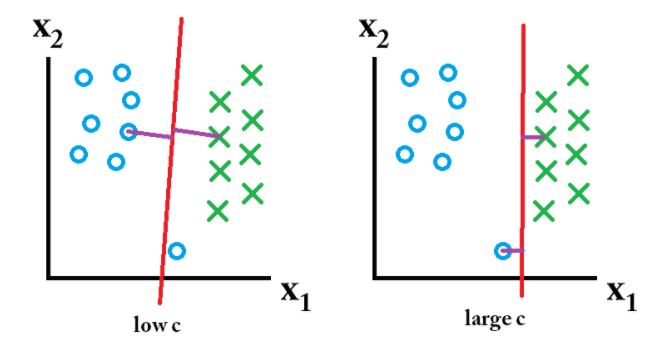

>- $loss$ (μόνο Linear SVM):
>
  >   Καθορίζει το ποια συνάρτηση κόστους θα χρησιμοποιήσουμε ανάμεσα στην hinge και στην squared hinge

>- $tol$:
>
  >   Kαθορίζει το κριτήριο για να σταματήσουμε να ψάχνουμε για ένα καλύτερο hyperplane. Όταν λοιπόν σε ένα iteration το score βελτιώνεται κατά τιμή μικρότερη ή ίση του tol τότε σταματάμε να ψάχνουμε κάτι καλύτερο.

>- $gamma$:
>
  >   Η παράμετρος gamma μπαίνει στους τύπους των polynomial και rbf SVMs και αφορά το πόσο "αυστηρο" θα είναι το hyperplane που θα φτιάξει ο ταξινομητής. Στην παρακάτω φωτογραφία φαίνεται το αποτέλεσμα για διαφορετικές τιμές του gamma:

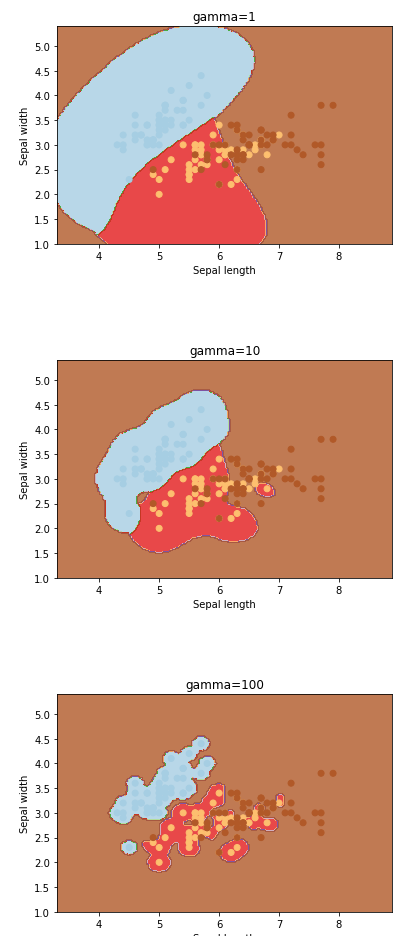
  >   Γενικότερα όσο πιο μικρό gamma χρησιμοποιούμε τόσο το hyperplane είναι ευρύτερο με αποτέλεσμα να έχουμε underfitting. Αντίθετα για μεγάλες τιμές του gamma έχουμε overfitting πάνω στα train δεδομένα.

>- $degree$ (μόνο Poly SVM):
>
  >   Η παράμετρος degree είναι ο βαθμός του πολυωνύμου που θα χρησιμοποιηθεί για την κατασκευή του hyperplane. Όμοια με το gamma για μικρές τιμές του degree έιναι πιθανό να έχουμε underfitting, ενώ για μεγαλύτερες overfitting.

### Linear SVM

In [ ]:
from sklearn.svm import LinearSVC

linearSVM = LinearSVC(dual = False)  #baseline 
linearSVM.fit(X_train, y_train)
print(linearSVM.score(X_test, y_test))

0.9512820512820512


#### Optimization for f1_micro

In [ ]:
linearSVM = LinearSVC(dual = False)

param_grid = {'linear_svm__loss' : ['squared_hinge'],
              'linear_svm__tol' : [1e-3, 1e-2, 1e-4, 5e-2, 5e-3],
              'linear_svm__C' : [0.03, 0.05,0.02, 0.04]}

linear_SVM_pipe = Pipeline(steps=[('linear_svm', linearSVM)], memory='tmp')
linear_SVM_micro_estimator = GridSearchCV(linear_SVM_pipe, param_grid = param_grid, cv=5, scoring='f1_micro', n_jobs=-1)
start_time = time.time()
linear_SVM_micro_estimator.fit(X_train, y_train)
print(linear_SVM_micro_estimator.best_score_)
fitting_time['Linear_SVM_micro_optimized'] = time.time() - start_time
print('Fitting  time : ',fitting_time['Linear_SVM_micro_optimized'])
print('The best parameters found for linear SVM for f1_micro are : ', linear_SVM_micro_estimator.best_params_)
print(linear_SVM_micro_estimator.best_estimator_)

0.9574853194468226
Fitting  time :  355.6232807636261
The best parameters found for linear SVM for f1_micro are :  {'linear_svm__C': 0.03, 'linear_svm__loss': 'squared_hinge', 'linear_svm__tol': 0.001}
Pipeline(memory='tmp',
         steps=[('linear_svm', LinearSVC(C=0.03, dual=False, tol=0.001))])


In [ ]:
start_time = time.time()
predictions['linear_SVM_micro_optimized'] = linear_SVM_micro_estimator.predict(X_test)
predicting_time['linear_SVM_micro_optimized'] = time.time() - start_time
print('Predicting time needed for linear SVM micro optimized is : ', predicting_time['linear_SVM_micro_optimized'])
scores['linear_SVM_micro_optimized'] = accuracy_score(y_test, predictions['linear_SVM_micro_optimized'])
f1_micro['linear_SVM_micro_optimized'] = f1_score(y_test, predictions['linear_SVM_micro_optimized'], average='micro')
f1_macro['linear_SVM_micro_optimized'] = f1_score(y_test, predictions['linear_SVM_micro_optimized'], average='macro')
print(f1_micro['linear_SVM_micro_optimized'], f1_macro['linear_SVM_micro_optimized'])
print('Accuracy score found is : ', accuracy_score(y_test, predictions['linear_SVM_micro_optimized']))

Predicting time needed for linear SVM micro optimized is :  0.016267776489257812
0.958974358974359 0.9595617207629055
Accuracy score found is :  0.958974358974359


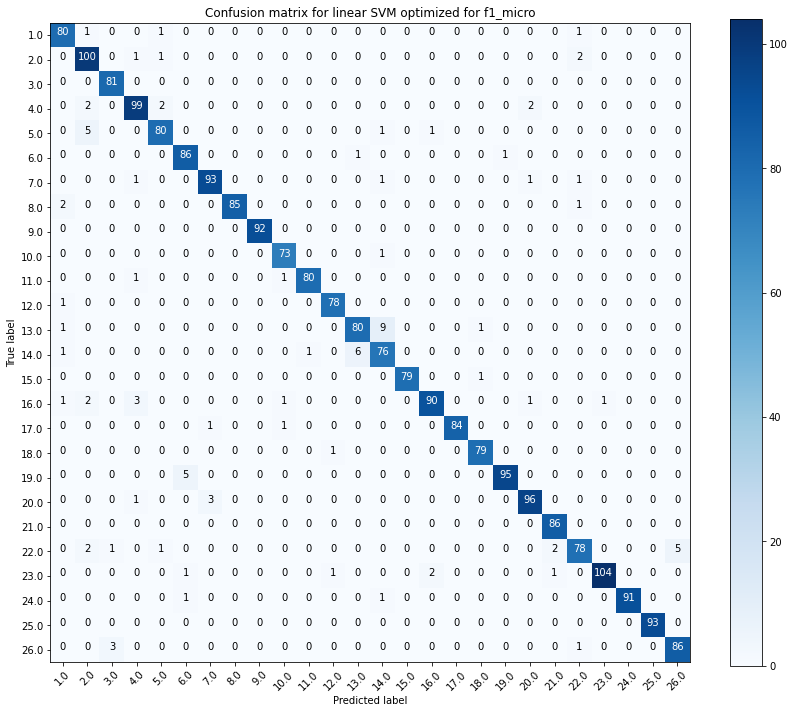

In [ ]:
cm_linear_svm_opt_micro = confusion_matrix(y_test, predictions['linear_SVM_micro_optimized'])
plot_confusion_matrix(cm_linear_svm_opt_micro, np.unique(y_train), title = 'Confusion matrix for linear SVM optimized for f1_micro', size = 'big')

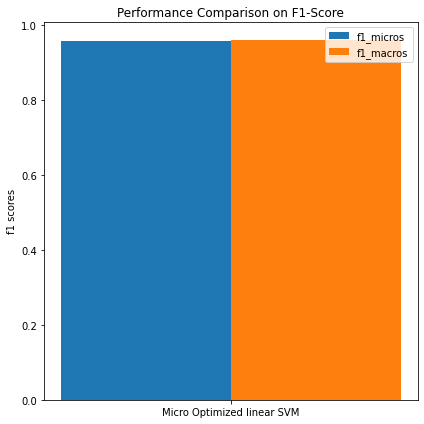

In [ ]:
clfs.append('LinearSVM_micro')
f1_micro_macro_bar_plot([f1_micro['linear_SVM_micro_optimized']], [f1_macro['linear_SVM_micro_optimized']], ['Micro Optimized linear SVM'])

In [ ]:
print('Classification report of linear SVM optimized for f1_micro is:\n')
print(classification_report(y_test, predictions['linear_SVM_micro_optimized']))

Classification report of linear SVM optimized for f1_micro is:

              precision    recall  f1-score   support

         1.0       0.93      0.96      0.95        83
         2.0       0.89      0.96      0.93       104
         3.0       0.95      1.00      0.98        81
         4.0       0.93      0.94      0.94       105
         5.0       0.94      0.92      0.93        87
         6.0       0.92      0.98      0.95        88
         7.0       0.96      0.96      0.96        97
         8.0       1.00      0.97      0.98        88
         9.0       1.00      1.00      1.00        92
        10.0       0.96      0.99      0.97        74
        11.0       0.99      0.98      0.98        82
        12.0       0.97      0.99      0.98        79
        13.0       0.92      0.88      0.90        91
        14.0       0.85      0.90      0.88        84
        15.0       1.00      0.99      0.99        80
        16.0       0.97      0.91      0.94        99
        17.0     

#### Optimization for f1_macro

In [ ]:
linearSVM = LinearSVC(dual = False)

param_grid = {'linear_svm__loss' : ['squared_hinge'],
              'linear_svm__tol' : [6e-3, 4e-3, 5e-3, 3e-3],
              'linear_svm__C' : [ 0.02,0.01, 0.03]}

linear_SVM_pipe = Pipeline(steps=[('linear_svm', linearSVM)], memory='tmp')
linear_SVM_macro_estimator = GridSearchCV(linear_SVM_pipe, param_grid = param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
start_time = time.time()
linear_SVM_macro_estimator.fit(X_train, y_train)
print(linear_SVM_macro_estimator.best_score_)
fitting_time['Linear_SVM_macro_optimized'] = time.time() - start_time
print('Fitting time : ',fitting_time['Linear_SVM_macro_optimized'])
print('The best parameters found for linear SVM for f1_macro are : ', linear_SVM_macro_estimator.best_params_)
print(linear_SVM_macro_estimator.best_estimator_)

0.9571073742059649
Fitting time :  201.753671169281
The best parameters found for linear SVM for f1_macro are :  {'linear_svm__C': 0.02, 'linear_svm__loss': 'squared_hinge', 'linear_svm__tol': 0.004}
Pipeline(memory='tmp',
         steps=[('linear_svm', LinearSVC(C=0.02, dual=False, tol=0.004))])


In [ ]:
start_time = time.time()
predictions['linear_SVM_macro_optimized'] = linear_SVM_macro_estimator.predict(X_test)
predicting_time['linear_SVM_macro_optimized'] = time.time() - start_time
print('Predicting time needed for linear SVM macro optimized is : ', predicting_time['linear_SVM_macro_optimized'])
scores['linear_SVM_macro_optimized'] = accuracy_score(y_test, predictions['linear_SVM_macro_optimized'])
f1_micro['linear_SVM_macro_optimized'] = f1_score(y_test, predictions['linear_SVM_macro_optimized'], average='micro')
f1_macro['linear_SVM_macro_optimized'] = f1_score(y_test, predictions['linear_SVM_macro_optimized'], average='macro')
print(f1_micro['linear_SVM_macro_optimized'], f1_macro['linear_SVM_macro_optimized'])
print('Accuracy score found is : ', accuracy_score(y_test, predictions['linear_SVM_macro_optimized']))

Predicting time needed for linear SVM macro optimized is :  0.01747441291809082
0.9606837606837607 0.9612201696896341
Accuracy score found is :  0.9606837606837607


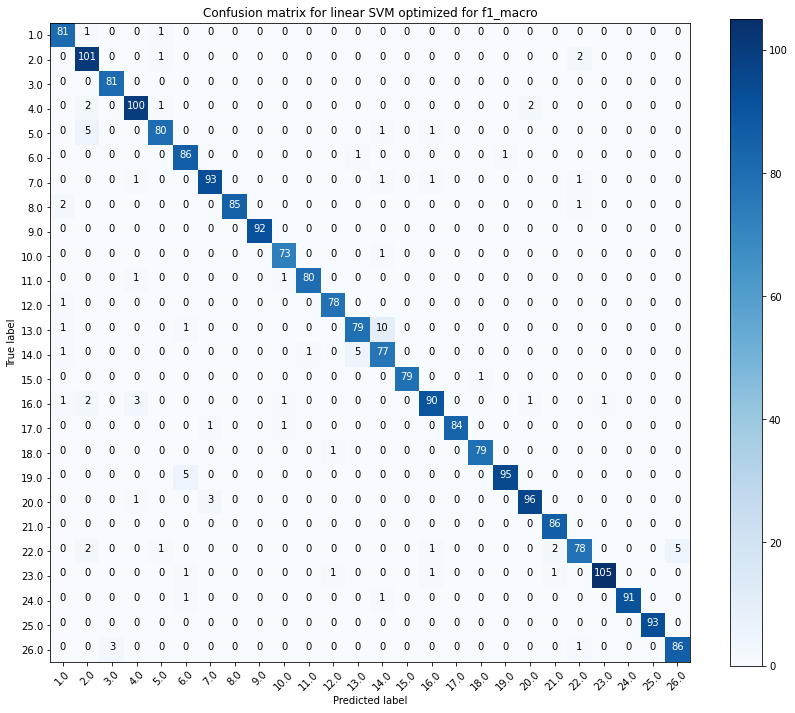

In [ ]:
cm_linear_svm_opt_macro = confusion_matrix(y_test, predictions['linear_SVM_macro_optimized'])
plot_confusion_matrix(cm_linear_svm_opt_macro, np.unique(y_train), title = 'Confusion matrix for linear SVM optimized for f1_macro', size = 'big')

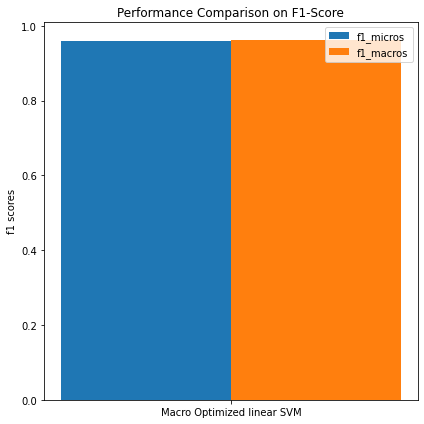

In [ ]:
clfs.append('LinearSVM_macro')
f1_micro_macro_bar_plot([f1_micro['linear_SVM_macro_optimized']], [f1_macro['linear_SVM_macro_optimized']], ['Macro Optimized linear SVM'])

In [ ]:
print('Classification report of linear SVM optimized for f1_macro is:\n')
print(classification_report(y_test, predictions['linear_SVM_macro_optimized']))

Classification report of linear SVM optimized for f1_macro is:

              precision    recall  f1-score   support

         1.0       0.93      0.98      0.95        83
         2.0       0.89      0.97      0.93       104
         3.0       0.96      1.00      0.98        81
         4.0       0.94      0.95      0.95       105
         5.0       0.95      0.92      0.94        87
         6.0       0.91      0.98      0.95        88
         7.0       0.96      0.96      0.96        97
         8.0       1.00      0.97      0.98        88
         9.0       1.00      1.00      1.00        92
        10.0       0.96      0.99      0.97        74
        11.0       0.99      0.98      0.98        82
        12.0       0.97      0.99      0.98        79
        13.0       0.93      0.87      0.90        91
        14.0       0.85      0.92      0.88        84
        15.0       1.00      0.99      0.99        80
        16.0       0.96      0.91      0.93        99
        17.0     

#### History table for linearSVM + Result analysis
$$$$

Αρχικά τα δεδομένα μας είναι ήδη scaled επομένως δεν θα χρησιμοποιήσουμε κάποιον scaler. Η πρώτη προσπάθεια μας θα γίνει χρησιμοποιώντας τόσο variance threshold όσο και pca. Τα αποτελέσματα φαίνονται παρακάτω:

> $$ Pipe1 (micro) : variance\ threshold  -> pca -> LinearSVM $$
>$$$$
>
>$Steps$ | $threshold$ | $pca$ |$ loss $|$ tol$ | $C$ | $fitting\ time$ | $score$ 
>--- | --- | --- | --- | --- | --- |--- |--- 
> $$1$$ | [0, 0.01, 0.02] | [100, 200, 300] |'squared_hinge', 'hinge' |1e-4, 1e-3, 1e-5|1, 0.5, 0.75 | 1274.25 | $$0.9463$$
>$$2$$ | [0, 0.001, 0.002] | [250, 300, 400] | 'squared'| 1e-4, 1e-3| 0.5, 0.4, 0.6 | 1866.592 | $$0.9486$$ 
>$$3$$ | [0, 0.0005, 0.001] | [400, 450, 500] |'squared' |1e-4|0.2,0.3,0.4| 894.32 | $$0.9512$$ 
>$$4$$ | [0] | [400, 450, 500] | 'squared' |1e-4 | 0.1, 0.2, 0.05| 295.66 | $$0.955$$
>$$5$$ | [0] | [440, 450, 460] | 'squared' |1e-4 | 0.001, 0.002, 0.05| 325.426 | $$0.955$$
>
>$$ Results\ for\ pipe1:$$
>$$$$
>
>$Steps$ | $best\ parameters$
>--- | ---
>1 | $threshold = 0,\ pca = 300,\ loss =\ 'squared\ hinge',\ tol = 1e-4,\ C = 0.5$
>2 | $threshold = 0,\ pca = 400,\ loss =\ 'squared\ hinge',\ tol = 1e-4,\ C = 0.4$
>3 | $threshold = 0,\ pca = 450,\ loss =\ 'squared\ hinge',\ tol = 1e-4,\ C = 0.2$
>4 | $threshold = 0,\ pca = 450,\ loss =\ 'squared\ hinge',\ tol = 1e-4,\ C = 0.05$
>5 | $threshold = 0,\ pca = 450,\ loss =\ 'squared\ hinge',\ tol = 1e-4,\ C = 0.05$

$$$$
Παρατηρώντας ότι διαλέξαμε variance threshold = 0 και αρκετά components PCA θα επιχειρήσουμε να τρέξουμε ένα δεύτερο pipe χωρίς τα 2 παραπάνω. Παίρνουμε τα εξής αποτελέσματα:
$$$$

> $$ Pipe2 (micro) : LinearSVM $$
>$$$$
>
>$Steps$ | $ loss $|$ tol$ | $C$ | $fitting\ time$ | $score$ 
>--- |  --- | --- | --- |--- |--- 
> $$1$$ | 'squared_hinge', 'hinge' |1e-4, 1e-3, 1e-2|0.01, 0.1, 1, 10, 100 | 390.62 | $$0.9558$$
>$$2$$ |  'squared'| 1e-1, 1e-2, 1e-3| 0.001, 0.005, 0.01, 0.05, 0.1 | 270.55 | $$0.9565$$ 
>$$3$$ | 'squared' |1e-3, 1e-2, 1e-1|0.03,0.05,0.07, 0.09| 219.65 | $$0.9574$$ 
>$$4$$ |  'squared' |1e-3, 1e-2, 1e-1 | 0.01, 0.02, 0.03, 0.04, 0.05| 282.13 | $$0.9574$$
>$$5$$ |  'squared' |1e-3, 1e-2, 1e-1 | 0.02, 0.03, 0.04, 0.05, 0.005| 355.623 | $$0.9574$$
>$$$$
>
>$$ Results\ for\ pipe1:$$
>$$$$
>
>$Steps$ | $best\ parameters$
>--- | ---
>1 |  $loss =\ 'squared\ hinge',\ tol = 1e-2,\ C = 0.01$
>2 |  $loss =\ 'squared\ hinge',\ tol = 1e-2,\ C = 0.05$
>3 |  $loss =\ 'squared\ hinge',\ tol = 1e-3,\ C = 0.03$
>4 |  $loss =\ 'squared\ hinge',\ tol = 1e-3,\ C = 0.03$
>5 |  $loss =\ 'squared\ hinge',\ tol = 1e-3,\ C = 0.03$

Παρατηρούμε ότι δεν μπορούμε να αυξήσουμε άλλο την απόδοση του classifier και επομένως σταματάμε στο βήμα 5 (χωρίς να χρησιμοποιήσουμε pca και threshold καθώς φτάσαμε σε υψηλότερο score απο πριν) το οποίος μας γυρίζει:
$$$$
$$ loss =\ 'squared\_hinge',\ tol =\ 1e-3,\ C= 0.03\ δίνοντας\ score\ στο\ train :$$$$ score = 0.9574$$
$$$$

Eκτελώντας την predict μέθοδο στο test set πλέον παίρνουμε ότι η απόδοση μας στο test set για micro optimization του linear SVM είναι:

$$score = 0.9589$$

Αντίστοιχα θα φτίαξουμε ένα pipe για μεγιστοποίση του f1 macro στο οποίο θα βάλουμε τα στοιχεία που έδωσαν το καλύτερο αποτέλεσμα για το f1 micro, δηλαδή μόνο τον ταξινομητή. Είναι:
$$$$
> $$ Pipe1 (macro) : LinearSVM $$
>$$$$
>
>$Steps$ | $ loss $|$ tol$ | $C$ | $fitting\ time$ | $score$ 
>--- |  --- | --- | --- |--- |--- 
> $$1$$ | 'squared_hinge', 'hinge' |1e-4, 1e-3, 1e-2, 1e-1|0.001,0.01, 0.1, 1, 10, 100 | 484.681 | $$0.955$$
>$$2$$ |  'squared'| 3e-2, 5e-2, 1e-3| 0.01, 0.02, 0.05, 0.1 | 290.6 | $$0.956$$ 
>$$3$$ | 'squared' |1e-3, 2e-3, 3e-3, 4e-3|0.01,0.02,0.03, 0.04, 0.05| 379.21 | $$0.957$$ 
>$$4$$ |  'squared' |3e-3, 4e-3, 5e-3, 6e-3 | 0.01,0.02, 0.03| 201.75 | $$0.957$$
>
>$$$$
>
>$$ Results\ for\ pipe1:$$
>$$$$
>
>$Steps$ | $best\ parameters$
>--- | ---
>1 |  $loss =\ 'squared\ hinge',\ tol = 1e-2,\ C = 0.01$
>2 |  $loss =\ 'squared\ hinge',\ tol = 1e-3,\ C = 0.02$
>3 |  $loss =\ 'squared\ hinge',\ tol = 4e-3,\ C = 0.02$
>4 |  $loss =\ 'squared\ hinge',\ tol = 4e-3,\ C = 0.02$


Παρατηρούμε ότι δεν μπορούμε να αυξήσουμε άλλο την απόδοση του classifier και επομένως σταματάμε στο βήμα 4 το οποίος μας γυρίζει:
$$$$
$$ loss =\ 'squared\_hinge',\ tol =\ 4e-3,\ C= 0.02\ δίνοντας\ score\ στο\ train :$$$$ score = 0.957$$
$$$$

Eκτελώντας την predict μέθοδο στο test set πλέον παίρνουμε ότι η απόδοση μας στο test set για macro optimization του linear SVM είναι:

$$score = 0.9606$$

Συγκρίνοντας λοιπόν τα score που πήραμε στο test set μετά το grid search παρατηρούμε ότι έχουμε αύξηση του τελικού score του ταξινομητή κατά περίπου 1%. Το αποτέλεσμα είναι αναμενόμενο καθώς στα τόσο υψηλά σκορ 1% είναι αξιοσημείωτη. Γενικότερα η διαδικασία του grid search είναι πολύ ακριβή οποτέ θα πρέπει κάποιος να ζυγίσει τον χρόνο με το κέρδος που ίσως έχει στην απόδοση, ώστε να κρίνει αν μία τέτοια διαδικασία θα είναι προς όφελος του.

### Rbf SVM

##### Optimization for f1_micro

In [ ]:
rbfSVM = SVC(kernel = 'rbf', decision_function_shape='ovo')

param_grid = {'pca__n_components' : [500, 520],
              'rbf_svm__gamma' : ['scale', 0.1, 0.01],
              'rbf_svm__tol' : [1e-3, 1e-4],
              'rbf_svm__C' : [1, 10, 0.1]}

rbf_SVM_pipe = Pipeline(steps=[('pca', pca),('rbf_svm', rbfSVM)], memory='tmp')
rbf_SVM_micro_estimator = GridSearchCV(rbf_SVM_pipe, param_grid = param_grid, cv=5, scoring='f1_micro', n_jobs=-1)
start_time = time.time()
rbf_SVM_micro_estimator.fit(X_train, y_train)
print(rbf_SVM_micro_estimator.best_score_)
fitting_time['rbf_SVM_micro_optimized'] = time.time() - start_time
print('Fitting time : ',fitting_time['rbf_SVM_micro_optimized'])
print('The best parameters found for rbf SVM for f1_micro are : ', rbf_SVM_micro_estimator.best_params_)
print(rbf_SVM_micro_estimator.best_estimator_)

0.9686646991871555
Fitting time :  2003.0299580097198
The best parameters found for rbf SVM for f1_micro are :  {'pca__n_components': 500, 'rbf_svm__C': 10, 'rbf_svm__gamma': 'scale', 'rbf_svm__tol': 0.001}
Pipeline(memory='tmp',
         steps=[('pca', PCA(n_components=500)),
                ('rbf_svm', SVC(C=10, decision_function_shape='ovo'))])


In [ ]:
start_time = time.time()
predictions['rbf_SVM_micro_optimized'] = rbf_SVM_micro_estimator.predict(X_test)
predicting_time['rbf_SVM_micro_optimized'] = time.time() - start_time
print('Predicting time needed for rbf SVM macro optimized is : ', predicting_time['rbf_SVM_micro_optimized'])
scores['rbf_SVM_micro_optimized'] = accuracy_score(y_test, predictions['rbf_SVM_micro_optimized'])
f1_micro['rbf_SVM_micro_optimized'] = f1_score(y_test, predictions['rbf_SVM_micro_optimized'], average='micro')
f1_macro['rbf_SVM_micro_optimized'] = f1_score(y_test, predictions['rbf_SVM_micro_optimized'], average='macro')
print(f1_micro['rbf_SVM_micro_optimized'], f1_macro['rbf_SVM_micro_optimized'])
print('Accuracy score found is : ', accuracy_score(y_test, predictions['rbf_SVM_micro_optimized']))

Predicting time needed for rbf SVM macro optimized is :  7.050979375839233
0.9700854700854701 0.9711695437468784
Accuracy score found is :  0.9700854700854701


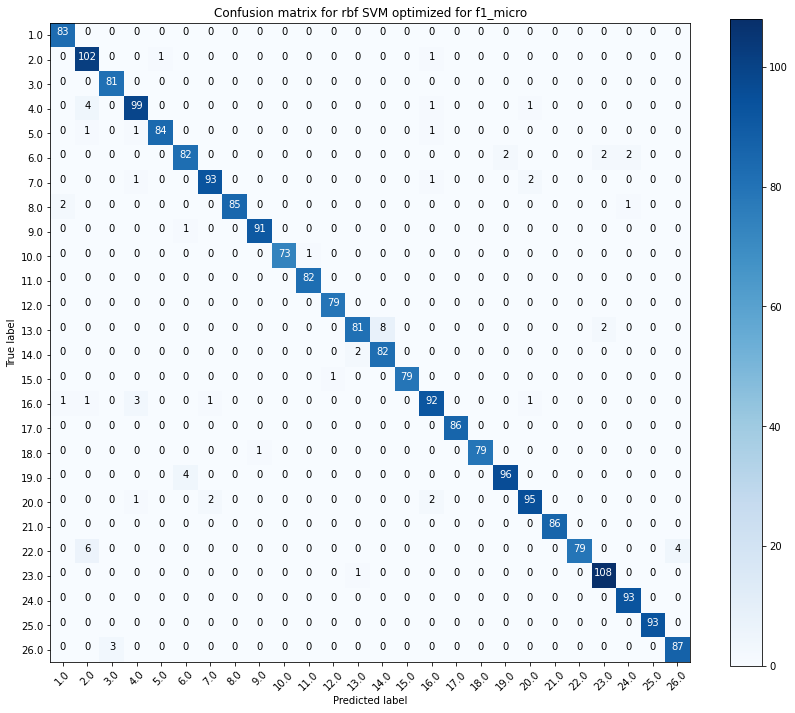

In [ ]:
cm_rbf_svm_opt_micro = confusion_matrix(y_test, predictions['rbf_SVM_micro_optimized'])
plot_confusion_matrix(cm_rbf_svm_opt_micro, np.unique(y_train), title = 'Confusion matrix for rbf SVM optimized for f1_micro', size = 'big')

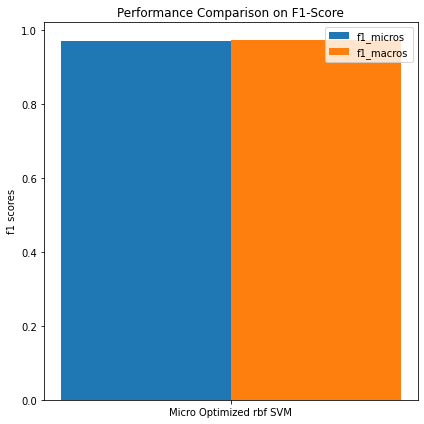

In [ ]:
clfs.append('RbfSVM_micro')
f1_micro_macro_bar_plot([f1_micro['rbf_SVM_micro_optimized']], [f1_macro['rbf_SVM_micro_optimized']], ['Micro Optimized rbf SVM'])

In [ ]:
print('Classification report of rbf SVM optimized for f1_micro is:\n')
print(classification_report(y_test, predictions['rbf_SVM_micro_optimized']))

Classification report of rbf SVM optimized for f1_micro is:

              precision    recall  f1-score   support

         1.0       0.97      1.00      0.98        83
         2.0       0.89      0.98      0.94       104
         3.0       0.96      1.00      0.98        81
         4.0       0.94      0.94      0.94       105
         5.0       0.99      0.97      0.98        87
         6.0       0.94      0.93      0.94        88
         7.0       0.97      0.96      0.96        97
         8.0       1.00      0.97      0.98        88
         9.0       0.99      0.99      0.99        92
        10.0       1.00      0.99      0.99        74
        11.0       0.99      1.00      0.99        82
        12.0       0.99      1.00      0.99        79
        13.0       0.96      0.89      0.93        91
        14.0       0.91      0.98      0.94        84
        15.0       1.00      0.99      0.99        80
        16.0       0.94      0.93      0.93        99
        17.0       1

#### Optimization for f1_macro

In [ ]:
param_grid = {'pca__n_components' : [500],
              'rbf_svm__gamma' : ['scale', 0.1, 0.01, 0.001],
              'rbf_svm__tol' : [1e-3, 2e-3, 3e-3],
              'rbf_svm__C' : [1, 10, 100]}

rbf_SVM_pipe = Pipeline(steps=[('pca', pca),('rbf_svm', rbfSVM)], memory='tmp')
rbf_SVM_macro_estimator = GridSearchCV(rbf_SVM_pipe, param_grid = param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
start_time = time.time()
rbf_SVM_macro_estimator.fit(X_train, y_train)
print(rbf_SVM_macro_estimator.best_score_)
fitting_time['rbf_SVM_macro_optimized'] = time.time() - start_time
print('Fitting time : ',fitting_time['rbf_SVM_macro_optimized'])
print('The best parameters found for rbf SVM for f1_macro are : ', rbf_SVM_macro_estimator.best_params_)
print(rbf_SVM_macro_estimator.best_estimator_)

0.9679915729840765
Fitting time :  1543.916204214096
The best parameters found for rbf SVM for f1_macro are :  {'pca__n_components': 500, 'rbf_svm__C': 10, 'rbf_svm__gamma': 'scale', 'rbf_svm__tol': 0.001}
Pipeline(memory='tmp',
         steps=[('pca', PCA(n_components=500)),
                ('rbf_svm', SVC(C=10, decision_function_shape='ovo'))])


In [ ]:
start_time = time.time()
predictions['rbf_SVM_macro_optimized'] = rbf_SVM_macro_estimator.predict(X_test)
predicting_time['rbf_SVM_macro_optimized'] = time.time() - start_time
print('Predicting time needed for rbf SVM macro optimized is : ', predicting_time['rbf_SVM_macro_optimized'])
scores['rbf_SVM_macro_optimized'] = accuracy_score(y_test, predictions['rbf_SVM_macro_optimized'])
f1_micro['rbf_SVM_macro_optimized'] = f1_score(y_test, predictions['rbf_SVM_macro_optimized'], average='micro')
f1_macro['rbf_SVM_macro_optimized'] = f1_score(y_test, predictions['rbf_SVM_macro_optimized'], average='macro')
print(f1_micro['rbf_SVM_macro_optimized'], f1_macro['rbf_SVM_macro_optimized'])
print('Accuracy score found is : ', accuracy_score(y_test, predictions['rbf_SVM_macro_optimized']))

Predicting time needed for rbf SVM macro optimized is :  7.088571548461914
0.9700854700854701 0.9711695437468784
Accuracy score found is :  0.9700854700854701


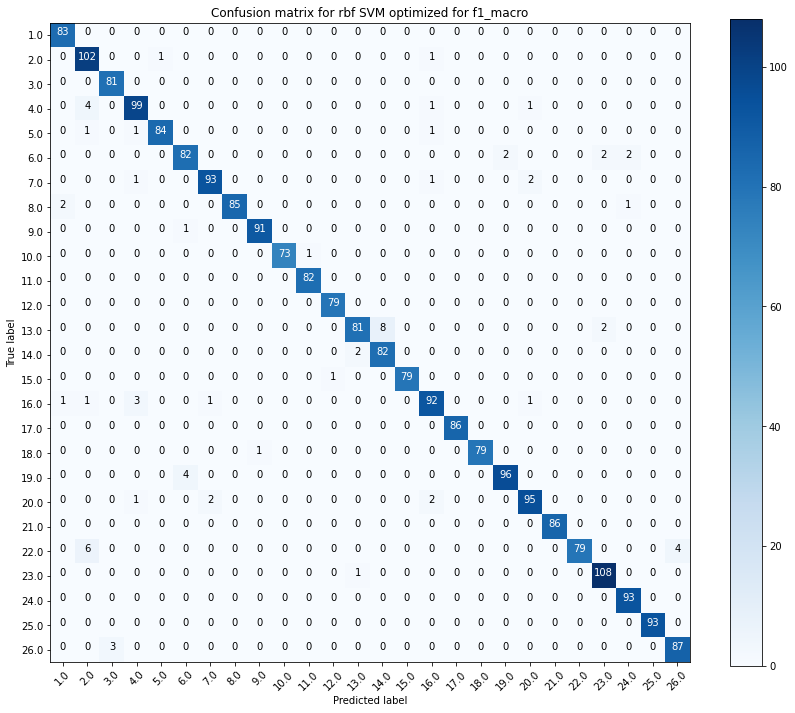

In [ ]:
cm_rbf_svm_opt_macro = confusion_matrix(y_test, predictions['rbf_SVM_macro_optimized'])
plot_confusion_matrix(cm_rbf_svm_opt_macro, np.unique(y_train), title = 'Confusion matrix for rbf SVM optimized for f1_macro', size = 'big')

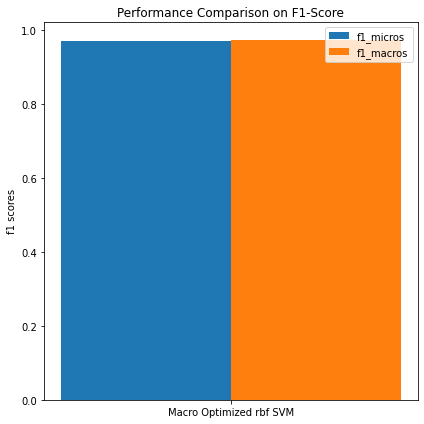

In [ ]:
clfs.append('RbfSVM_macro')
f1_micro_macro_bar_plot([f1_micro['rbf_SVM_macro_optimized']], [f1_macro['rbf_SVM_macro_optimized']], ['Macro Optimized rbf SVM'])

In [ ]:
print('Classification report of rbf SVM optimized for f1_macro is:\n')
print(classification_report(y_test, predictions['rbf_SVM_macro_optimized']))

Classification report of rbf SVM optimized for f1_macro is:

              precision    recall  f1-score   support

         1.0       0.97      1.00      0.98        83
         2.0       0.89      0.98      0.94       104
         3.0       0.96      1.00      0.98        81
         4.0       0.94      0.94      0.94       105
         5.0       0.99      0.97      0.98        87
         6.0       0.94      0.93      0.94        88
         7.0       0.97      0.96      0.96        97
         8.0       1.00      0.97      0.98        88
         9.0       0.99      0.99      0.99        92
        10.0       1.00      0.99      0.99        74
        11.0       0.99      1.00      0.99        82
        12.0       0.99      1.00      0.99        79
        13.0       0.96      0.89      0.93        91
        14.0       0.91      0.98      0.94        84
        15.0       1.00      0.99      0.99        80
        16.0       0.94      0.93      0.93        99
        17.0       1

#### History table for rbfSVM + Result analysis
$$$$
Έχοντας παρατηρήσει απο πριν ότι το variance threshold δεν μας βοηθάει στην ανάλυση μας εδώ θα ψάξουμε για 2 pipes, ένα με PCA και ένα χωρίς. Τα αποτελέσματα που πήραμε μετά απο διαδοχικά grid search είναι τα εξής:

> $$ Pipe1 (micro) :  pca -> RbfSVM $$
>$$$$
>
>$Steps$ |  $pca$ |$ gamma $|$ tol$ | $C$ | $fitting\ time$ | $score$ 
>--- | --- | --- | --- | --- | --- |--- 
> $$1$$ |  [200, 500] |'auto', 'scale' |1e-2, 1e-3|0.1, 1, 10 | 866.869 | $$0.9622$$
>$$2$$ |  [450, 500, 550] | 'scale', 0.01, 0.1| 1e-2, 1e-3| 0.1, 1, 10, 0.01 | 4505.96 | $$0.9686$$ 
>$$3$$ |  [500, 520] |'scale', 0.1, 0.001 |1e-3, 1e-3|0.1, 1, 10|2003.02 | $$0.9686$$ 
>
>$$$$
>$$ Results\ for\ pipe1:$$
>$$$$
>
>$Steps$ | $best\ parameters$
>--- | ---
>1 | $pca = 500,\ gamma =\ 'scale',\ tol = 1e-2,\ C = 1$
>2 | $pca = 500,\ gamma =\ 'scale',\ tol = 1e-3,\ C = 10$
>3 | $ pca = 500,\ gamma =\ 'scale',\ tol = 1e-3,\ C = 10$

$$$$
> $$ Pipe2 (micro) :  RbfSVM $$
>$$$$
>
>$Steps$ | $ gamma $|$ tol$ | $C$ | $fitting\ time$ | $score$ 
>--- | --- | --- | --- | --- | --- 
> $$1$$ | 'auto', 'scale', 0.1, 0.01, 0.001 |1e-3, 2e-3, 3e-3|0.1, 1, 10, 100 | 3565.23 | $$0.9686$$
>
>$$$$
>$$ Results\ for\ pipe2:$$
>$$$$
>
>$Steps$ | $best\ parameters$
>--- | ---
>1 | $ gamma =\ 1e-2,\ tol = 1e-3,\ C = 10$

$$$$
Έχοντας τα αποτελέσματα απο τα 2 pipes τα οποία μας έδωσαν ακριβώς το ίδιο αποτέλεσμα στο train set διαλέγουμε το pipe με το PCA αφού η μείωση της διαστατικότητας βοηθάει στην μείωση της υπολογιστικής ισχύος που χρειάζεται για να τρέξει ο ταξινομητής. Επομένως για f1 micro παίρνουμε τα αποτελέσματα:
$$$$
$$ pca =\ 500,\ gamma =\ 'scale',\ tol =\ 1e-3,\ C= 10\ δίνοντας\ score\ στο\ train :$$$$ score = 0.9679$$
$$$$

Eκτελώντας την predict μέθοδο στο test set πλέον παίρνουμε ότι η απόδοση μας στο test set για micro optimization του rbf SVM είναι:

$$score = 0.97$$

$$$$
> $$ Pipe1 (macro) :  pca -> RbfSVM $$
>$$$$
>
>$Steps$ |  $pca$ |$ gamma $|$ tol$ | $C$ | $fitting\ time$ | $score$ 
>--- | --- | --- | --- | --- | --- |--- 
> $$1$$ |  [300, 400, 500] |'auto', 'scale', 0.1, 0.01 |1e-2, 1e-3, 1e-4|0.1, 1, 10 | 3583.185 | $$0.9679$$
>$$2$$ |  [500] | 'scale', 0.1, 0.01, 0.001| 1e-3, 2e-3, 3e-3| 1, 10, 100 | 1543.916 | $$0.9679$$
>
>$$$$
>$$ Results\ for\ pipe1:$$
>$$$$
>
>$Steps$ | $best\ parameters$
>--- | ---
>1 | $pca = 500,\ gamma =\ 'scale',\ tol = 1e-3,\ C = 10$
>2 | $pca = 500,\ gamma =\ 'scale',\ tol = 1e-3,\ C = 10$

$$$$
Μετά απο 2 διεξοδικά search για το f1 macro καταλήγουμε στις εξής παραμέτρους:
$$$$
$$ pca =\ 500,\ gamma =\ 'scale',\ tol =\ 1e-3,\ C= 10\ δίνοντας\ score\ στο\ train :$$$$ score = 0.9679$$
$$$$

Eκτελώντας την predict μέθοδο στο test set πλέον παίρνουμε ότι η απόδοση μας στο test set για micro optimization του rbf SVM είναι:

$$score = 0.97$$

$$$$
Παρατηρούμε ότι και οι βελτιστοποιήσεις και για f1 micro και για f1 macro καταλήγουν σε ακριβώς το ίδιο αποτέλεσμα δίνοντας μία αύξηση περίπου 1% σε σχέση με το accuracy που πήραμε στο baseline classification. Όπως και στην περίπτωση του linear SVM, ίσως ακόμα πιο έντονα σε αυτή τη περίπτωση που είναι βαρύτερη υπολογιστικά, η αύξηση που πήραμε είναι αρκετά μικρή σε σχέση με τον χρόνο που χαλάσαμε για τα διαδοχικά grid search.

### Poly SVM

In [ ]:
polySVM = SVC(kernel = 'poly')
polySVM.fit(X_train, y_train)
print(polySVM.score(X_test, y_test))

0.9666666666666667


#### Optimization for f1_micro

In [ ]:
polySVM = SVC(kernel = 'poly', decision_function_shape='ovo')

param_grid = {'poly_svm__degree' : [1, 2, 3, 4, 5],
              'poly_svm__gamma' : ['scale', 0.1, 0.01, 0.001],
              'poly_svm__tol' : [1e-3, 1e-4, 1e-2, 1e-1],
              'poly_svm__C' : [1, 10, 0.1, 0.01, 0.001]}

poly_SVM_pipe = Pipeline(steps=[('poly_svm', polySVM)], memory='tmp')
poly_SVM_micro_estimator = GridSearchCV(poly_SVM_pipe, param_grid = param_grid, cv=5, scoring='f1_micro', n_jobs=-1)
start_time = time.time()
poly_SVM_micro_estimator.fit(X_train, y_train)
print(poly_SVM_micro_estimator.best_score_)
fitting_time['poly_SVM_micro_optimized'] = time.time() - start_time
print('Fitting time : ',fitting_time['poly_SVM_micro_optimized'])
print('The best parameters found for poly SVM for f1_micro are : ', poly_SVM_micro_estimator.best_params_)
print(poly_SVM_micro_estimator.best_estimator_)

0.9679315948335198
Fitting time :  22585.7287940979
The best parameters found for poly SVM for f1_micro are :  {'poly_svm__C': 0.1, 'poly_svm__degree': 4, 'poly_svm__gamma': 0.01, 'poly_svm__tol': 0.0001}
Pipeline(memory='tmp',
         steps=[('poly_svm',
                 SVC(C=0.1, decision_function_shape='ovo', degree=4, gamma=0.01,
                     kernel='poly', tol=0.0001))])


In [ ]:
start_time = time.time()
predictions['poly_SVM_micro_optimized'] = poly_SVM_micro_estimator.predict(X_test)
predicting_time['poly_SVM_micro_optimized'] = time.time() - start_time
print('Predicting time needed for poly SVM micro optimized is : ', predicting_time['poly_SVM_micro_optimized'])
scores['poly_SVM_micro_optimized'] = accuracy_score(y_test, predictions['poly_SVM_micro_optimized'])
f1_micro['poly_SVM_micro_optimized'] = f1_score(y_test, predictions['poly_SVM_micro_optimized'], average='micro')
f1_macro['poly_SVM_micro_optimized'] = f1_score(y_test, predictions['poly_SVM_micro_optimized'], average='macro')
print(f1_micro['poly_SVM_micro_optimized'], f1_macro['poly_SVM_micro_optimized'])
print('Accuracy score found is : ', accuracy_score(y_test, predictions['poly_SVM_micro_optimized']))

Predicting time needed for poly SVM micro optimized is :  8.304311752319336
0.9700854700854701 0.9712246148067737
Accuracy score found is :  0.9700854700854701


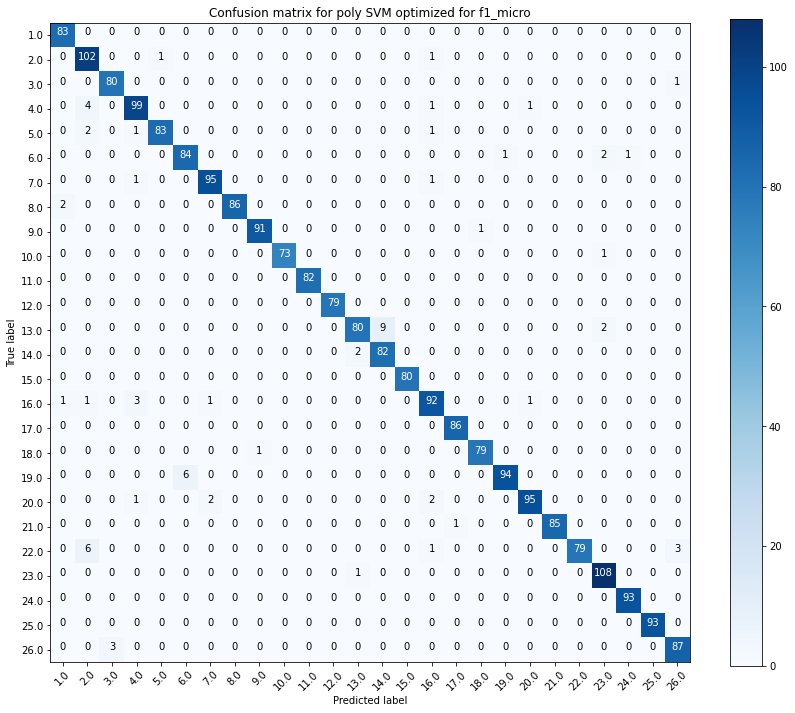

In [ ]:
cm_poly_svm_opt_micro = confusion_matrix(y_test, predictions['poly_SVM_micro_optimized'])
plot_confusion_matrix(cm_poly_svm_opt_micro, np.unique(y_train), title = 'Confusion matrix for poly SVM optimized for f1_micro', size = 'big')

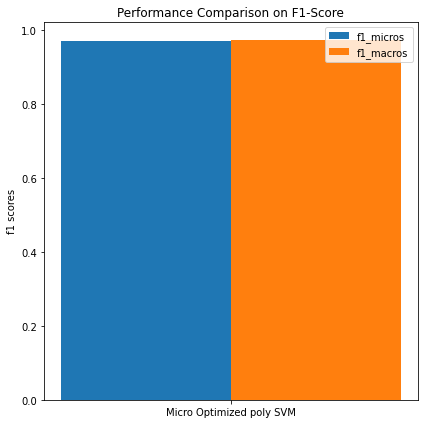

In [ ]:
clfs.append('PolySvm_micro')
f1_micro_macro_bar_plot([f1_micro['poly_SVM_micro_optimized']], [f1_macro['poly_SVM_micro_optimized']], ['Micro Optimized poly SVM'])

In [ ]:
print('Classification report of poly SVM optimized for f1_micro is:\n')
print(classification_report(y_test, predictions['poly_SVM_micro_optimized']))

Classification report of poly SVM optimized for f1_micro is:

              precision    recall  f1-score   support

         1.0       0.97      1.00      0.98        83
         2.0       0.89      0.98      0.93       104
         3.0       0.96      0.99      0.98        81
         4.0       0.94      0.94      0.94       105
         5.0       0.99      0.95      0.97        87
         6.0       0.93      0.95      0.94        88
         7.0       0.97      0.98      0.97        97
         8.0       1.00      0.98      0.99        88
         9.0       0.99      0.99      0.99        92
        10.0       1.00      0.99      0.99        74
        11.0       1.00      1.00      1.00        82
        12.0       1.00      1.00      1.00        79
        13.0       0.96      0.88      0.92        91
        14.0       0.90      0.98      0.94        84
        15.0       1.00      1.00      1.00        80
        16.0       0.93      0.93      0.93        99
        17.0       

#### Optimization for f1_macro

In [ ]:
polySVM = SVC(kernel = 'poly', decision_function_shape='ovo')

param_grid = {'poly_svm__degree' : [1, 2, 3, 4, 5],
              'poly_svm__gamma' : ['scale', 0.1, 0.01, 0.001],
              'poly_svm__tol' : [1e-3, 1e-4, 1e-2, 1e-1],
              'poly_svm__C' : [1, 10, 0.1, 0.01, 0.001]}

poly_SVM_pipe = Pipeline(steps=[('poly_svm', polySVM)], memory='tmp')
poly_SVM_macro_estimator = GridSearchCV(poly_SVM_pipe, param_grid = param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
start_time = time.time()
poly_SVM_macro_estimator.fit(X_train, y_train)
print(poly_SVM_macro_estimator.best_score_)
fitting_time['poly_SVM_macro_optimized'] = time.time() - start_time
print('Fitting time : ',fitting_time['poly_SVM_macro_optimized'])
print('The best parameters found for poly SVM for f1_macro are : ', poly_SVM_macro_estimator.best_params_)
print(poly_SVM_macro_estimator.best_estimator_)

0.9673009037588614
Fitting time :  18981.309583187103
The best parameters found for poly SVM for f1_macro are :  {'poly_svm__C': 0.1, 'poly_svm__degree': 4, 'poly_svm__gamma': 0.01, 'poly_svm__tol': 0.01}
Pipeline(memory='tmp',
         steps=[('poly_svm',
                 SVC(C=0.1, decision_function_shape='ovo', degree=4, gamma=0.01,
                     kernel='poly', tol=0.01))])


In [ ]:
start_time = time.time()
predictions['poly_SVM_macro_optimized'] = poly_SVM_macro_estimator.predict(X_test)
predicting_time['poly_SVM_macro_optimized'] = time.time() - start_time
print('Predicting time needed for poly SVM macro optimized is : ', predicting_time['poly_SVM_macro_optimized'])
scores['poly_SVM_macro_optimized'] = accuracy_score(y_test, predictions['poly_SVM_macro_optimized'])
f1_micro['poly_SVM_macro_optimized'] = f1_score(y_test, predictions['poly_SVM_macro_optimized'], average='micro')
f1_macro['poly_SVM_macro_optimized'] = f1_score(y_test, predictions['poly_SVM_macro_optimized'], average='macro')
print(f1_micro['poly_SVM_macro_optimized'], f1_macro['poly_SVM_macro_optimized'])
print('Accuracy score found is : ', accuracy_score(y_test, predictions['poly_SVM_macro_optimized']))

Predicting time needed for poly SVM macro optimized is :  6.340108156204224
0.9705128205128205 0.9716692276651796
Accuracy score found is :  0.9705128205128205


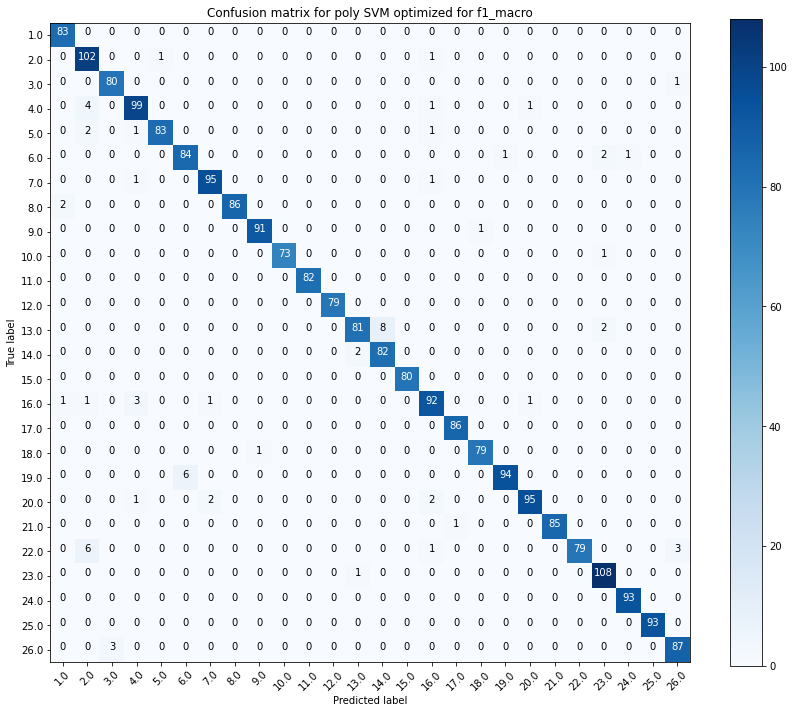

In [ ]:
cm_poly_svm_opt_macro = confusion_matrix(y_test, predictions['poly_SVM_macro_optimized'])
plot_confusion_matrix(cm_poly_svm_opt_macro, np.unique(y_train), title = 'Confusion matrix for poly SVM optimized for f1_macro', size = 'big')

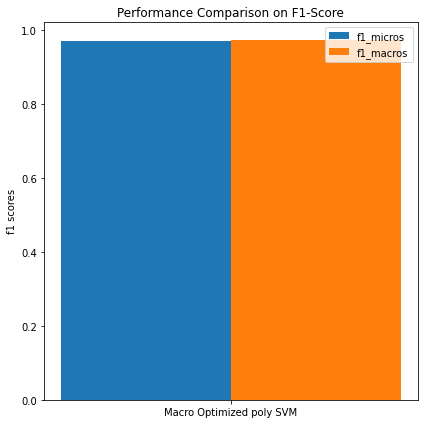

In [ ]:
clfs.append('PolySVM_macro')
f1_micro_macro_bar_plot([f1_micro['poly_SVM_macro_optimized']], [f1_macro['poly_SVM_macro_optimized']], ['Macro Optimized poly SVM'])

In [ ]:
print('Classification report of poly SVM optimized for f1_macro is:\n')
print(classification_report(y_test, predictions['poly_SVM_macro_optimized']))

Classification report of poly SVM optimized for f1_macro is:

              precision    recall  f1-score   support

         1.0       0.97      1.00      0.98        83
         2.0       0.89      0.98      0.93       104
         3.0       0.96      0.99      0.98        81
         4.0       0.94      0.94      0.94       105
         5.0       0.99      0.95      0.97        87
         6.0       0.93      0.95      0.94        88
         7.0       0.97      0.98      0.97        97
         8.0       1.00      0.98      0.99        88
         9.0       0.99      0.99      0.99        92
        10.0       1.00      0.99      0.99        74
        11.0       1.00      1.00      1.00        82
        12.0       1.00      1.00      1.00        79
        13.0       0.96      0.89      0.93        91
        14.0       0.91      0.98      0.94        84
        15.0       1.00      1.00      1.00        80
        16.0       0.93      0.93      0.93        99
        17.0       

#### History table for polySVM + Result analysis

$$$$
> $$ Pipe1 (micro) :  pca -> PolySVM $$
>$$$$
>
>$Steps$ | $pca$ | $degree$ | $ gamma $|$ tol$ | $C$ | $fitting\ time$ | $score$ 
>--- | --- | --- | --- | --- | --- | --- | --- |
> $$1$$ | 200,300,400,500 |1,2,3| 'scale', 0.1, 0.01 |1e-3, 1e-2, 1e-1|0.01, 0.1, 1 | 9868.90 | $$0.9646$$
> $$2$$ | 250,300,350 |1,2,3,4| 'scale', 0.1, 0.01 |1e-2, 1e-3, 1e-4|0.01, 0.1, 1 | 9496.55 | $$0.9646$$
>
>$$$$
>$$ Results\ for\ pipe1:$$
>$$$$
>
>$Steps$ | $best\ parameters$
>--- | ---
>1 | $pca = 300,\ degree = 2,\ gamma =\ 1e-1,\ tol = 1e-3,\ C = 0.1$
>1 | $pca = 300,\ degree = 2,\ gamma =\ 1e-1,\ tol = 1e-3,\ C = 0.1$

Θα δοκιμάσουμε να  χρησιμοποιήσουμε και ένα δεύτερο pipeline χωρίς pca.

$$$$
> $$ Pipe2 (micro) : PolySVM $$
>$$$$
>
>$Steps$ |$degree$ | $ gamma $|$ tol$ | $C$ | $fitting\ time$ | $score$ 
>--- | --- | --- | --- | --- | --- | ---
> $$1$$ |1,2,3,4,5| 'scale', 0.1, 0.01, 0.001 |1e-4, 1e-3, 1e-2, 1e-1|0.001, 0.01,0.1, 1, 10 | 22585.728 | $$0.9679$$
>
>$$$$
>$$ Results\ for\ pipe2:$$
>$$$$
>
>$Steps$ | $best\ parameters$
>--- | ---
>1 | $degree = 4,\ gamma =\ 1e-2,\ tol = 1e-4,\ C = 0.1$

Κάνοντας αυτό το μεγάλο grid search καταλήξαμε σε καλύτερο αποτέλεσμα σε σχέση με το προηγούμενο pipe και επομένως θα κάνουμε predict στο test set βάσει του παραπάνω. Το αποτέλεσμα που πήραμε ήταν:

$$ score = 0.97$$


$$$$
> $$ Pipe1 (macro) :  PolySVM $$
>$$$$
>
>$Steps$ |$degree$ | $ gamma $|$ tol$ | $C$ | $fitting\ time$ | $score$ 
>--- | --- | --- | --- | --- | --- | ---
> $$1$$ |1,2,3,4,5| 'scale', 0.1, 0.01, 0.001 |1e-4, 1e-3, 1e-2, 1e-1|0.001, 0.01,0.1, 1, 10 | 18981.309 | $$0.967$$
>
>$$$$
>$$ Results\ for\ pipe1:$$
>$$$$
>
>$Steps$ | $best\ parameters$
>--- | ---
>1 | $degree = 4,\ gamma =\ 1e-2,\ tol = 1e-2,\ C = 0.1$

$$$$
Για τον poly SVM κάναμε ένα μεγάλο grid search το οποίο καλύπτει μεγάλο εύρος των πιθανών παραμέτρων. Λόγω του πόσο εκτενές ήταν το συγκεκριμένο search δεν επιχειρήσαμε να προσπαθήσουμε να βελτιώσουμε και άλλο την απόδοση του ταξινομητη. Επομένως για f1 macro παίρνουμε τα αποτελέσματα:
$$$$
$$ degree =\ 4,\ gamma =\ 1e-2,\ tol =\ 1e-2,\ C= 0.1\ δίνοντας\ score\ στο\ train :$$$$ score = 0.967$$
$$$$

Eκτελώντας την predict μέθοδο στο test set πλέον παίρνουμε ότι η απόδοση μας στο test set για macro optimization του poly SVM είναι:

$$score = 0.9705$$

## Summarization




Έχοντας αναλύσει τους ταξινομητές που προέκυψαν στα προηγούμενα ερωτήματα τέλος για να έχουμε μία καλύτερη εικόνα θα φτιάξουμε έναν πίνακα με τα συνολικά δεδομένα. Ο πίνακας φαίνεται παρακάτω:

| Classifiers | Baseline accuracy | Optimized accuracy(f1 micro)| Optimized accuracy(f1 macro)| Baseline f1 micro score | Optimized f1 micro score | Baseline f1 macro score | Optimized f1 macro score |
|----------------------------------------|-------------------|------|--------------------|-------------------------|--------------------------|-------------------------|--------------------------|
| Uniform dummy classifier| 0.0491 | -  | - |0.044 | -| 0.0435| - |
| Constant 1 dummy classifier | 0.0354 | - |- | 0.0354 | - | 0.0026|  -|
| Constant 2 dummy classifier| 0.044 | - | - |0.044 | - | 0.0032|  - |
| Most frequent dummy classifier| 0.0316  | - | - |0.0316  |- | 0.0023|- |
| Stratified dummy classifier | 0.0363 | - |- |0.0405 | -|  0.04 |-  |
| Gnb | 0.8512 | 0.9232 | 0.9242 |0.8512 | 0.9235| 0.835 | 0.9242  |
| kNN | 0.8914 |  0.9179 | 0.9192 |0.8914|  0.9179 |  0.893|  0.9202  |
| Mlp| 0.9572 |  0.9611 | 0.9594 |0.9572|  0.9611 |  0.9579|  0.9603  |
| Linear SVM | 0.9512 |  0.9589 | 0.9612 |-|  0.9589 |  -|  0.9612  |
| Rbf SVM | 0.9619 |  0.97 | 0.97 |0.9619|  0.97 |  0.9632|  0.9711  |
| Poly SVM | 0.9667 |  0.97 | 0.9705 |-|  0.97 |  -|  0.9716  |

$$$$
Έχοντας τα παράνω αποτελέσματα παρατηρούμε τα εξής:
- Ο SVM με πυρήνα polynomial φτάνει στην καλύτερη απόδοση απο όλους με score στο test set : 0.9705
- Την μεγαλύτερη αύξηση της επίδοσης την παρουσιάζει ο gnb ο οποίος από 0.8512 φτάνει σε score 0.9232 και χωρίς μάλιστα να έχει κάποια υπερπαράμετρο προς βελτιστοποίηση. Από αυτό γίνεται φανερό πόσο σημαντική είναι η διαδικασία του preprocessing των δεδομένων.
- Η μετρική f1\_macro δίνει κατά ελάχιστο καλύτερα αποτελέσματα απο την μετρική f1\_micro για όλους τους ταξινομητές 
- Το grid search ανάλογα την μετρική που του ορίζουμε να μεγιστοποιήσει δίνει διαφορετικά αποτελέσματα στις περισσότερες περιπτώσεις πράγμα το οποίο είναι λογικό αφου το f1 micro και το f1 macro υπολογίζονται με διαφορετικό τρόπο.
- Οι ταξινομητές SVM και ο MLP δεν παρουσιάζουν μεγάλη βελτιστοποίηση με την διαδικασία του grid search. Αυτό οφείλεται στο γεγονός ότι και η baseline ανάλυση τους έδωσε πολύ υψηλά score με αποτέλεσμα να είναι δύσκολο να ανέβουν ακόμα περισσότερο καθώς και στο ότι όταν μιλάμε για τόσο υψηλά score ακόμα και η αύξηση του 0.5% θεωρείται πολύ σημαντική και δεν πρέπει να παραβλέπεται.
- Η διαδικασία του grid search είναι πολυ ακριβή τόσο σε θέμα πόρων(δουλεύουν όλοι οι πυρήνες) όσο και σε θέμα χρόνου και μπορεί πολλές φορές να απογοητεύσει όπως για παράδειγμα στον MLP όπου η αύξηση ήταν σχετικά μικρή και ο χρόνος που χρειάστηκε για να τρέξει ήταν κοντά στις 13 ώρες.
- Όσον αφορά τις τιμές του precision και του recall υπάρχουν περιπτώσεις που κάποια απο τις 2 έχει μεγαλύτερη βαρύτητα όπως είναι τα θέματα ιατρικής(μικρό dataset) όπου το recall είχε μεγαλύτερη βαρύτητα. Στο μεγάλο dataset ήταν σχεδόν πάντα ίδιες και μάλιστα πολύ υψηλές.
- Όσον αφορά τα fitting και predicting times θα παρουσιάσουμε τον παρακάτω πίνακα ο οποίος έχει μόνο τα predicting time για τους ταξινομητές όπου θεωρήθηκε "σημαντικό", ενώ τα fitting time φαίνονται σε όλα τα πινακάκια που φτιάξαμε για τα grid search των ταξινομητών. Ο πίνακας είναι ο εξής(στον gnb δεν αναφέρεται ο χρόνος καθώς ήταν πολύ μικρός):
$$$$

| Classifiers | Predicting Time(micro)| Predicting Time(macro)|
| --- | ---| --- |
|Naive Bayes| - | -|
|knn| 2.069 | 2.2589|
|MLP| 0.0274 | 0.0419|
|Linear SVM| 0.0162 | 0.0174|
|Rbf SVM| 7.0509 | 7.088|
|Poly SVM| 8.304 | 6.3401|

- Τέλος παρακάτω φτίαχνουμε τα συνολικά plots για το accuracy του κάθε classifier καθώς και για τα f1 micro και f1 macro. Θα διαγράψουμε απο τα dictionaries μας τους dummy ταξινομητές καθώς δεν προσφέρουν τίποτα στην σύγκριση. Τα plots που φτιάξαμε φαίνονται παρακάτω:


In [ ]:
del scores['uniform'], scores['constant1'], scores['constant2'], scores['most_freq'], scores['stratified']
del predictions['uniform'], predictions['constant1'], predictions['constant2'], predictions['most_freq'], predictions['stratified']
del f1_micro['uniform'], f1_micro['constant1'], f1_micro['constant2'], f1_micro['most_freq'], f1_micro['stratified']
del f1_macro['uniform'], f1_macro['constant1'], f1_macro['constant2'], f1_macro['most_freq'], f1_macro['stratified']

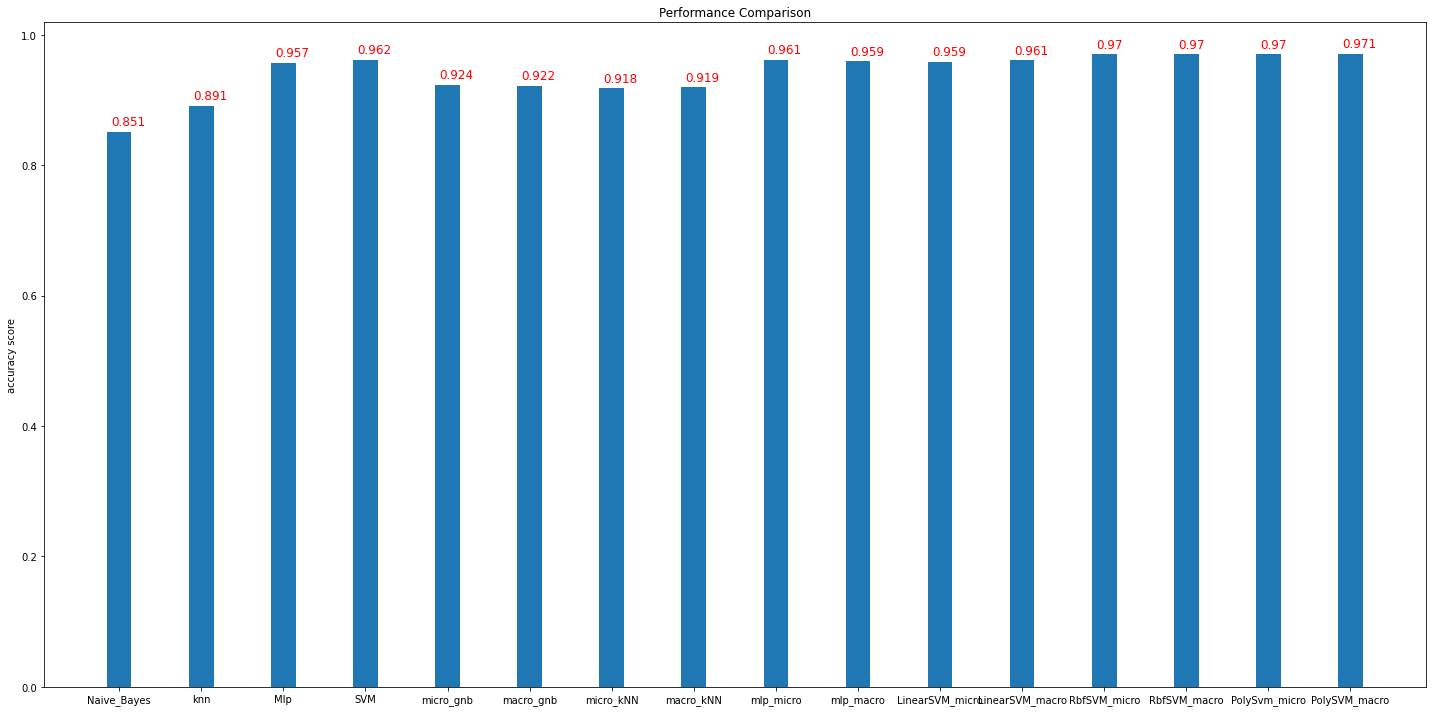

In [ ]:
clfs = []   #just to make smaller the names to fit better and delete the dummy classifiers
clfs = ['Naive_Bayes', 'knn', 'Mlp', 'SVM', 'micro_gnb', 'macro_gnb', 'micro_kNN', 'macro_kNN', 'mlp_micro', 'mlp_macro', 'LinearSVM_micro', 'LinearSVM_macro', 'RbfSVM_micro', 'RbfSVM_macro', 'PolySvm_micro', 'PolySVM_macro']

scores_bar_plot(scores, clfs)

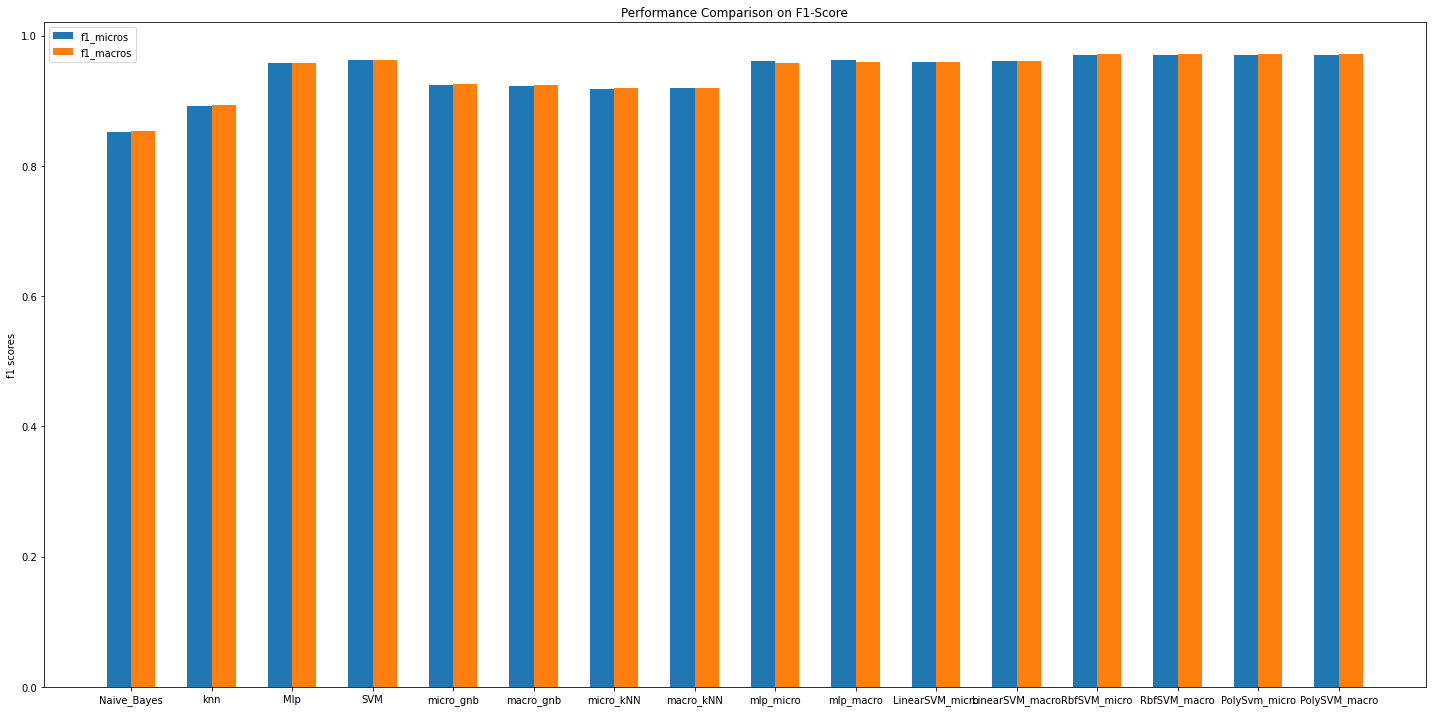

In [ ]:
f1_micro_macro_bar_plot(f1_micro, f1_macro, clfs)